# Import necessary libraries

In [1]:
import warnings 
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Import library to use display() instead of print() for printing formatted dataframes. 
from IPython.display import display

#For HTML tables
from IPython.display import HTML


import seaborn as sns
sns.set(color_codes=True)

# Read and Inspect application data 

In [3]:
#Setting to display all the columns 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:
#Read the dataset
df = pd.read_csv("application_data.csv")
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
# No of rows and cols in dataset
df.shape

(307511, 122)

In [6]:
#cols having top 10 missing value counts 
df.isna().sum().sort_values(ascending=False).head(10)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
dtype: int64

In [7]:
# numerical cols broad level inspection 
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [8]:
#list the col names
df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

# Remove columns with >= 50%  missing values

As we can see there are 307511 rows and 122 columns in the dataset,

So we will remove those columns having more than 50% missing values as it is not feasable to impute missing values for those columns.


In [9]:
# no of rows in dataset
len(df)

307511

In [10]:
#top 60 cols sorted by highest no of missing values 
df.isna().sum().sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

In [11]:
# divide no of rows/2
x = len(df)/2
x

153755.5

In [12]:
# If a column contains more than 50% of its values not there,
# delete that column
#list all cols having less than 50% missing values.
df.columns[df.isnull().sum() < x ]

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [13]:
# no of cols having less than 50% missing values.
len(df.columns[df.isnull().sum() < x ])

81

In [14]:
#remove cols with >= 50% missing values and store back in the dataframe
df = df[df.columns[df.isnull().sum() < x ]]
df.shape

(307511, 81)

In [15]:
#check first 5 rows in the new dataframe
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [16]:
#start inspecting - remaining cols for missing values
#list all cols having high no of missing values 
df.isna().sum().sort_values(ascending=False).head(60)

FLOORSMAX_AVG                   153020
FLOORSMAX_MEDI                  153020
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MEDI    150007
YEARS_BEGINEXPLUATATION_MODE    150007
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
OCCUPATION_TYPE                  96391
EXT_SOURCE_3                     60965
AMT_REQ_CREDIT_BUREAU_YEAR       41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
NAME_TYPE_SUITE                   1292
DEF_60_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
EXT_SOURCE_2                       660
AMT_GOODS_PRICE                    278
AMT_ANNUITY                         12
CNT_FAM_MEMBERS                      2
DAYS_LAST_PHONE_CHANGE   

In [17]:
# Numerical columns
df.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

#### Inference : 
After removing the columns with >= 50% missing values 81 columns out of 122 remain. We will inspect these further.

# Inspect the numerical columns to add/convert values

In [18]:
#Convert Days_birth to Age Column 
df['AGE'] = round(abs(df["DAYS_BIRTH"]/365),0)
df['AGE'] = df['AGE'].astype('int')

df['AGE'].value_counts().head()


39    9023
38    8793
37    8727
40    8602
41    8495
Name: AGE, dtype: int64

In [19]:
#Convert DAYS_EMPLOYED to YEARS_EMPLOYED
df['YEARS_EMPLOYED'] = round(abs(df["DAYS_EMPLOYED"]/365),0)
df['YEARS_EMPLOYED'] = df['YEARS_EMPLOYED'].astype('int')
df['YEARS_EMPLOYED'].value_counts().head()

1001    55374
1       34796
2       30530
3       27721
4       22933
Name: YEARS_EMPLOYED, dtype: int64

In [20]:
#DROP DAYS_BIRTH, DAYS_EMPLOYED Columns as they will not be used further
rem_days_cols = ['DAYS_BIRTH', 'DAYS_EMPLOYED']
days_col_list = set(df.columns)- set(rem_days_cols)
days_col_list = list(days_col_list)
df = df[days_col_list]
df.columns

Index(['AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_FAM_MEMBERS', 'EMERGENCYSTATE_MODE',
       'WEEKDAY_APPR_PROCESS_START', 'NAME_TYPE_SUITE',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_12',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'FLAG_DOCUMENT_5',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLAG_DOCUMENT_14', 'FLAG_OWN_REALTY',
       'FLAG_DOCUMENT_13', 'FLAG_OWN_CAR', 'FLAG_PHONE', 'FLOORSMAX_MEDI',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'NAME_FAMILY_STATUS', 'DAYS_REGISTRATION',
       'FLAG_DOCUMENT_18', 'REG_CITY_NOT_WORK_CITY', 'CODE_GENDER',
       'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE', 'LIVE_CITY_NOT_WORK_CITY',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_11', 'NAME_HOUSING_TYPE',
       'FLAG_DOCUMENT_19', 'FLOORSMAX_AVG', 'AMT_ANNUITY',
       'DAYS_LAST_PHONE_CHANGE', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_10',
       'AMT_INCOME_TOTAL', 'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_AVG',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'FLAG_WORK_PHONE', 'REG_REGION_NOT_WORK_REGI

# Inspect the categorical columns to add/convert values

In [21]:
# list all categorical columns and their corresponding missing percent 
cat_missing = set(df.select_dtypes(include=['object']).columns)
cat_missing = list(cat_missing)
cat_missing_selective = ['CODE_GENDER' ,'ORGANIZATION_TYPE','NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','EMERGENCYSTATE_MODE']

In [23]:

# fig = plt.figure(figsize=(40,40))
# i=1

# for col in cat_missing:
#     ax1=plt.subplot(6,3,i)
#     sns.countplot(x = col, data=df)
#     plt.xticks(rotation=90);
#     i = i + 1

In [ ]:
# Missing percent of following categorical columns : 'CODE_GENDER' ,'ORGANIZATION_TYPE','NAME_TYPE_SUITE',
#'WEEKDAY_APPR_PROCESS_START','EMERGENCYSTATE_MODE'

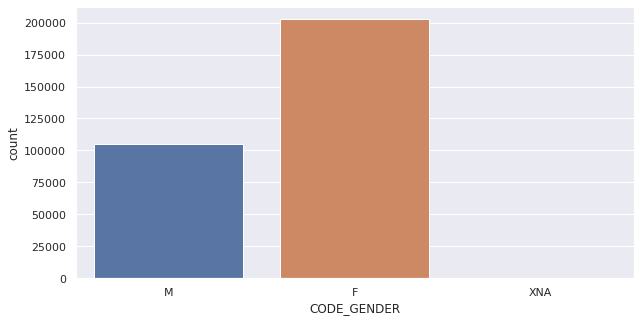

In [24]:
#CODE_GENDER
fig = plt.figure(figsize=(10,5))
sns.countplot(x = "CODE_GENDER", data=df)
plt.show()

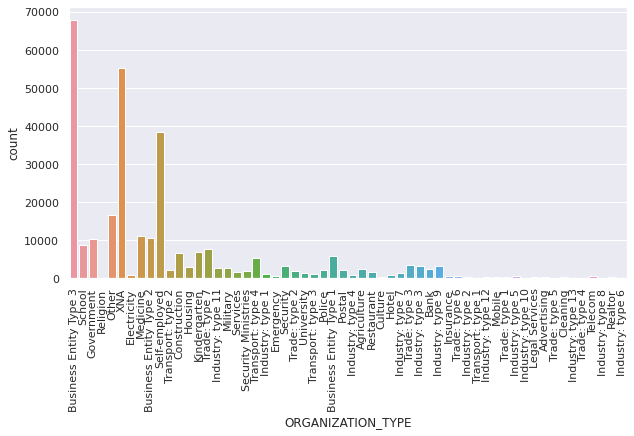

In [25]:
#ORGANIZATION_TYPE
fig = plt.figure(figsize=(10,5))
sns.countplot(x = "ORGANIZATION_TYPE", data=df)
plt.xticks(rotation=90)
plt.show()

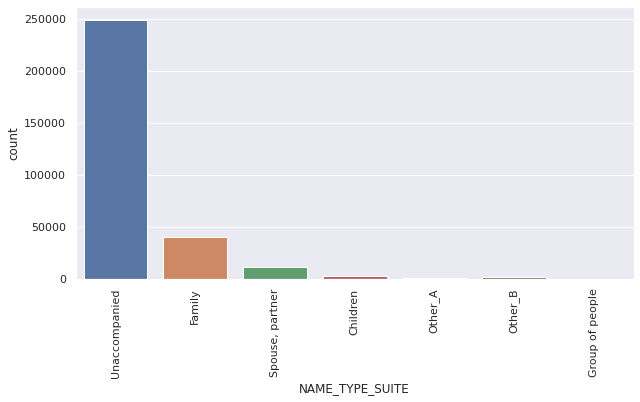

In [26]:
#NAME_TYPE_SUITE
fig = plt.figure(figsize=(10,5))
sns.countplot(x = "NAME_TYPE_SUITE", data=df)
plt.xticks(rotation=90)
plt.show()

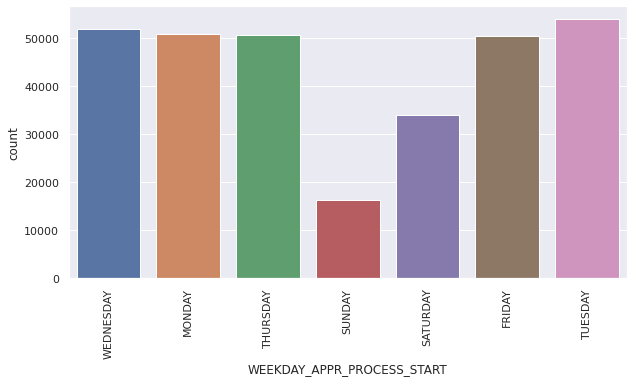

In [27]:
#WEEKDAY_APPR_PROCESS_START
fig = plt.figure(figsize=(10,5))
sns.countplot(x = "WEEKDAY_APPR_PROCESS_START", data=df)
plt.xticks(rotation=90)
plt.show()

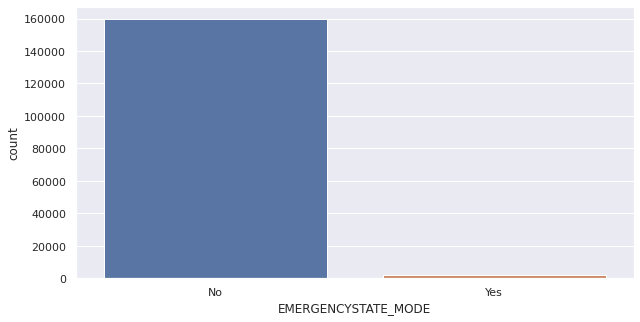

In [28]:
#EMERGENCYSTATE_MODE
fig = plt.figure(figsize=(10,5))
sns.countplot(x = "EMERGENCYSTATE_MODE", data=df)
plt.show()


#### Inference : 
1. Cleanup XNA values from CODE_GENDER and ORGANIZATION_TYPE column
2. NAME_TYPE_SUITE - Who accompanied client when applying for the previous application
Column can be removed as not needed in our analysis
3. WEEKDAY_APPR_PROCESS_START - On which day of the week did the client apply for the loan. 
Need additional data like year to infer. For eg : possible that bank launched new software on Tuesday so more applications were processed on that day. So can be removed.    
4. EMERGENCYSTATE_MODE - Normalized information about building where the client lives. 
Column has Y/N and blank values.
There are variables (from APARTMENTS_AVG to EMERGENCYSTATE_MODE) that are related to the building where the borrowers live. We need to convert these values to 0/1 along with other building related numerical cols.


In [29]:
#1. Cleanup  values from CODE_GENDER and ORGANIZATION_TYPE column
# Replace all records with XNA with Unknown value
df['CODE_GENDER'] = df['CODE_GENDER'].apply(lambda x : 'Unknown' if x =='XNA' else x)
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].apply(lambda x : 'Unknown' if x =='XNA' else x)

In [30]:
df['CODE_GENDER'].value_counts()

F          202448
M          105059
Unknown         4
Name: CODE_GENDER, dtype: int64

In [31]:
df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
Unknown                   55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [32]:
df['EMERGENCYSTATE_MODE'].value_counts()
df['EMERGENCYSTATE_MODE'].isnull().sum()

145755

In [33]:
# Replace all records with Y with 1 value, N with 0
df['EMERGENCYSTATE_MODE'] = df['EMERGENCYSTATE_MODE'].apply(lambda x : 1 if x =='Yes' else (0 if x == 'No' else np.NaN))

In [34]:
df['EMERGENCYSTATE_MODE'].isnull().sum()

145755

In [35]:
df['EMERGENCYSTATE_MODE'].dtype

dtype('float64')

In [36]:
df['EMERGENCYSTATE_MODE'] = df['EMERGENCYSTATE_MODE'].fillna(-1)
df['EMERGENCYSTATE_MODE'].astype(int)

df['EMERGENCYSTATE_MODE'] = df['EMERGENCYSTATE_MODE'].replace(-1, np.nan)

In [37]:
df['EMERGENCYSTATE_MODE'].isnull().sum()

145755

# Find the percentage of missing values for the remaining rows 

In [38]:
#check first 5 rows in the new dataframe
df.head()

AMT_REQ_CREDIT_BUREAU_YEAR  CNT_FAM_MEMBERS  EMERGENCYSTATE_MODE  \
0                         1.0              1.0                  0.0   
1                         0.0              2.0                  0.0   
2                         0.0              1.0                  NaN   
3                         NaN              2.0                  NaN   
4                         0.0              1.0                  NaN   

  WEEKDAY_APPR_PROCESS_START NAME_TYPE_SUITE  REG_CITY_NOT_LIVE_CITY  \
0                  WEDNESDAY   Unaccompanied                       0   
1                     MONDAY          Family                       0   
2                     MONDAY   Unaccompanied                       0   
3                  WEDNESDAY   Unaccompanied                       0   
4                   THURSDAY   Unaccompanied                       0   

   FLAG_DOCUMENT_12  AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_DOCUMENT_5  \
0                 0                         0.0                0   
1                 0                         0.0                0   
2                 0                         0.0                0   
3                 0                         NaN                0   
4                 0                         0.0                0   

   YEARS_BEGINEXPLUATATION_MODE  FLAG_DOCUMENT_14 FLAG_OWN_REALTY  \
0                        0.9722                 0               Y   
1                        0.9851                 0               N   
2                           NaN                 0               Y   
3                           NaN                 0               Y   
4                           NaN                 0               Y   

   FLAG_DOCUMENT_13 FLAG_OWN_CAR  FLAG_PHONE  FLOORSMAX_MEDI  \
0                 0            N           1          0.0833   
1                 0            N           1          0.2917   
2                 0            Y           1             NaN   
3                 0            N           0             NaN   
4                 0            N           0             NaN   

   DEF_60_CNT_SOCIAL_CIRCLE    NAME_FAMILY_STATUS  DAYS_REGISTRATION  \
0                       2.0  Single / not married            -3648.0   
1                       0.0               Married            -1186.0   
2                       0.0  Single / not married            -4260.0   
3                       0.0        Civil marriage            -9833.0   
4                       0.0  Single / not married            -4311.0   

   FLAG_DOCUMENT_18  REG_CITY_NOT_WORK_CITY CODE_GENDER  DAYS_ID_PUBLISH  \
0                 0                       0           M            -2120   
1                 0                       0           F             -291   
2                 0                       0           M            -2531   
3                 0                       0           F            -2437   
4                 0                       1           M            -3458   

   FLAG_EMP_PHONE  LIVE_CITY_NOT_WORK_CITY  FLAG_DOCUMENT_20  \
0               1                        0                 0   
1               1                        0                 0   
2               1                        0                 0   
3               1                        0                 0   
4               1                        1                 0   

   FLAG_DOCUMENT_11  NAME_HOUSING_TYPE  FLAG_DOCUMENT_19  FLOORSMAX_AVG  \
0                 0  House / apartment                 0         0.0833   
1                 0  House / apartment                 0         0.2917   
2                 0  House / apartment                 0            NaN   
3                 0  House / apartment                 0            NaN   
4                 0  House / apartment                 0            NaN   

   AMT_ANNUITY  DAYS_LAST_PHONE_CHANGE  EXT_SOURCE_3  FLAG_DOCUMENT_10  \
0      24700.5                 -1134.0      0.139376                 0   
1      35698.5                  -828.0           NaN        

In [39]:
#start inspecting - remaining cols for missing values
#list all cols having high no of missing values 
df.isna().sum().sort_values(ascending=False).head(60)

FLOORSMAX_MEDI                  153020
FLOORSMAX_AVG                   153020
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MEDI    150007
YEARS_BEGINEXPLUATATION_MODE    150007
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
OCCUPATION_TYPE                  96391
EXT_SOURCE_3                     60965
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
NAME_TYPE_SUITE                   1292
DEF_60_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
EXT_SOURCE_2                       660
AMT_GOODS_PRICE                    278
AMT_ANNUITY                         12
CNT_FAM_MEMBERS                      2
DAYS_LAST_PHONE_CHANGE   

In [40]:
# Numerical columns
df.describe().columns

Index(['AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_FAM_MEMBERS', 'EMERGENCYSTATE_MODE',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_12',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'FLAG_DOCUMENT_5',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_13',
       'FLAG_PHONE', 'FLOORSMAX_MEDI', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_REGISTRATION', 'FLAG_DOCUMENT_18', 'REG_CITY_NOT_WORK_CITY',
       'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE', 'LIVE_CITY_NOT_WORK_CITY',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_19',
       'FLOORSMAX_AVG', 'AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_10', 'AMT_INCOME_TOTAL',
       'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_AVG',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'FLAG_WORK_PHONE', 'REG_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_DAY', 'CNT_CHILDREN',
       'YEARS_BEGINEXPLUATATION_MEDI', 'SK_ID_CURR', 'AMT_CR

In [41]:
df.shape

(307511, 81)

In [42]:
#get all cols having high percent of missing vals
nulls = df.isnull().sum()
nulls[ nulls > 0 ].sort_values(ascending=False)

FLOORSMAX_MEDI                  153020
FLOORSMAX_AVG                   153020
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_MEDI    150007
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BEGINEXPLUATATION_AVG     150007
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
OCCUPATION_TYPE                  96391
EXT_SOURCE_3                     60965
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
NAME_TYPE_SUITE                   1292
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
EXT_SOURCE_2                       660
AMT_GOODS_PRICE                    278
AMT_ANNUITY                         12
CNT_FAM_MEMBERS                      2
DAYS_LAST_PHONE_CHANGE   

In [43]:
#colwise total no of rows/values
df.count()

AMT_REQ_CREDIT_BUREAU_YEAR      265992
CNT_FAM_MEMBERS                 307509
EMERGENCYSTATE_MODE             161756
WEEKDAY_APPR_PROCESS_START      307511
NAME_TYPE_SUITE                 306219
REG_CITY_NOT_LIVE_CITY          307511
FLAG_DOCUMENT_12                307511
AMT_REQ_CREDIT_BUREAU_HOUR      265992
FLAG_DOCUMENT_5                 307511
YEARS_BEGINEXPLUATATION_MODE    157504
FLAG_DOCUMENT_14                307511
FLAG_OWN_REALTY                 307511
FLAG_DOCUMENT_13                307511
FLAG_OWN_CAR                    307511
FLAG_PHONE                      307511
FLOORSMAX_MEDI                  154491
DEF_60_CNT_SOCIAL_CIRCLE        306490
NAME_FAMILY_STATUS              307511
DAYS_REGISTRATION               307511
FLAG_DOCUMENT_18                307511
REG_CITY_NOT_WORK_CITY          307511
CODE_GENDER                     307511
DAYS_ID_PUBLISH                 307511
FLAG_EMP_PHONE                  307511
LIVE_CITY_NOT_WORK_CITY         307511
FLAG_DOCUMENT_20         

In [44]:
#total rows in dataset
len(df)

307511

In [45]:
#get percent of missing values per col
df_missing = df.count() / len(df)
df_missing

AMT_REQ_CREDIT_BUREAU_YEAR      0.864984
CNT_FAM_MEMBERS                 0.999993
EMERGENCYSTATE_MODE             0.526017
WEEKDAY_APPR_PROCESS_START      1.000000
NAME_TYPE_SUITE                 0.995799
REG_CITY_NOT_LIVE_CITY          1.000000
FLAG_DOCUMENT_12                1.000000
AMT_REQ_CREDIT_BUREAU_HOUR      0.864984
FLAG_DOCUMENT_5                 1.000000
YEARS_BEGINEXPLUATATION_MODE    0.512190
FLAG_DOCUMENT_14                1.000000
FLAG_OWN_REALTY                 1.000000
FLAG_DOCUMENT_13                1.000000
FLAG_OWN_CAR                    1.000000
FLAG_PHONE                      1.000000
FLOORSMAX_MEDI                  0.502392
DEF_60_CNT_SOCIAL_CIRCLE        0.996680
NAME_FAMILY_STATUS              1.000000
DAYS_REGISTRATION               1.000000
FLAG_DOCUMENT_18                1.000000
REG_CITY_NOT_WORK_CITY          1.000000
CODE_GENDER                     1.000000
DAYS_ID_PUBLISH                 1.000000
FLAG_EMP_PHONE                  1.000000
LIVE_CITY_NOT_WO

In [46]:
#convert to percent
df_missing = (1-df_missing)*100
df_missing

AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
CNT_FAM_MEMBERS                  0.000650
EMERGENCYSTATE_MODE             47.398304
WEEKDAY_APPR_PROCESS_START       0.000000
NAME_TYPE_SUITE                  0.420148
REG_CITY_NOT_LIVE_CITY           0.000000
FLAG_DOCUMENT_12                 0.000000
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
FLAG_DOCUMENT_5                  0.000000
YEARS_BEGINEXPLUATATION_MODE    48.781019
FLAG_DOCUMENT_14                 0.000000
FLAG_OWN_REALTY                  0.000000
FLAG_DOCUMENT_13                 0.000000
FLAG_OWN_CAR                     0.000000
FLAG_PHONE                       0.000000
FLOORSMAX_MEDI                  49.760822
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
NAME_FAMILY_STATUS               0.000000
DAYS_REGISTRATION                0.000000
FLAG_DOCUMENT_18                 0.000000
REG_CITY_NOT_WORK_CITY           0.000000
CODE_GENDER                      0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_EMP_PHONE                   0

In [47]:
df_missing.sort_values(ascending=False,inplace=True)

In [48]:
df_missing

FLOORSMAX_MEDI                  49.760822
FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [49]:
df_missing.value_counts()

0.000000     55
13.501631     6
0.332021      4
49.760822     3
48.781019     3
0.000650      1
0.003902      1
0.214626      1
48.268517     1
19.825307     1
0.000325      1
0.420148      1
31.345545     1
0.090403      1
47.398304     1
dtype: int64

#### Inference :

We see that there are 26 columns which have missing values in the range of 49.76% to 0.000325%.

The remaining 55 columns do not have any missing values. 


# Treat the missing values for Categorical columns

First we will inspect only the categorical columns and check if we can impute or remove them. 

In [50]:
# list all categorical columns and their corresponding missing percent 
categorical_missing = set(df_missing.index)-set(df.describe().columns)
categorical_missing = list(categorical_missing)
categorical_missing= df_missing[categorical_missing].sort_values(ascending=False)
categorical_missing

OCCUPATION_TYPE               31.345545
NAME_TYPE_SUITE                0.420148
FLAG_OWN_CAR                   0.000000
NAME_HOUSING_TYPE              0.000000
FLAG_OWN_REALTY                0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_CONTRACT_TYPE             0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
NAME_INCOME_TYPE               0.000000
NAME_FAMILY_STATUS             0.000000
ORGANIZATION_TYPE              0.000000
CODE_GENDER                    0.000000
dtype: float64

In [52]:
# cols having missing vals
df_cat_missing=categorical_missing[categorical_missing>0]
df_cat_missing=df_cat_missing.reset_index()
df_cat_missing.columns=['Name','Percent']
df_cat_missing['Name']

0    OCCUPATION_TYPE
1    NAME_TYPE_SUITE
Name: Name, dtype: object

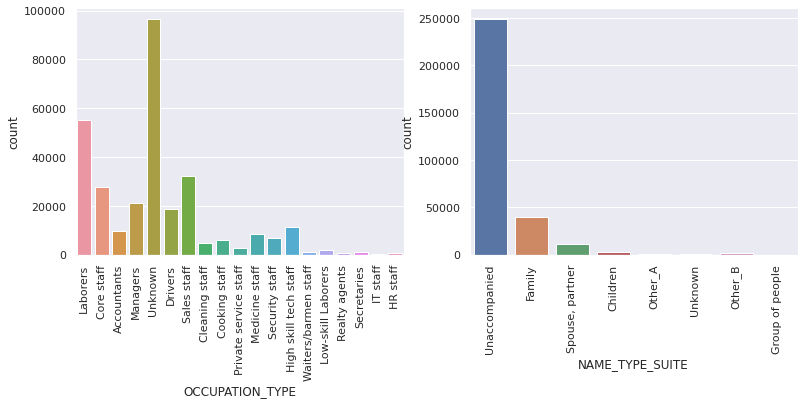

In [53]:
# Countplots for Categorical columns after filling missing values:
fig = plt.figure(figsize=(20,10))
i=1
for col in df_cat_missing['Name']:
    ax1=plt.subplot(2,3,i)
    df[col].fillna('Unknown',inplace=True)
    sns.countplot(x = col, data=df)
    plt.xticks(rotation=90);
    i = i + 1

In [54]:
#Inspect the values in each categorical column
list1=[]
for col in df_cat_missing['Name']:
    print(df[col].value_counts())
    
# HTML(result.to_html())

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Unknown              1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


#### Inference : 
1. OCCUPATION_TYPE:
We do not know if this is missing for reason(MNAR) for eg - applicants may be self-employed. 
We cannot remove these rows since there is high percent of such values.
Also the blank value cannot be replaced with mode() - "Laborers". 
So we introduce new class = Unknown to fill it

2. NAME_TYPE_SUIT cols is very less:
NAME_TYPE_SUIT = Who was accompanying client when he was applying for the loan
So we introduce new class = "Unknown" to fill it


In [55]:
# Inspect all categorical columns
categorical_missing

OCCUPATION_TYPE               31.345545
NAME_TYPE_SUITE                0.420148
FLAG_OWN_CAR                   0.000000
NAME_HOUSING_TYPE              0.000000
FLAG_OWN_REALTY                0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_CONTRACT_TYPE             0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
NAME_INCOME_TYPE               0.000000
NAME_FAMILY_STATUS             0.000000
ORGANIZATION_TYPE              0.000000
CODE_GENDER                    0.000000
dtype: float64

# Treat the missing values for Numerical 

There are 70 numerical columns. We will check if we can impute/remove them.

We have used the Central Limit Theorem to fill the missing values in the numerical columns(please refer below to our steps and inferences). CLT says that as sample size gets larger sampling means approaches a normal distribution irrespective of the shape of the data distribution. We use sampling to find the population mean and replace the missing values with the calculated population mean.

We have handled the _AVG, _MEDI, _MODE columns separately since applying CLT to these already normalized columns does not make sense. We will impute them with the median values.

In [56]:
df.describe().columns

Index(['AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_FAM_MEMBERS', 'EMERGENCYSTATE_MODE',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_12',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'FLAG_DOCUMENT_5',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_13',
       'FLAG_PHONE', 'FLOORSMAX_MEDI', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_REGISTRATION', 'FLAG_DOCUMENT_18', 'REG_CITY_NOT_WORK_CITY',
       'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE', 'LIVE_CITY_NOT_WORK_CITY',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_19',
       'FLOORSMAX_AVG', 'AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_10', 'AMT_INCOME_TOTAL',
       'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_AVG',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'FLAG_WORK_PHONE', 'REG_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_DAY', 'CNT_CHILDREN',
       'YEARS_BEGINEXPLUATATION_MEDI', 'SK_ID_CURR', 'AMT_CR

#### Inference 
Flag Document Columns from FLAG_DUCUMENT_2 to FLAG_DOCUMENT_21 indicate if CLient provided documents. 
Extra details are reuired to do analyis on these columns and currently no explanation is provided.
Example, FLAG_DOCUMENT_2 may mean Pan Card, Aadhar Card etc.
Hence We can remove these columns from EDA.()

In [ ]:
#Dataframe Temporary copy
#df2 = df.copy()

In [57]:

doc_l = ['FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'];
document_col_list = set(df.columns)- set(doc_l)
document_col_list = list(document_col_list)
df = df[document_col_list]
df.columns

Index(['AMT_REQ_CREDIT_BUREAU_YEAR', 'ORGANIZATION_TYPE', 'CNT_FAM_MEMBERS',
       'EMERGENCYSTATE_MODE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_TYPE_SUITE',
       'FLAG_WORK_PHONE', 'REG_CITY_NOT_LIVE_CITY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'CNT_CHILDREN', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLAG_OWN_REALTY', 'SK_ID_CURR',
       'AMT_CREDIT', 'REG_REGION_NOT_LIVE_REGION', 'REGION_RATING_CLIENT',
       'FLAG_OWN_CAR', 'FLAG_PHONE', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'YEARS_EMPLOYED', 'FLOORSMAX_MEDI',
       'NAME_FAMILY_STATUS', 'DAYS_REGISTRATION',
       'REGION_RATING_CLIENT_W_CITY', 'NAME_CONTRACT_TYPE',
       'NAME_EDUCATION_TYPE', 'REG_CITY_NOT_WORK_CITY',
       'AMT_REQ_CREDIT_BUREAU_MON', 'EXT_SOURCE_2', 'CODE_GENDER',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'DAYS_ID_PUBLISH', 'AMT_GOODS_PRICE',
       'FLAG_EMP_PHONE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'REGION_POPULATION_

In [58]:
len(df.columns)

61

In [59]:
# list all numerical columns and their corresponding missing percent 
numerical_cols = set(df.describe().columns)
len(numerical_cols)

49

In [60]:
df[numerical_cols].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  CNT_FAM_MEMBERS  EMERGENCYSTATE_MODE  \
count               265992.000000    307509.000000        161756.000000   
mean                     1.899974         2.152665             0.014392   
std                      1.869295         0.910682             0.119101   
min                      0.000000         1.000000             0.000000   
25%                      0.000000         2.000000             0.000000   
50%                      1.000000         2.000000             0.000000   
75%                      3.000000         3.000000             0.000000   
max                     25.000000        20.000000             1.000000   

       REG_CITY_NOT_LIVE_CITY  AMT_REQ_CREDIT_BUREAU_HOUR  \
count           307511.000000               265992.000000   
mean                 0.078173                    0.006402   
std                  0.268444                    0.083849   
min                  0.000000                    0.000000   
25%                  0.000000                    0.000000   
50%                  0.000000                    0.000000   
75%                  0.000000                    0.000000   
max                  1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY   CNT_CHILDREN  YEARS_BEGINEXPLUATATION_MEDI  \
count              265992.000000  307511.000000                 157504.000000   
mean                    0.007000       0.417052                      0.977752   
std                     0.110757       0.722121                      0.059897   
min                     0.000000       0.000000                      0.000000   
25%                     0.000000       0.000000                      0.976700   
50%                     0.000000       0.000000                      0.981600   
75%                     0.000000       1.000000                      0.986600   
max                     9.000000      19.000000                      1.000000   

       YEARS_BEGINEXPLUATATION_MODE     SK_ID_CURR    AMT_CREDIT  \
count                 157504.000000  307511.000000  3.075110e+05   
mean                       0.977065  278180.518577  5.990260e+05   
std                        0.064575  102790.175348  4.024908e+05   
min                        0.000000  100002.000000  4.500000e+04   
25%                        0.976700  189145.500000  2.700000e+05   
50%                        0.981600  278202.000000  5.135310e+05   
75%                        0.986600  367142.500000  8.086500e+05   
max                        1.000000  456255.000000  4.050000e+06   

       OBS_60_CNT_SOCIAL_CIRCLE  REG_REGION_NOT_LIVE_REGION  \
count             306490.000000               307511.000000   
mean                   1.405292                    0.015144   
std                    2.379803                    0.122126   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    2.000000                    0.000000   
max                  344.000000                    1.000000   

       REGION_RATING_CLIENT     FLAG_PHONE  AMT_REQ_CREDIT_BUREAU_WEEK  \
count         307511.000000  307511.000000               265992.000000   
mean               2.052463       0.281066                    0.034362   
std                0.509034       0.449521                    0.204685   
min                1.000000       0.000000                    0.000000   
25%                2.000000       0.000000                    0.000000   
50%                2.000000       0.000000                    0.000000   
75%                2.000000       1.000000                    0.000000   
max                3.000000       1.000000                    8.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  YEARS_EMPLOYED  FLOORSMAX_MEDI  \
count             306490.000000   307511.000000   154491.000000   
mean                   0.100049      185.608021        0.225897   
st

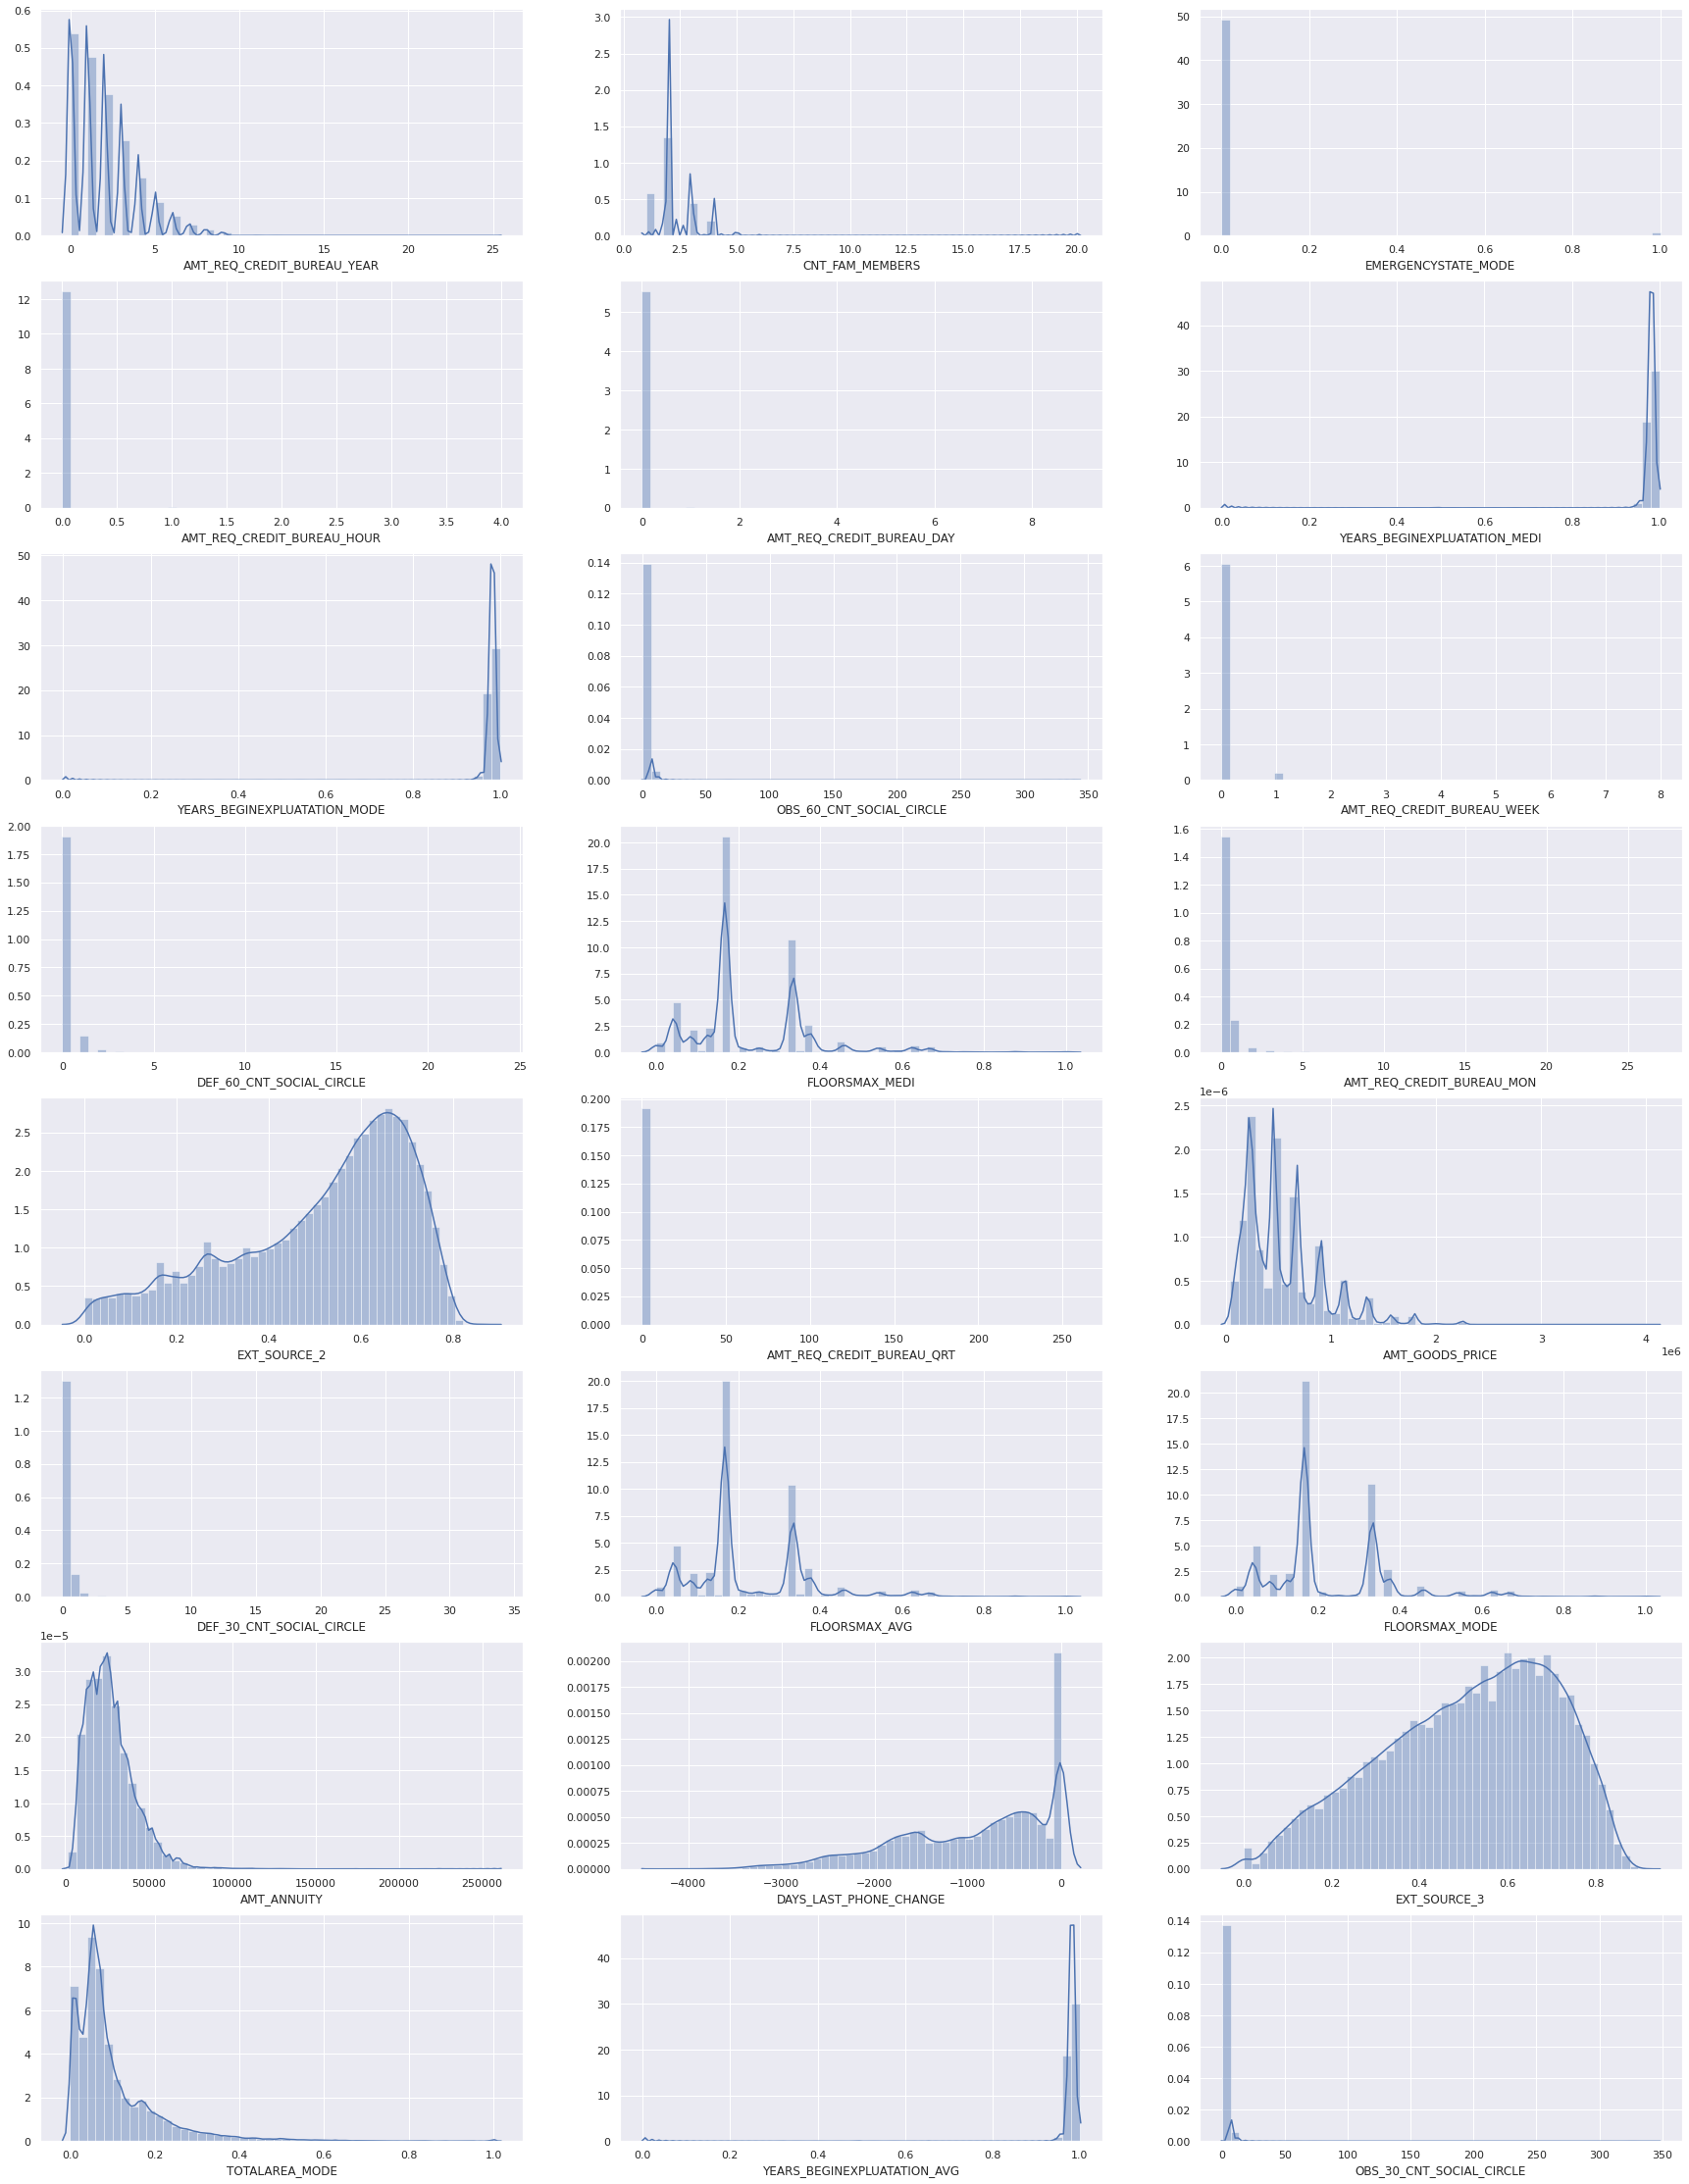

In [62]:
#Plot the distibution for the numerical columns having missing values.  
fig = plt.figure(figsize=(30,40))
i=1
for col in numerical_cols:
    if df_missing[col] > 0:
        ax1=plt.subplot(8,3,i)
        sns.distplot(df[col], ax=ax1)
        i = i + 1

#### Inference : 
I] Case 1 : 
1. Some Cols like : FLOORSMAX_AVG has single value = 0
2. As it is single data value so we may substitute with mode = 0
3. Second option, the mean( 0.226282) and median(0.166700) are very near, so we may substitute with mean also
4. This is potential problem in production data - consult with project manager for additional data
5. We replace the values in such columns with median

II] Case 2:
1. In some columns the data is a right skewed(EXT_SOURCE_2, EXT_SOURCE_3, DAYS_LAST_PHONE_CHANGE) normal distribution.
2. Some columns are left skewed (AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE, etc.) normal distribution. 
3. The mode and median, mode and mean is quite far away
   
4. In such columns we replace the missing values using CLT 

In [63]:
#Separate average columns. 
missing_num_col_list = []
avg_num_col_list=[]
for col in numerical_cols:
    if ('AVG' not in col)and ('MEDI' not in col) and ('MODE' not in col):        
        if df_missing[col] > 0:
            missing_num_col_list.append(col)
    else:
        avg_num_col_list.append(col)

print(missing_num_col_list)
print(avg_num_col_list)

['AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_FAM_MEMBERS', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_MON', 'EXT_SOURCE_2', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_GOODS_PRICE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE']
['EMERGENCYSTATE_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_AVG']


In [64]:
####  :
# There are 7 already normalized columns as per the data dictionary : 
# YEARS_BEGINEXPLUATATION_AVG, YEARS_BEGINEXPLUATATION_MODE, FLOORSMAX_AVG, 
# YEARS_BEGINEXPLUATATION_MEDI, FLOORSMAX_MEDI, FLOORSMAX_MODE, TOTALAREA_MODE
# We do not consider these columns for CLT since average of average does not make sense. 
# We will handle these columns separately and fill them with the median values.


In [65]:
#Fill the missing values in AVG, MEDI and MODE columns with median values.
for col in avg_num_col_list:
        df[col].fillna(df[col].median(), inplace=True)
df[avg_num_col_list].describe()

EMERGENCYSTATE_MODE  YEARS_BEGINEXPLUATATION_MEDI  \
count        307511.000000                 307511.000000   
mean              0.007570                      0.979629   
std               0.086679                      0.042910   
min               0.000000                      0.000000   
25%               0.000000                      0.981600   
50%               0.000000                      0.981600   
75%               0.000000                      0.982100   
max               1.000000                      1.000000   

       YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MEDI  FLOORSMAX_AVG  \
count                 307511.000000   307511.000000  307511.000000   
mean                       0.979277        0.196440       0.196633   
std                        0.046270        0.106998       0.106761   
min                        0.000000        0.000000       0.000000   
25%                        0.981100        0.166700       0.166700   
50%                        0.981600        0.166700       0.166700   
75%                        0.981600        0.166700       0.166700   
max                        1.000000        1.000000       1.000000   

       FLOORSMAX_MODE  TOTALAREA_MODE  YEARS_BEGINEXPLUATATION_AVG  
count   307511.000000   307511.000000                307511.000000  
mean         0.194641        0.086258                     0.979620  
std          0.105588        0.079110                     0.042429  
min          0.000000        0.000000                     0.000000  
25%          0.166700        0.067000                     0.981600  
50%          0.166700        0.068800                     0.981600  
75%          0.166700        0.070300                     0.982100  
max          1.000000        1.000000                     1.000000

In [ ]:
# ### Applying Central Limit Theorem to the columns to fill the missing values.
# The CLT is the sampling distribution as the sampling means approaches 
# a normal distribution as the sample size gets larger,
# no matter what the shape of the data distribution. 

# CLT says that average of sample means will be the population mean.
#     Mean of sample is same as the mean of the population.

# Central limit theorem is applicable for a sufficiently large sample sizes (n ≥ 30).

# There are 16 columns which can be filled using CLT as below:

# #### Steps : 
# 1. For this we collect random 1000 samples of 500 sample size using pandas random.choices() method.
# 2. Then we find the mean of each sample 
# 3. Then we find the mean of the means of all the samples
# 4. Replace the missing values for each column with this new mean. 



In [66]:
import random
numofsample = 1000
samplesize = 500

compare_mean_tbl=[]
l_xmeans = []
i=1
for col in missing_num_col_list:
        # find mean of each sample for 500 samples
        meansample = []
        eachmeansample = []
        for j in range(0,numofsample):
            rc = random.choices(df[col].notnull(), k=samplesize)
            eachmeansample.append(sum(rc)/len(rc))
        meansample.append(eachmeansample)
        
        #mean of all means
        mean = np.mean(meansample)        
        
#         print(i,': Comparing mean and calculated Mean for Column : ',col,
#               ', CLT mean = ',mean,
#               ', Pandas col mean = ',df[col].mean() )
        print(i,':',col,'Processed.')
        tbl_row=[col,mean,df[col].mean()]
        compare_mean_tbl.append(tbl_row)
        #fill each column missing values with the new mean. 
        df[col].fillna(mean,inplace=True)
        i = i+1
        
df.describe()

1 : AMT_REQ_CREDIT_BUREAU_YEAR Processed.
2 : CNT_FAM_MEMBERS Processed.
3 : AMT_REQ_CREDIT_BUREAU_HOUR Processed.
4 : AMT_REQ_CREDIT_BUREAU_DAY Processed.
5 : OBS_60_CNT_SOCIAL_CIRCLE Processed.
6 : AMT_REQ_CREDIT_BUREAU_WEEK Processed.
7 : DEF_60_CNT_SOCIAL_CIRCLE Processed.
8 : AMT_REQ_CREDIT_BUREAU_MON Processed.
9 : EXT_SOURCE_2 Processed.
10 : AMT_REQ_CREDIT_BUREAU_QRT Processed.
11 : AMT_GOODS_PRICE Processed.
12 : DEF_30_CNT_SOCIAL_CIRCLE Processed.
13 : AMT_ANNUITY Processed.
14 : DAYS_LAST_PHONE_CHANGE Processed.
15 : EXT_SOURCE_3 Processed.
16 : OBS_30_CNT_SOCIAL_CIRCLE Processed.


AMT_REQ_CREDIT_BUREAU_YEAR  CNT_FAM_MEMBERS  EMERGENCYSTATE_MODE  \
count               307511.000000    307511.000000        307511.000000   
mean                     1.760291         2.152658             0.007570   
std                      1.774114         0.910683             0.086679   
min                      0.000000         0.999996             0.000000   
25%                      0.865408         2.000000             0.000000   
50%                      1.000000         2.000000             0.000000   
75%                      3.000000         3.000000             0.000000   
max                     25.000000        20.000000             1.000000   

       FLAG_WORK_PHONE  REG_CITY_NOT_LIVE_CITY  AMT_REQ_CREDIT_BUREAU_HOUR  \
count    307511.000000           307511.000000               307511.000000   
mean          0.199368                0.078173                    0.122320   
std           0.399526                0.268444                    0.303587   
min           0.000000                0.000000                    0.000000   
25%           0.000000                0.000000                    0.000000   
50%           0.000000                0.000000                    0.000000   
75%           0.000000                0.000000                    0.000000   
max           1.000000                1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY   CNT_CHILDREN  YEARS_BEGINEXPLUATATION_MEDI  \
count              307511.000000  307511.000000                 307511.000000   
mean                    0.122857       0.417052                      0.979629   
std                     0.310812       0.722121                      0.042910   
min                     0.000000       0.000000                      0.000000   
25%                     0.000000       0.000000                      0.981600   
50%                     0.000000       0.000000                      0.981600   
75%                     0.000000       1.000000                      0.982100   
max                     9.000000      19.000000                      1.000000   

       YEARS_BEGINEXPLUATATION_MODE     SK_ID_CURR    AMT_CREDIT  \
count                 307511.000000  307511.000000  3.075110e+05   
mean                       0.979277  278180.518577  5.990260e+05   
std                        0.046270  102790.175348  4.024908e+05   
min                        0.000000  100002.000000  4.500000e+04   
25%                        0.981100  189145.500000  2.700000e+05   
50%                        0.981600  278202.000000  5.135310e+05   
75%                        0.981600  367142.500000  8.086500e+05   
max                        1.000000  456255.000000  4.050000e+06   

       REG_REGION_NOT_LIVE_REGION  REGION_RATING_CLIENT     FLAG_PHONE  \
count               307511.000000         307511.000000  307511.000000   
mean                     0.015144              2.052463       0.281066   
std                      0.122126              0.509034       0.449521   
min                      0.000000              1.000000       0.000000   
25%                      0.000000              2.000000       0.000000   
50%                      0.000000              2.000000       0.000000   
75%                      0.000000              2.000000       1.000000   
max                      1.000000              3.000000       1.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  DEF_60_CNT_SOCIAL_CIRCLE  YEARS_EMPLOYED  \
count               307511.000000             307511.000000   307511.000000   
mean                     0.146645                  0.103026      185.608021   
std                      0.342066                  0.365349      382.165887   
min                      0.000000                  0.000000        0.000000   
25%                      0.000000                  0.000000        3.000000   
50%                      0.000000                  0.000000        6.000000   
75%                      0.000000                  0.000000      

In [67]:
# Compare the CLT means and pandas means for the columns
df_compare_clt = pd.DataFrame(compare_mean_tbl)
df_compare_clt.columns=['Column','CLT Mean','Pandas Mean']
df_compare_clt

Column  CLT Mean    Pandas Mean
0   AMT_REQ_CREDIT_BUREAU_YEAR  0.865408       1.899974
1              CNT_FAM_MEMBERS  0.999996       2.152665
2   AMT_REQ_CREDIT_BUREAU_HOUR  0.864946       0.006402
3    AMT_REQ_CREDIT_BUREAU_DAY  0.865092       0.007000
4     OBS_60_CNT_SOCIAL_CIRCLE  0.996680       1.405292
5   AMT_REQ_CREDIT_BUREAU_WEEK  0.865986       0.034362
6     DEF_60_CNT_SOCIAL_CIRCLE  0.996772       0.100049
7    AMT_REQ_CREDIT_BUREAU_MON  0.864118       0.267395
8                 EXT_SOURCE_2  0.997864       0.514393
9    AMT_REQ_CREDIT_BUREAU_QRT  0.864410       0.265474
10             AMT_GOODS_PRICE  0.999116  538396.207429
11    DEF_30_CNT_SOCIAL_CIRCLE  0.996622       0.143421
12                 AMT_ANNUITY  0.999972   27108.573909
13      DAYS_LAST_PHONE_CHANGE  0.999996    -962.858788
14                EXT_SOURCE_3  0.801758       0.510853
15    OBS_30_CNT_SOCIAL_CIRCLE  0.996686       1.422245

#### Inference : 
Mean calculated from CLT and column mean may differ due to number of reasons : 
    eg : biased sampling, presence of extreme values(outliers) 
   

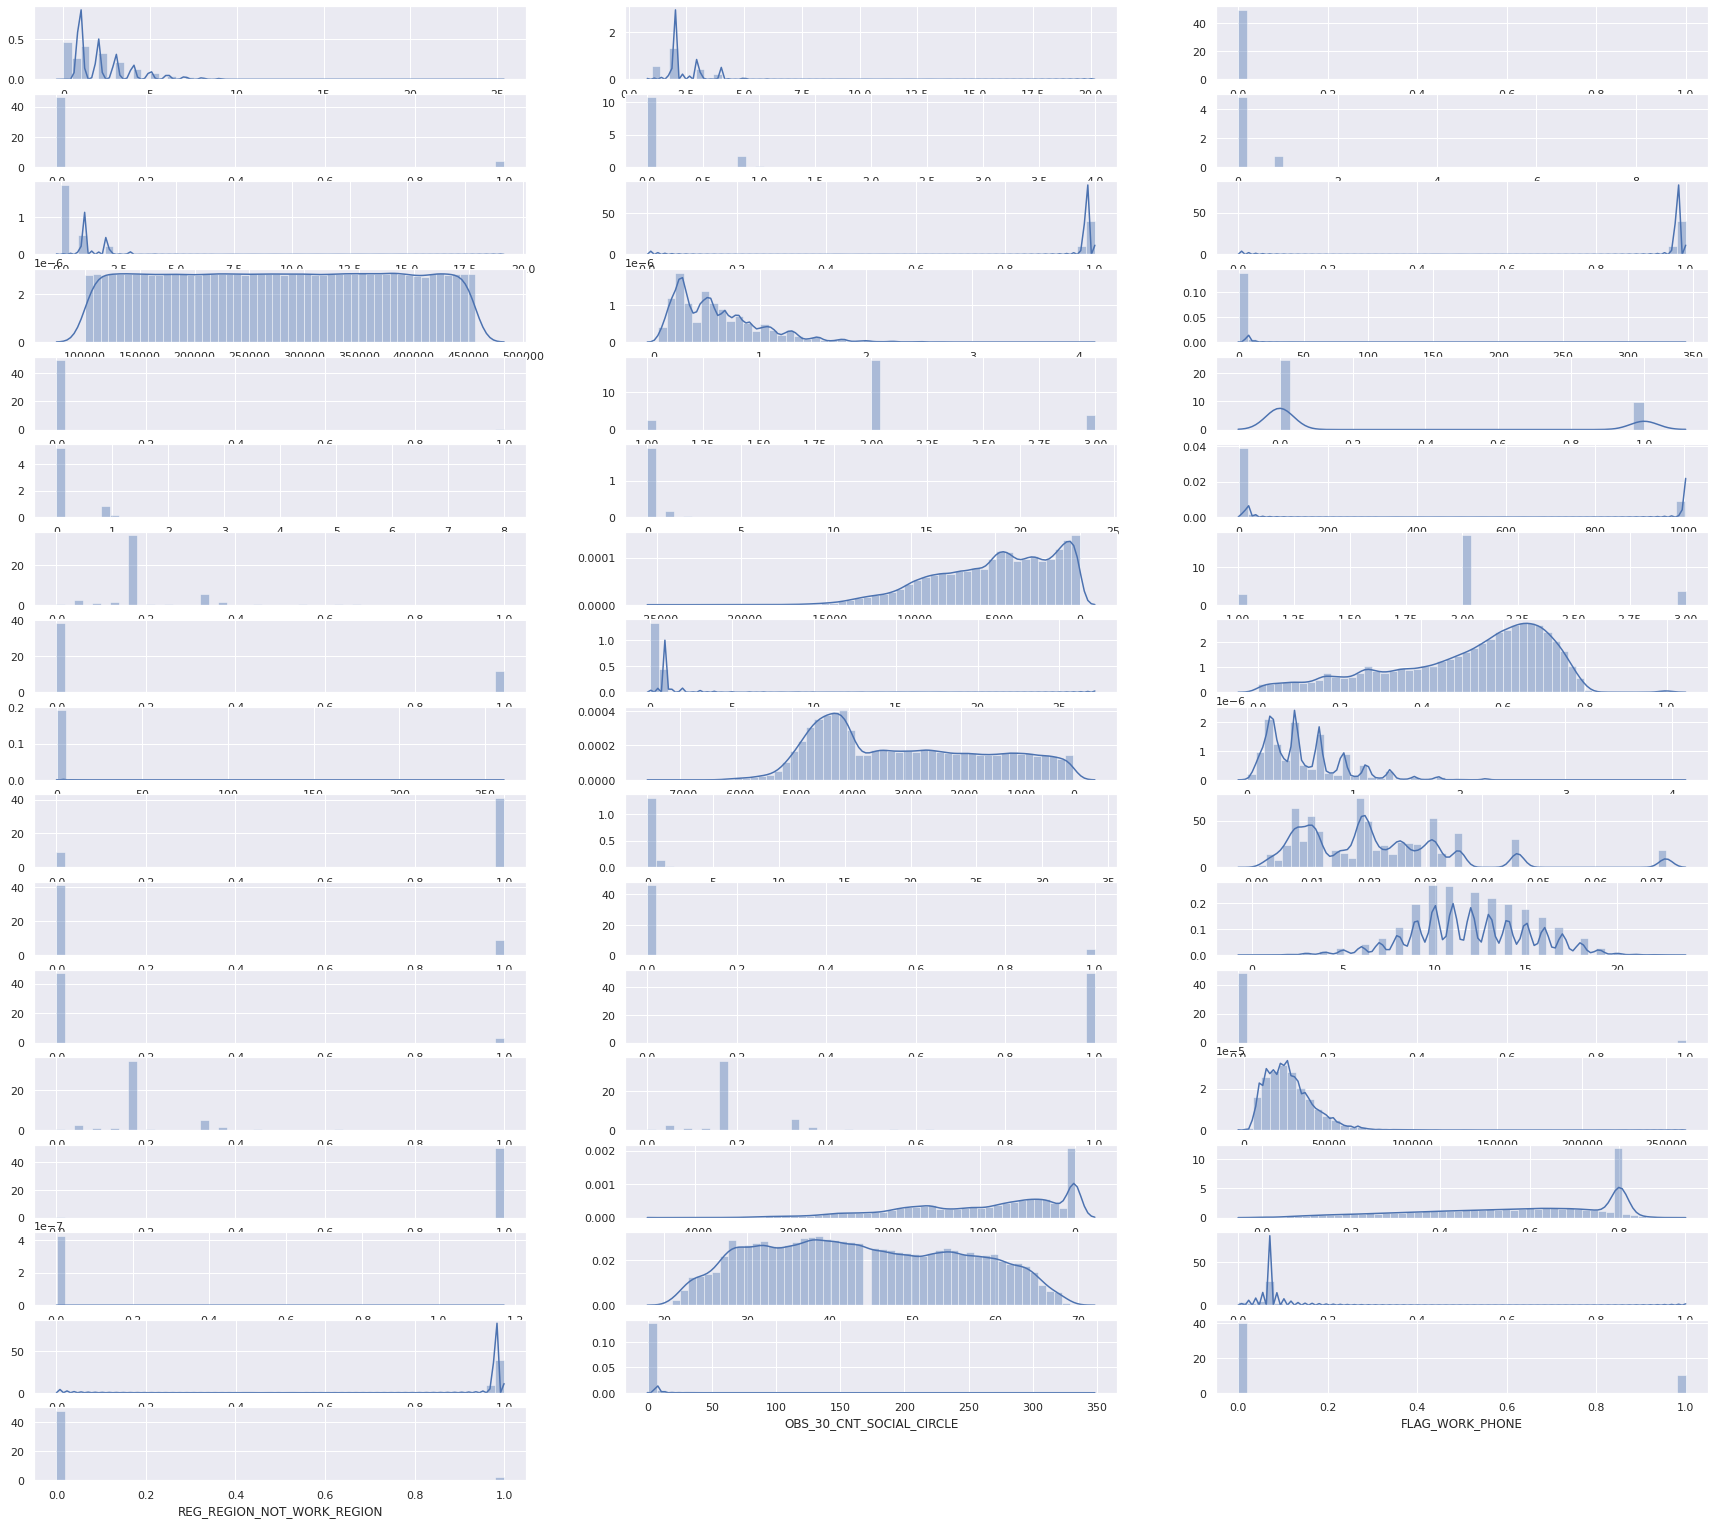

In [68]:
#Confirm values after replacing missing values by see distribution of all numerical cols
fig = plt.figure(figsize=(30,40))
i=1
for col in numerical_cols:
        ax1=plt.subplot(25,3,i)
        sns.distplot(df[col], ax=ax1)
        i = i + 1
        
plt.show()

In [69]:
#Confirm no missing columns remaining
df.isnull().sum().sort_values(ascending=False).head()

REG_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_WORK_CITY         0
NAME_CONTRACT_TYPE             0
REGION_RATING_CLIENT_W_CITY    0
DAYS_REGISTRATION              0
dtype: int64

#### Inference
Now missing values are removed, so we can proceed to handling of extreme values/outliers affecting dataset.  

# Handle Outliers in numerical columns


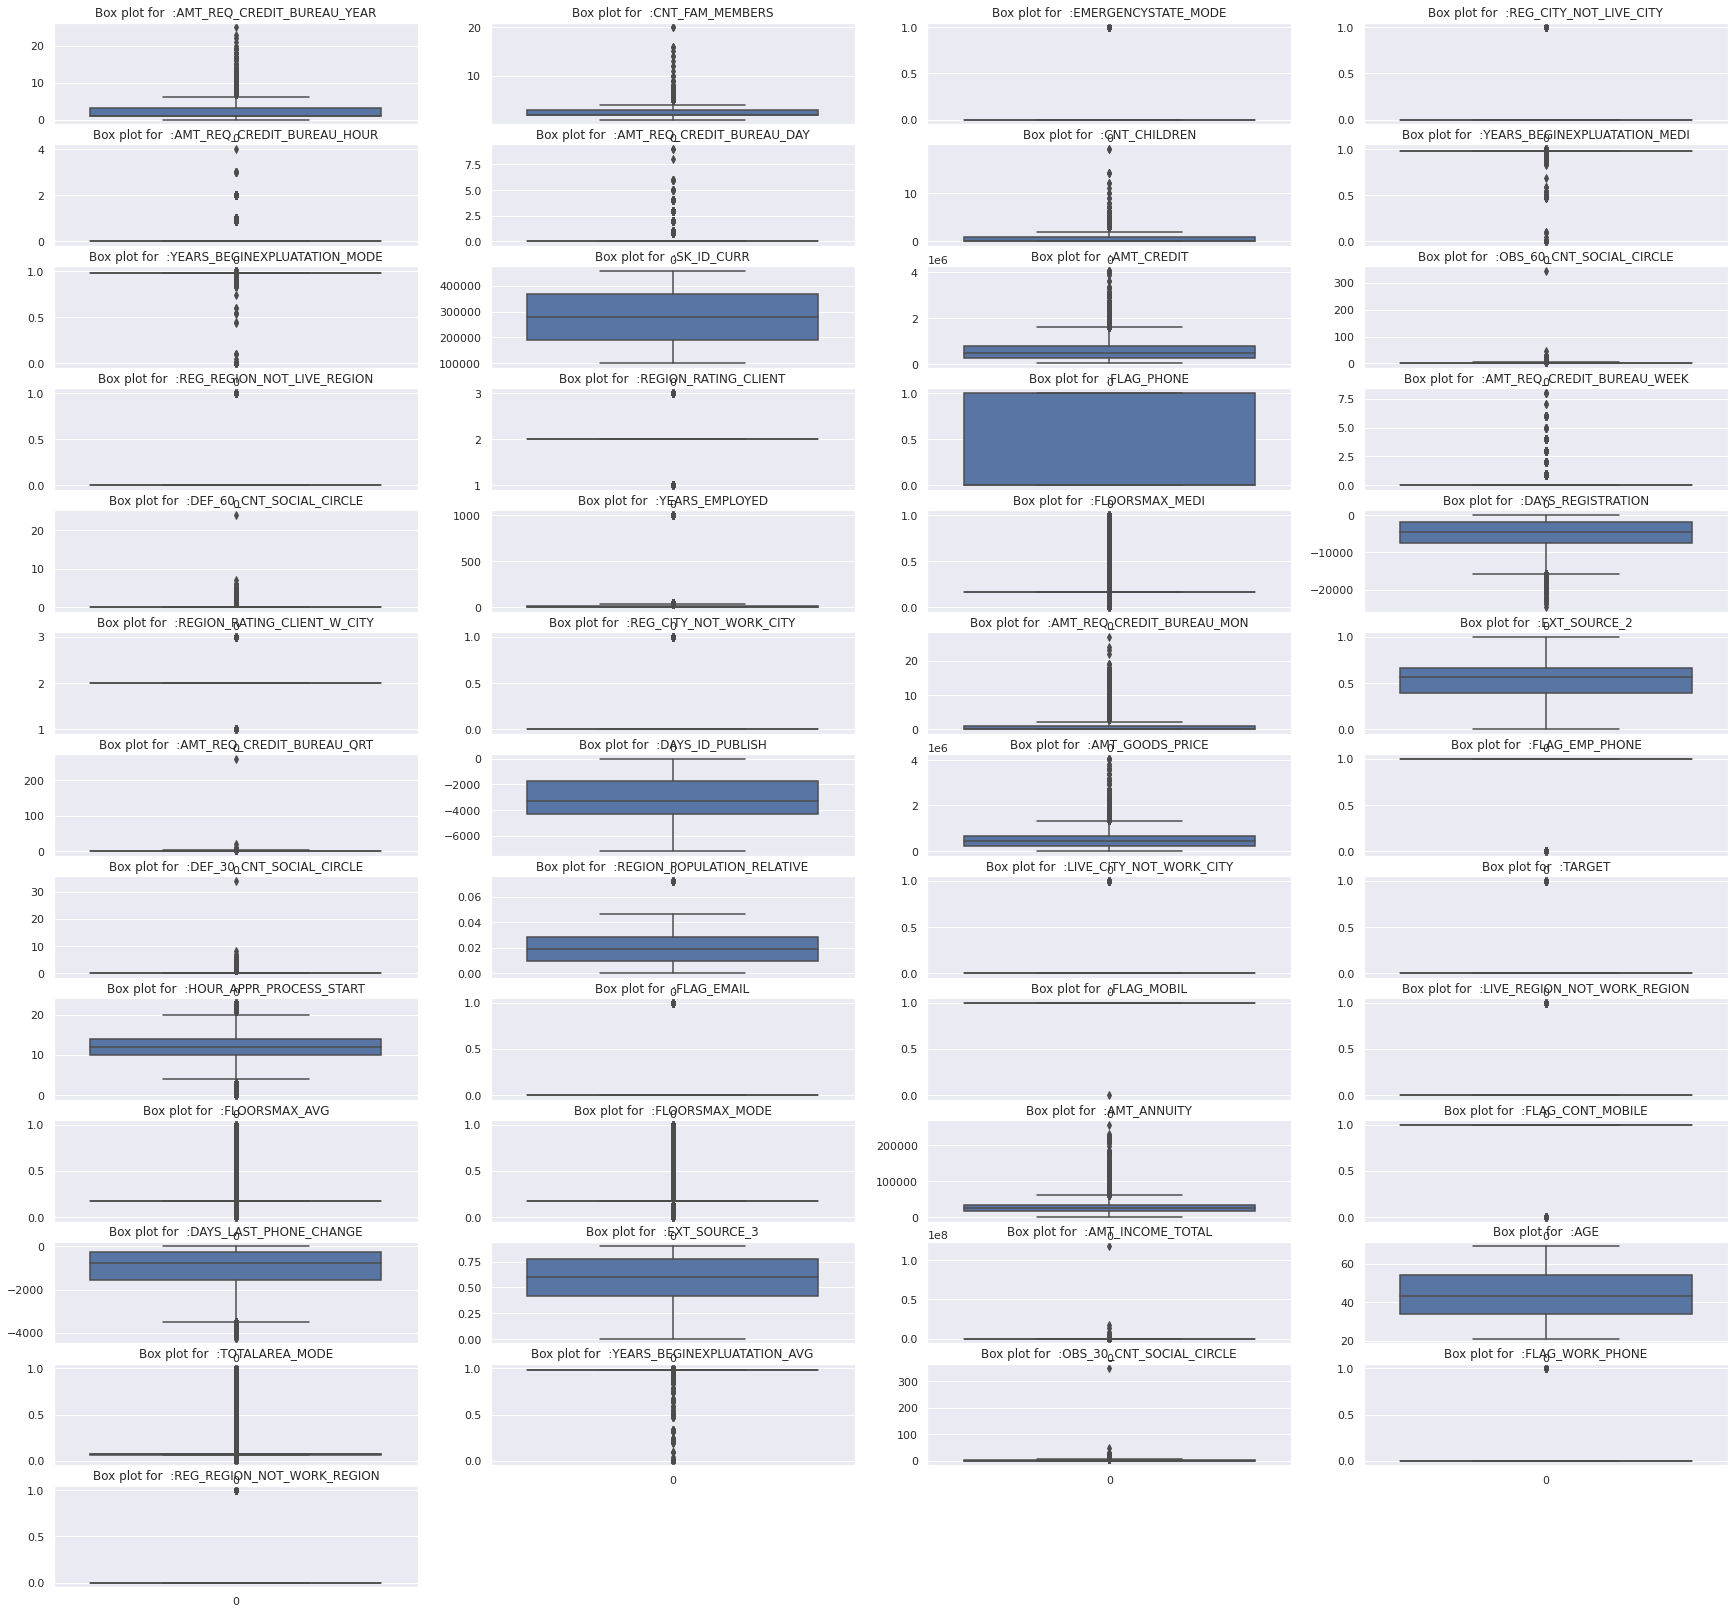

In [70]:
fig = plt.figure(figsize=(30,40))
i=1
l=list(numerical_cols)
for col in l:
            ax1=plt.subplot(18,4,i)
            ax1.set_title(label="Box plot for  :" + str(col))
            sns.boxplot(data=df[col],orient='v',  ax = ax1)
            i = i + 1
        
plt.show()

In [ ]:
#outliers for DAYS_EMPLOYED/YEARS_EMPLOYED -- 

In [71]:
len(df[df['YEARS_EMPLOYED'] > 60])

55374

In [72]:

df[df['YEARS_EMPLOYED'] > 60]['YEARS_EMPLOYED'].value_counts()

1001    55374
Name: YEARS_EMPLOYED, dtype: int64

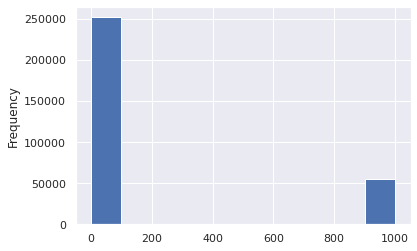

In [73]:
#Before Correction of outlier
df['YEARS_EMPLOYED'].plot.hist()

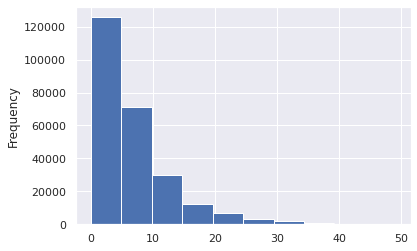

In [74]:
df[df['YEARS_EMPLOYED'] < 100]['YEARS_EMPLOYED'].plot.hist()

In [75]:
# Replace all records with more than 60 years with 0 value
df['YEARS_EMPLOYED'] = df['YEARS_EMPLOYED'].apply(lambda x : 0 if x > 60 else x)

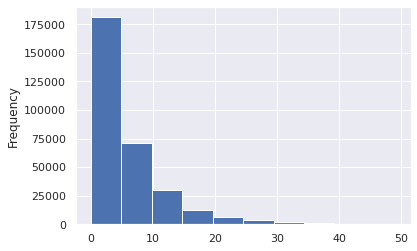

In [76]:
#After Correction of outlier
df['YEARS_EMPLOYED'].plot.hist()

#### Inference
1. The minimum age for employment is 14 years in India. 
2. Considering applicant is 75 years old, the employment years should not go beyond 60 years
3. There are large no of = 55374 applicants more than 60 years. 
4. We have imputed/replaced such large values with 0

In [77]:
# Outliers for AGE

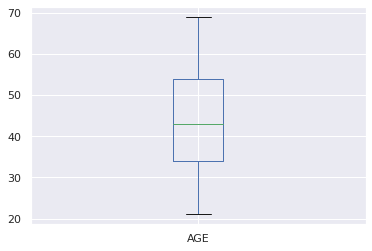

In [78]:
df['AGE'].plot.box()
#No outliers are present

#### Inference
Age column seems already clean.

In [79]:
#outliers for CNT_FAM_MEMBERS

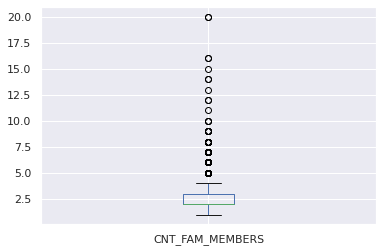

In [80]:
df['CNT_FAM_MEMBERS'].plot.box()

In [81]:
df['CNT_FAM_MEMBERS'].value_counts()

2.000000     158357
1.000000      67847
3.000000      52601
4.000000      24697
5.000000       3478
6.000000        408
7.000000         81
8.000000         20
9.000000          6
10.000000         3
14.000000         2
16.000000         2
0.999996          2
20.000000         2
12.000000         2
11.000000         1
13.000000         1
15.000000         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [82]:
df['CNT_FAM_MEMBERS'].dtype

dtype('float64')

In [83]:
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].astype('int')

In [84]:
df['CNT_FAM_MEMBERS'].value_counts()

2     158357
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
20         2
16         2
12         2
14         2
0          2
11         1
13         1
15         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [85]:
print(len(df[df['CNT_FAM_MEMBERS']> 10]))

11


In [86]:

#Impute Family member Outliers , which are greater than 10 with -1
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].apply(lambda x : -1 if x > 10 else x)

In [87]:
print(len(df[df['CNT_FAM_MEMBERS']> 10]))

0


#### Inference :
1. There are 13 records with count of Family members in the range of 11 to 177.
2. Also the data type of this column had to be converted from float to int. 
3. We have replaced these outlier values with -1.

In [88]:
#outliers for CNT_CHILDREN

In [89]:
df['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

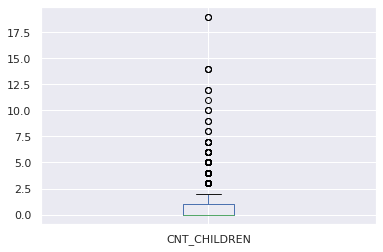

In [90]:
df['CNT_CHILDREN'].plot.box()

In [91]:
df['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [92]:
print(len(df[df['CNT_CHILDREN']> 5]))

42


In [93]:
#Impute cnt of children Outliers , which are greater than 5 with -1
df['CNT_CHILDREN'] = df['CNT_CHILDREN'].apply(lambda x : -1 if x > 5 else x)

In [94]:
print(len(df[df['CNT_CHILDREN']> 5]))

0


In [95]:
df['CNT_CHILDREN'].dtypes

dtype('int64')

#### Inference :
1. There are 42 records with count of children in the range of 6 to 19.
2. We have replaced these outlier values with -1.

In [96]:
#outliers for AMT_INCOME_TOTAL

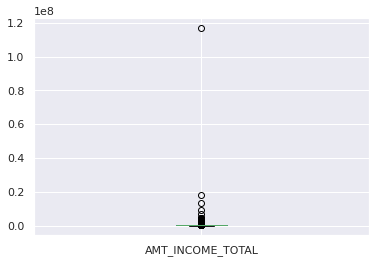

In [97]:
df['AMT_INCOME_TOTAL'].plot.box()

In [98]:
df['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [99]:
# Very large values, divide by 1 lakh for easy reading
df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL']/100000

In [100]:
df['AMT_INCOME_TOTAL'].describe()

count    307511.000000
mean          1.687979
std           2.371231
min           0.256500
25%           1.125000
50%           1.471500
75%           2.025000
max        1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [101]:
#Get no of records more than 200 lakhs income
len(df[df['AMT_INCOME_TOTAL']>200.0])

1

In [102]:
#print the relevant details for this applicant 
df[df['AMT_INCOME_TOTAL']>200.0][['OCCUPATION_TYPE','ORGANIZATION_TYPE','NAME_INCOME_TYPE']]

OCCUPATION_TYPE       ORGANIZATION_TYPE NAME_INCOME_TYPE
12840        Laborers  Business Entity Type 3          Working

In [103]:
# check mean income of Laborers category
df.groupby('OCCUPATION_TYPE', as_index=False)['AMT_INCOME_TOTAL'].mean()

OCCUPATION_TYPE  AMT_INCOME_TOTAL
0             Accountants          1.945784
1          Cleaning staff          1.307909
2           Cooking staff          1.383965
3              Core staff          1.726567
4                 Drivers          1.870116
5                HR staff          1.889163
6   High skill tech staff          1.828420
7                IT staff          2.134656
8                Laborers          1.663575
9      Low-skill Laborers          1.332280
10               Managers          2.603367
11         Medicine staff          1.497096
12  Private service staff          1.823348
13          Realty agents          1.950040
14            Sales staff          1.523029
15            Secretaries          1.605417
16         Security staff          1.496627
17                Unknown          1.535160
18   Waiters/barmen staff          1.442726

In [104]:
# Mean income of Laborers category is 1.663575 lakh. So we can remove this record. 
df = df[~(df['AMT_INCOME_TOTAL']>200.0)]

In [105]:
len(df[df['AMT_INCOME_TOTAL']>200.0])

0

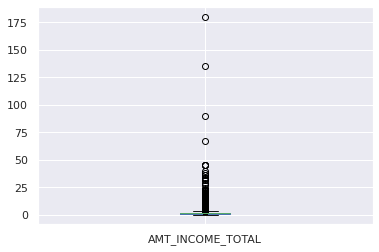

In [106]:
df['AMT_INCOME_TOTAL'].plot.box()

In [107]:
# Still few outlier values with more than 50 lakh income 
len(df[df['AMT_INCOME_TOTAL']>50.0])

4

In [108]:
# Find their details
df[(df['AMT_INCOME_TOTAL']>50.0)][['OCCUPATION_TYPE','ORGANIZATION_TYPE','NAME_INCOME_TYPE']]

OCCUPATION_TYPE       ORGANIZATION_TYPE      NAME_INCOME_TYPE
77768         Managers  Business Entity Type 1               Working
131127        Laborers       Transport: type 4               Working
203693         Unknown  Business Entity Type 3  Commercial associate
246858         Unknown  Business Entity Type 3  Commercial associate

In [109]:
# Find avg income of Managers, Laborers and skip the Unknown
df.groupby('OCCUPATION_TYPE', as_index=False)['AMT_INCOME_TOTAL'].mean()

OCCUPATION_TYPE  AMT_INCOME_TOTAL
0             Accountants          1.945784
1          Cleaning staff          1.307909
2           Cooking staff          1.383965
3              Core staff          1.726567
4                 Drivers          1.870116
5                HR staff          1.889163
6   High skill tech staff          1.828420
7                IT staff          2.134656
8                Laborers          1.642404
9      Low-skill Laborers          1.332280
10               Managers          2.603367
11         Medicine staff          1.497096
12  Private service staff          1.823348
13          Realty agents          1.950040
14            Sales staff          1.523029
15            Secretaries          1.605417
16         Security staff          1.496627
17                Unknown          1.535160
18   Waiters/barmen staff          1.442726

In [110]:
df = df[~(df['AMT_INCOME_TOTAL']>50.0)]


In [111]:
len(df[df['AMT_INCOME_TOTAL']>50.0])

0

In [112]:
#After Removing Outlier, Mean of AMT_INCOME_TOTAL
df.groupby('OCCUPATION_TYPE', as_index=False)['AMT_INCOME_TOTAL'].mean()

OCCUPATION_TYPE  AMT_INCOME_TOTAL
0             Accountants          1.945784
1          Cleaning staff          1.307909
2           Cooking staff          1.383965
3              Core staff          1.726567
4                 Drivers          1.870116
5                HR staff          1.889163
6   High skill tech staff          1.828420
7                IT staff          2.134656
8                Laborers          1.641210
9      Low-skill Laborers          1.332280
10               Managers          2.599277
11         Medicine staff          1.497096
12  Private service staff          1.823348
13          Realty agents          1.950040
14            Sales staff          1.523029
15            Secretaries          1.605417
16         Security staff          1.496627
17                Unknown          1.531924
18   Waiters/barmen staff          1.442726

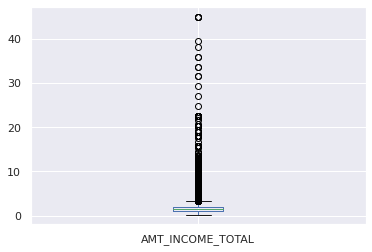

In [113]:
df['AMT_INCOME_TOTAL'].plot.box()

#### Inference : 
1. We have converted very large values in the column by dividing by 1,00,000 for easy reading.
2. There was 1 record with Laborer Occupation type having  > 200 lakh income, which we have removed.
3. There were 4 records with > 50 lakh income.
4. 3 out of these had unknown or Laborers as occupation type  
5. 1 had occupation type as manager
6. We compared it with the mean income of Managers(which is 2.603367 lakh) and Laborers(1.663575 lakh)
6. Since these values were far away from avg values, we have removed all these records 

In [114]:
# Print the remaining rows and cols
df.shape

(307506, 61)

#### Inference
Now we have handled outliers in most important columns and have 307510 and 83 cols for exploratory analysis

# Univariate Analysis 

### Univariate Analysis of all categorical columns

In [115]:
train_categorical = df.select_dtypes(include=['object']).columns
l_cat = list(train_categorical)


In [116]:
print(l_cat)
len(l_cat)

['ORGANIZATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_TYPE_SUITE', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'NAME_FAMILY_STATUS', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'CODE_GENDER', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE']


12

In [117]:
def plotting(train,  column):
    
    train = train
#     train_0 = train0
#     train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(10,8))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')

    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
      

In [ ]:
for column in l_cat:
    plotting(df, column)

In [ ]:
# 'CODE_GENDER', 'WEEKDAY_APPR_PROCESS_START', 'NAME_FAMILY_STATUS', 'NAME_CONTRACT_TYPE', 
# 'NAME_INCOME_TYPE', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE', 
# 'OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 'FLAG_OWN_CAR'

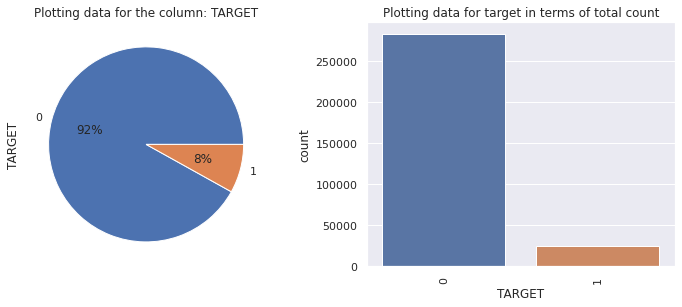

In [128]:
#'TARGET'
plotting(df, 'TARGET')

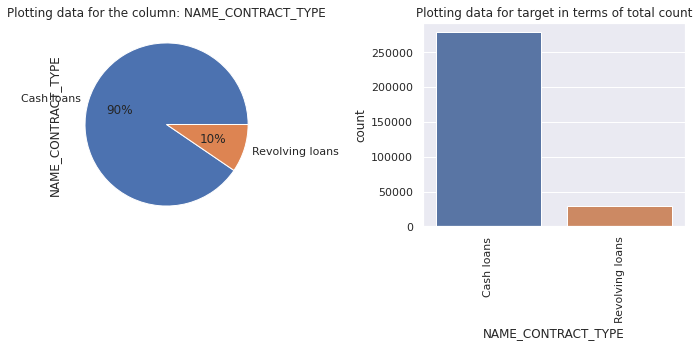

In [118]:
#'NAME_CONTRACT_TYPE'
plotting(df, 'NAME_CONTRACT_TYPE')

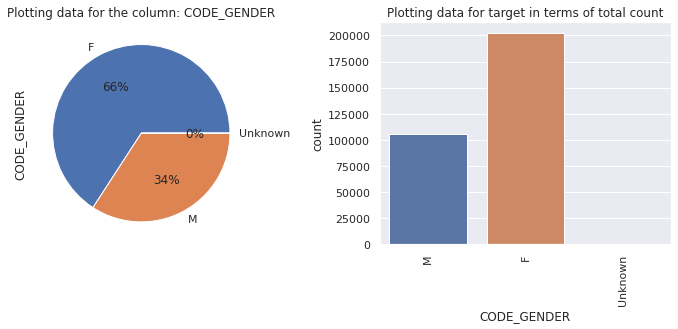

In [119]:
#'CODE_GENDER'
plotting(df, 'CODE_GENDER')

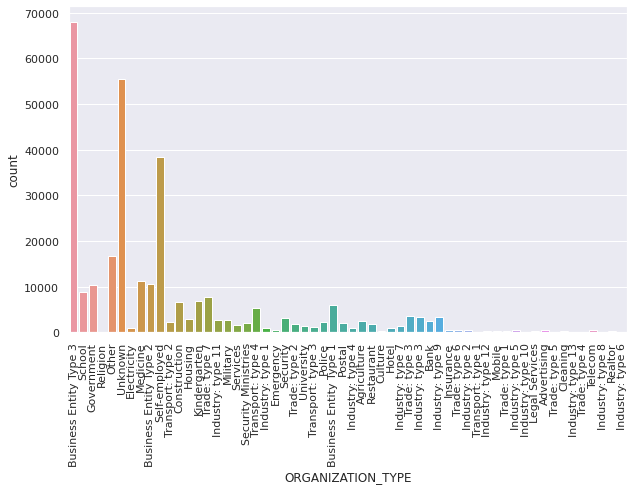

In [120]:
#'ORGANIZATION_TYPE'
fig = plt.figure(figsize=(10,6))
sns.countplot(x= 'ORGANIZATION_TYPE', data = df)
plt.xticks(rotation=90)
plt.show()

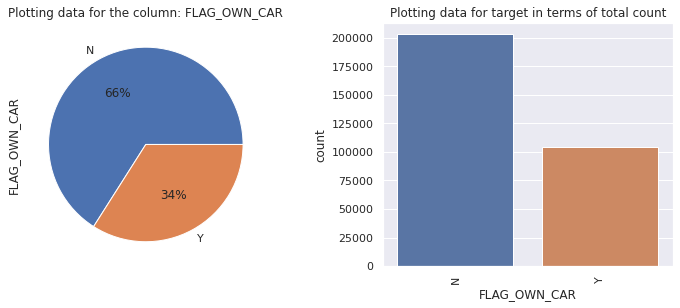

In [121]:
#'FLAG_OWN_CAR'
plotting(df, 'FLAG_OWN_CAR')

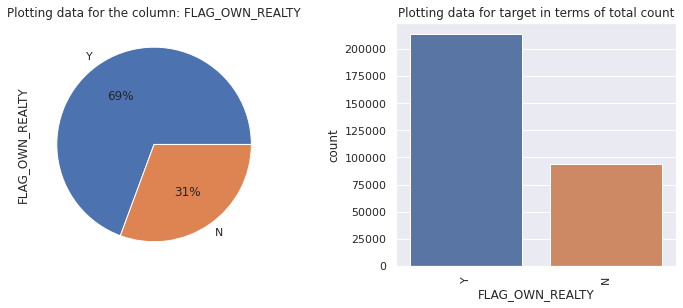

In [122]:
#'FLAG_OWN_REALTY'
plotting(df, 'FLAG_OWN_REALTY')

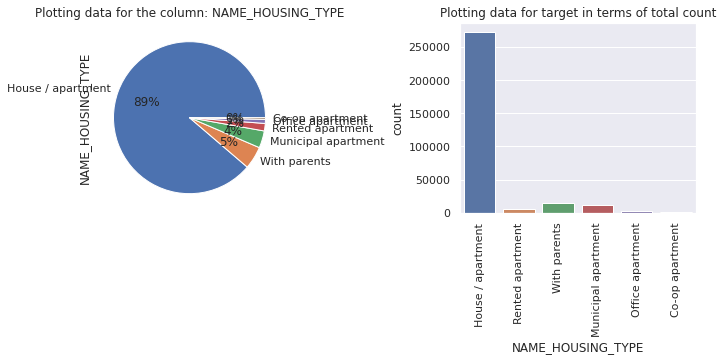

In [123]:
#'NAME_HOUSING_TYPE'
plotting(df, 'NAME_HOUSING_TYPE')

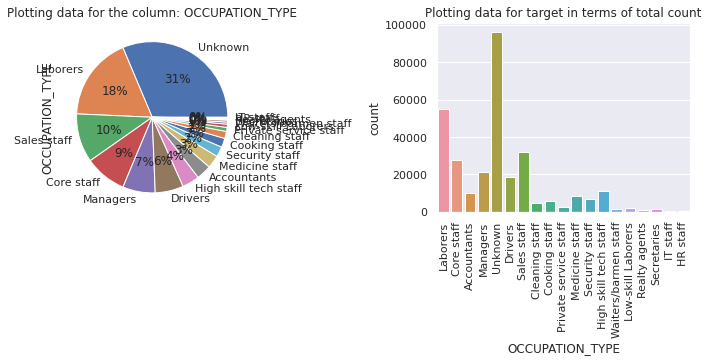

In [124]:
#'OCCUPATION_TYPE'
plotting(df, 'OCCUPATION_TYPE')

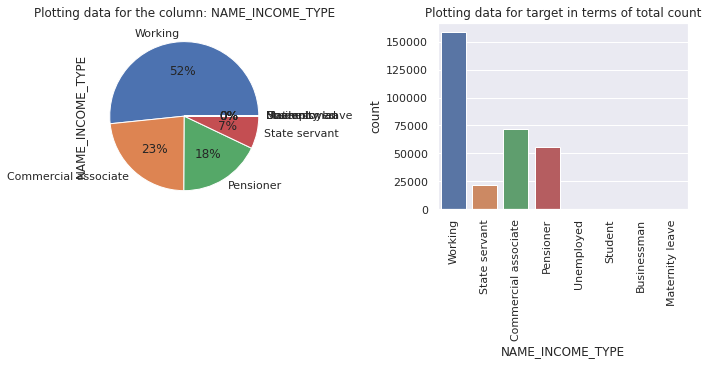

In [125]:
#'NAME_INCOME_TYPE'
plotting(df, 'NAME_INCOME_TYPE')

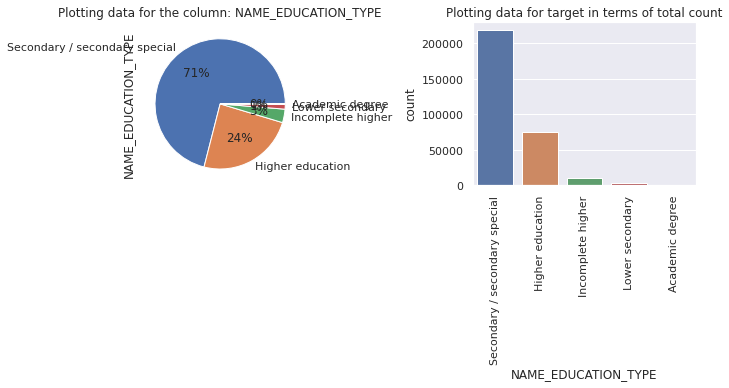

In [126]:

#'NAME_EDUCATION_TYPE'
plotting(df, 'NAME_EDUCATION_TYPE')

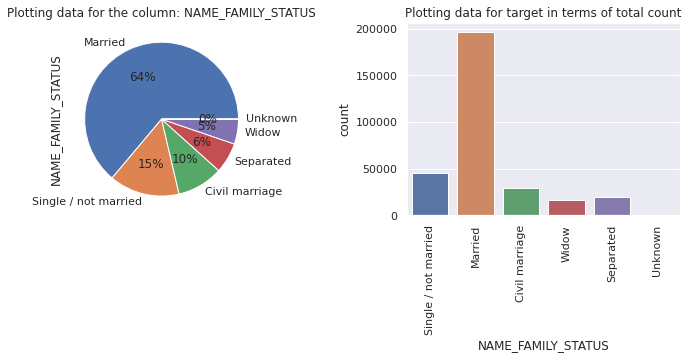

In [127]:
#'NAME_FAMILY_STATUS'
plotting(df, 'NAME_FAMILY_STATUS')

#### Inference:

1. 'NAME_CONTRACT_TYPE'

    90% Cash Loans, Remaining Revolving loans
    
Revolving loan is kind of credit card loan, which you should repay it again and again. cash loan is one time deal. People prefer cash loans. This may be because installment loans can be extended over time, allowing for lower monthly payments that may align better with your monthly cash flow needs.


2. 'CODE_GENDER',
66% F
34% Males


Females prefer loans than males. This may be because many banks are offering women customers home loans at rates lower than that for male customers. Besides, they get to enjoy other discounts such as lower processing fees.


3. 'ORGANIZATION_TYPE', 
Busi Entity Type 3 = 22%
Unknown = 18%
self employed =12%

Generally speaking, there are three basic types of legal entities in which business can be conducted: (1) sole proprietorship, (2) partnership, and (3) corporation.
For Corporations, LLCs, and Liability, 
When you incorporate your business, you’re protecting personal assets from the the company.
Lenders prefer that your business bears the burden of a loan without personal finances mixed in—and they also appreciate the credibility of a corporation or LLC. Your personal assets become protected against seizure if your business defaults on a loan in almost all cases.


4. 'FLAG_OWN_CAR',
66% with N


5. 'FLAG_OWN_REALTY',
69% with Y 


6. 'NAME_HOUSING_TYPE',
89% house/apt
5% with parent
4% municipal apt


And they live in their own house/apartment instead of parents/municipal apts.




7. 'OCCUPATION_TYPE',
31% Unknown
18% Laborers
10% Sales
9% Core
7% Manager
6% Driver

8. 'NAME_INCOME_TYPE',
52% working, 
23% commercial associate
18% pensioners, 
7% state servants

Though occupation of most is not known, most people are working.
Higher loan is taken by Laborers, followed by Sales Staff and Core Staff. 
Few pensioners also take loans. 


9. 'NAME_EDUCATION_TYPE',
71% secondary/special
24% higher
3% incomplete higher
Higher educated people seem to take loans. 
Earlier, it was believed that only people from the middle- income group choose to fund their education through student/education loans. With benefits of an education loan coming to the fore and specialists like HDFC Credila offering doorstep service, many affluent families are also opting for an education loan and availing of exclusive benefits 

10. 'NAME_FAMILY_STATUS', 
64% married
15% single/unmarried
Married people take more loans than unmarried.This may be to support family lifestyle.




### Univariate Analysis of Non-Continuous(Discrete) Numerical Columns

In [129]:
df.head()


AMT_REQ_CREDIT_BUREAU_YEAR       ORGANIZATION_TYPE  CNT_FAM_MEMBERS  \
0                    1.000000  Business Entity Type 3                1   
1                    0.000000                  School                2   
2                    0.000000              Government                1   
3                    0.865408  Business Entity Type 3                2   
4                    0.000000                Religion                1   

   EMERGENCYSTATE_MODE WEEKDAY_APPR_PROCESS_START NAME_TYPE_SUITE  \
0                  0.0                  WEDNESDAY   Unaccompanied   
1                  0.0                     MONDAY          Family   
2                  0.0                     MONDAY   Unaccompanied   
3                  0.0                  WEDNESDAY   Unaccompanied   
4                  0.0                   THURSDAY   Unaccompanied   

   FLAG_WORK_PHONE  REG_CITY_NOT_LIVE_CITY  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                       0                    0.000000   
1                0                       0                    0.000000   
2                1                       0                    0.000000   
3                0                       0                    0.864946   
4                0                       0                    0.000000   

   AMT_REQ_CREDIT_BUREAU_DAY  CNT_CHILDREN  YEARS_BEGINEXPLUATATION_MEDI  \
0                   0.000000             0                        0.9722   
1                   0.000000             0                        0.9851   
2                   0.000000             0                        0.9816   
3                   0.865092             0                        0.9816   
4                   0.000000             0                        0.9816   

   YEARS_BEGINEXPLUATATION_MODE FLAG_OWN_REALTY  SK_ID_CURR  AMT_CREDIT  \
0                        0.9722               Y      100002    406597.5   
1                        0.9851               N      100003   1293502.5   
2                        0.9816               Y      100004    135000.0   
3                        0.9816               Y      100006    312682.5   
4                        0.9816               Y      100007    513000.0   

   REG_REGION_NOT_LIVE_REGION  REGION_RATING_CLIENT FLAG_OWN_CAR  FLAG_PHONE  \
0                           0                     2            N           1   
1                           0                     1            N           1   
2                           0                     2            Y           1   
3                           0                     2            N           0   
4                           0                     2            N           0   

   AMT_REQ_CREDIT_BUREAU_WEEK  DEF_60_CNT_SOCIAL_CIRCLE  YEARS_EMPLOYED  \
0                    0.000000                       2.0               2   
1                    0.000000                       0.0               3   
2                    0.000000                       0.0               1   
3                    0.865986                       0.0               8   
4                    0.000000                       0.0               8   

   FLOORSMAX_MEDI    NAME_FAMILY_STATUS  DAYS_REGISTRATION  \
0          0.0833  Single / not married            -3648.0   
1          0.2917               Married            -1186.0   
2          0.1667  Single / not married            -4260.0   
3          0.1667        Civil marriage            -9833.0   
4          0.1667  Single / not married            -4311.0   

   REGION_RATING_CLIENT_W_CITY NAME_CONTRACT_TYPE  \
0                            2         Cash loans   
1                            1         Cash loans   
2                            2    Revolving loans   
3                            2         Cash loans   
4                            2         Cash loans   

             NAME_EDUCATION_TYPE  REG_CITY_NOT_WORK_CITY  \
0  Secondary / secondary special                       0   
1               Higher education              

In [130]:
train_numerical = df.select_dtypes(include=['int64','float64']).columns
nl = list(train_numerical)
len(nl)

49

In [131]:
conti_cols=[]
for col in nl:
    vals = len(df[col].value_counts())
    if(vals > 2):
        conti_cols.append([col,vals ])
conti_cols = pd.DataFrame(conti_cols)
conti_cols
conti_cols=list(conti_cols[0])
len(conti_cols)

35

In [132]:
non_conti_cols=list(set(nl)-set(conti_cols))
len(non_conti_cols)

14

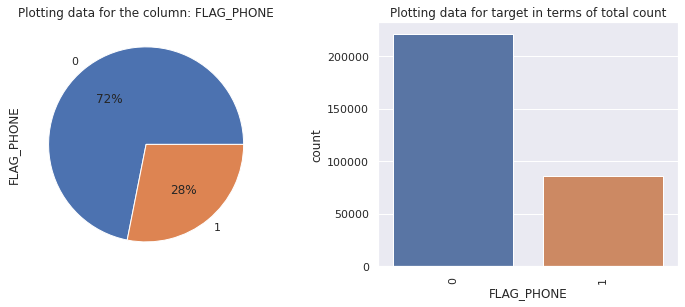

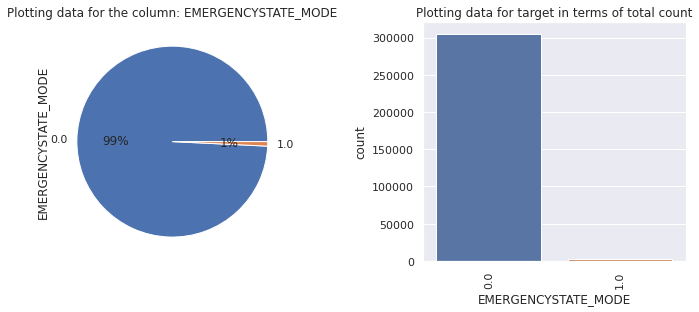

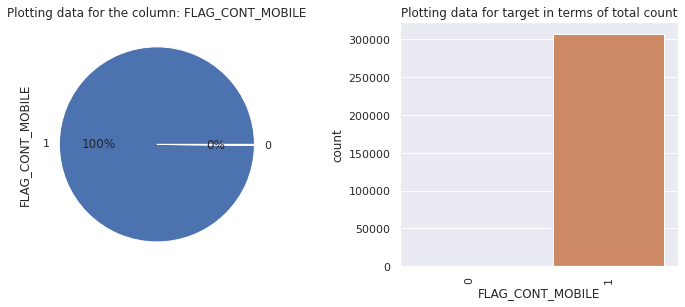

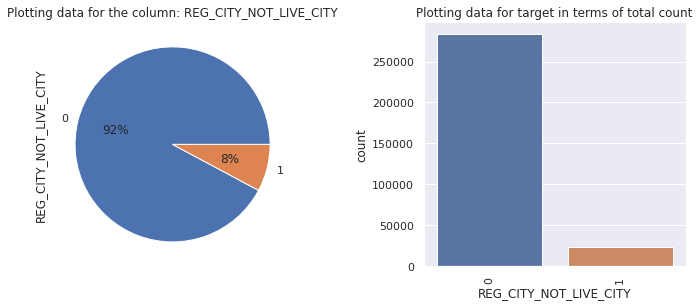

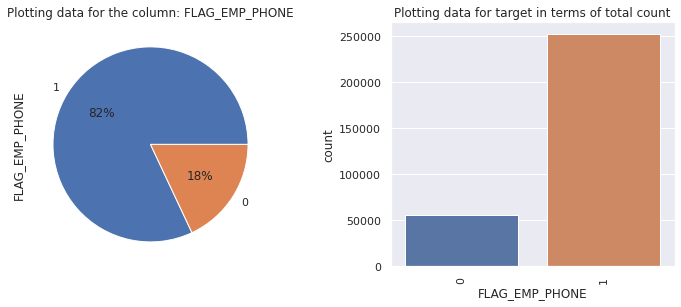

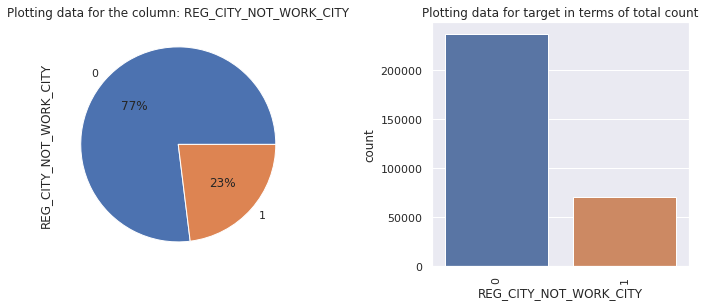

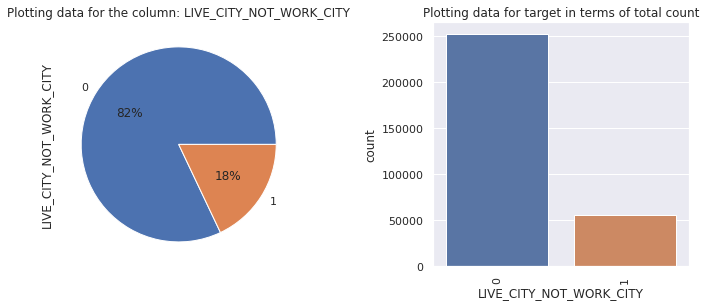

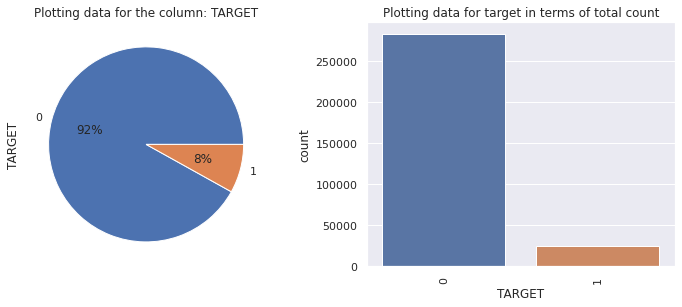

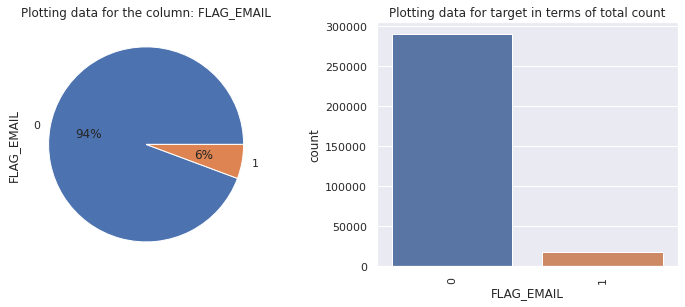

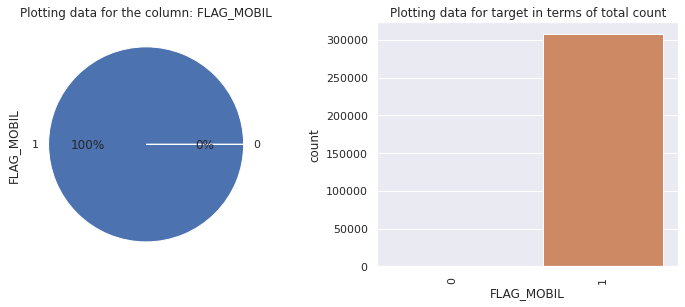

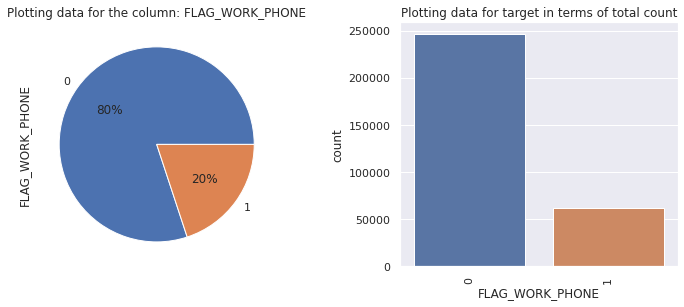

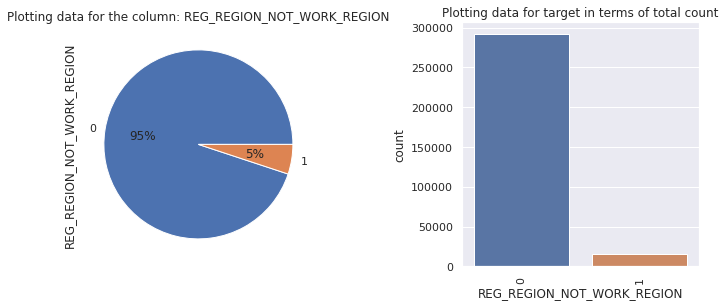

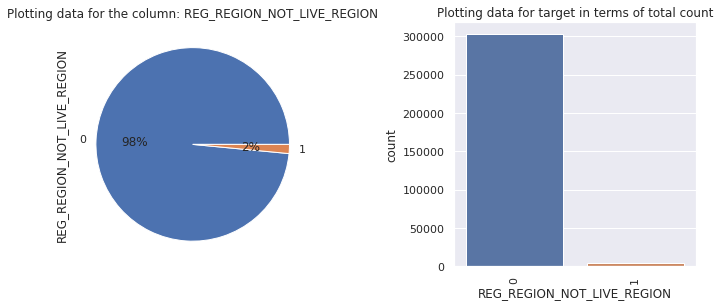

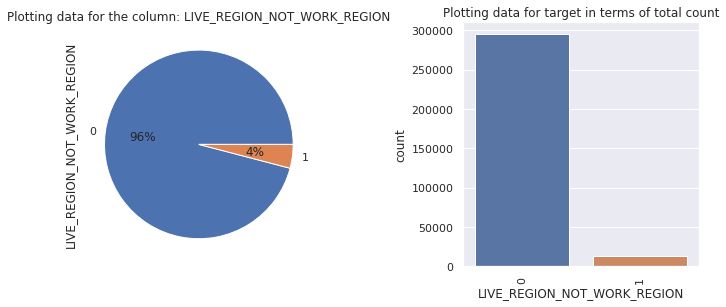

In [133]:
for column in non_conti_cols:
#     print(column)
    plotting(df, column)



#### Inference : 

'REG_REGION_NOT_LIVE_REGION' - 98%- 0,

'LIVE_CITY_NOT_WORK_CITY' - 82% - 0,

'TARGET' - 92% - 0,

'REG_REGION_NOT_WORK_REGION' - 95% - 0,

'LIVE_REGION_NOT_WORK_REGION' - 96% - 0,
 
 'EMERGENCYSTATE_MODE' - 99%-0,
 
 'REG_CITY_NOT_WORK_CITY' - 77% - 0,
 
 
 'REG_CITY_NOT_LIVE_CITY' - 92% - 0,
 
 'FLAG_EMAIL' - 94% - 0,
 
 'FLAG_PHONE' - 72%-0,
 
 'FLAG_WORK_PHONE' - 80% - 0,

'FLAG_EMP_PHONE' - 82% - 1



Below columns can be removed as they contain 100% single value: 

 'FLAG_MOBIL' - 100% - 1,

'FLAG_CONT_MOBILE ' - 100% - 0



In [141]:
#df6 = df.copy()
#df=df6.copy()
single_val_col_list = ["FLAG_MOBIL","FLAG_CONT_MOBILE"]

single_val_col_list = set(df.columns) - set(single_val_col_list)
single_val_col_list = list(single_val_col_list)
df = df[single_val_col_list] 

df.columns


Index(['AMT_REQ_CREDIT_BUREAU_YEAR', 'ORGANIZATION_TYPE', 'CNT_FAM_MEMBERS',
       'EMERGENCYSTATE_MODE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_TYPE_SUITE',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_WORK_PHONE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'CNT_CHILDREN', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_MODE', 'SK_ID_CURR', 'FLAG_OWN_REALTY',
       'AMT_CREDIT', 'REG_REGION_NOT_LIVE_REGION', 'REGION_RATING_CLIENT',
       'FLAG_OWN_CAR', 'FLAG_PHONE', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'YEARS_EMPLOYED', 'FLOORSMAX_MEDI',
       'NAME_FAMILY_STATUS', 'DAYS_REGISTRATION',
       'REGION_RATING_CLIENT_W_CITY', 'NAME_CONTRACT_TYPE',
       'NAME_EDUCATION_TYPE', 'REG_CITY_NOT_WORK_CITY',
       'AMT_REQ_CREDIT_BUREAU_MON', 'EXT_SOURCE_2', 'CODE_GENDER',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'DAYS_ID_PUBLISH', 'AMT_GOODS_PRICE',
       'FLAG_EMP_PHONE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'REGION_POPULATION_

In [142]:
df.shape

(307506, 59)

### Segmented Univariate Analysis of Continuous Numerical Columns
These will be handled in segmented column analysis

In [143]:
correl_mat = df.corr()
correl_mat.head()

AMT_REQ_CREDIT_BUREAU_YEAR  CNT_FAM_MEMBERS  \
AMT_REQ_CREDIT_BUREAU_YEAR                    1.000000        -0.020015   
CNT_FAM_MEMBERS                              -0.020015         1.000000   
EMERGENCYSTATE_MODE                           0.001866        -0.000994   
REG_CITY_NOT_LIVE_CITY                       -0.010196         0.012256   
FLAG_WORK_PHONE                              -0.071111         0.067145   

                            EMERGENCYSTATE_MODE  REG_CITY_NOT_LIVE_CITY  \
AMT_REQ_CREDIT_BUREAU_YEAR             0.001866               -0.010196   
CNT_FAM_MEMBERS                       -0.000994                0.012256   
EMERGENCYSTATE_MODE                    1.000000               -0.000977   
REG_CITY_NOT_LIVE_CITY                -0.000977                1.000000   
FLAG_WORK_PHONE                       -0.001044                0.045951   

                            FLAG_WORK_PHONE  AMT_REQ_CREDIT_BUREAU_HOUR  \
AMT_REQ_CREDIT_BUREAU_YEAR        -0.071111                   -0.193752   
CNT_FAM_MEMBERS                    0.067145                   -0.029204   
EMERGENCYSTATE_MODE               -0.001044                    0.001149   
REG_CITY_NOT_LIVE_CITY             0.045951                    0.028785   
FLAG_WORK_PHONE                    1.000000                    0.009266   

                            AMT_REQ_CREDIT_BUREAU_DAY  CNT_CHILDREN  \
AMT_REQ_CREDIT_BUREAU_YEAR                  -0.189109     -0.034348   
CNT_FAM_MEMBERS                             -0.029040      0.874065   
EMERGENCYSTATE_MODE                          0.000253      0.004721   
REG_CITY_NOT_LIVE_CITY                       0.027324      0.020009   
FLAG_WORK_PHONE                              0.008929      0.055307   

                            YEARS_BEGINEXPLUATATION_MEDI  \
AMT_REQ_CREDIT_BUREAU_YEAR                     -0.005107   
CNT_FAM_MEMBERS                                 0.007940   
EMERGENCYSTATE_MODE                            -0.021667   
REG_CITY_NOT_LIVE_CITY                          0.000422   
FLAG_WORK_PHONE                                 0.001313   

                            YEARS_BEGINEXPLUATATION_MODE  SK_ID_CURR  \
AMT_REQ_CREDIT_BUREAU_YEAR                     -0.004992    0.004021   
CNT_FAM_MEMBERS                                 0.008089   -0.003072   
EMERGENCYSTATE_MODE                            -0.022042    0.002548   
REG_CITY_NOT_LIVE_CITY                          0.002102   -0.001886   
FLAG_WORK_PHONE                                 0.001442   -0.000423   

                            AMT_CREDIT  REG_REGION_NOT_LIVE_REGION  \
AMT_REQ_CREDIT_BUREAU_YEAR   -0.035260                   -0.018494   
CNT_FAM_MEMBERS               0.063529                   -0.017112   
EMERGENCYSTATE_MODE          -0.004307                   -0.001308   
REG_CITY_NOT_LIVE_CITY       -0.026882                    0.339232   
FLAG_WORK_PHONE              -0.021098                    0.064486   

                            REGION_RATING_CLIENT  FLAG_PHONE  \
AMT_REQ_CREDIT_BUREAU_YEAR              0.011285   -0.024264   
CNT_FAM_MEMBERS                         0.029976   -0.015672   
EMERGENCYSTATE_MODE                     0.017752   -0.009291   
REG_CITY_NOT_LIVE_CITY                  0.035740   -0.048497   
FLAG_WORK_PHONE                         0.007350    0.293101   

                            AMT_REQ_CREDIT_BUREAU_WEEK  \
AMT_REQ_CREDIT_BUREAU_YEAR                   -0.155267   
CNT_FAM_MEMBERS                              -0.025939   
EMERGENCYSTATE_MODE                           0.000549   
REG_CITY_NOT_LIVE_CITY                        0.023867   
FLAG_WORK_PHONE                               0.006772   

                            DEF_60_CNT_SOCIAL_CIRCLE  YEARS_EMPLOYED  \
AMT_REQ_CREDIT_BUREAU_YEAR                  0.013392       -0.006114   
CNT_FAM_MEMBERS                            -0.005897        0.068454   
EMERGENCYSTATE_MODE                         0.002785       -0.002334   
REG_CITY_NO

#### Inference : 
Correlation matrix contains 1.000 for self and negative values


We can convert negative values to positive to find the value of coeff. 

Negative sign indicates negative relation, means one value increases and other decreases

Positive values indicate positive relation, means both value increases 

In [ ]:
#fig = plt.figure(figsize=(30,40))

#sns.heatmap(correl_mat,annot=True);


In [144]:
# Find correl coeff
correl_mat_val = abs(correl_mat)
correl_mat_val.head()

AMT_REQ_CREDIT_BUREAU_YEAR  CNT_FAM_MEMBERS  \
AMT_REQ_CREDIT_BUREAU_YEAR                    1.000000         0.020015   
CNT_FAM_MEMBERS                               0.020015         1.000000   
EMERGENCYSTATE_MODE                           0.001866         0.000994   
REG_CITY_NOT_LIVE_CITY                        0.010196         0.012256   
FLAG_WORK_PHONE                               0.071111         0.067145   

                            EMERGENCYSTATE_MODE  REG_CITY_NOT_LIVE_CITY  \
AMT_REQ_CREDIT_BUREAU_YEAR             0.001866                0.010196   
CNT_FAM_MEMBERS                        0.000994                0.012256   
EMERGENCYSTATE_MODE                    1.000000                0.000977   
REG_CITY_NOT_LIVE_CITY                 0.000977                1.000000   
FLAG_WORK_PHONE                        0.001044                0.045951   

                            FLAG_WORK_PHONE  AMT_REQ_CREDIT_BUREAU_HOUR  \
AMT_REQ_CREDIT_BUREAU_YEAR         0.071111                    0.193752   
CNT_FAM_MEMBERS                    0.067145                    0.029204   
EMERGENCYSTATE_MODE                0.001044                    0.001149   
REG_CITY_NOT_LIVE_CITY             0.045951                    0.028785   
FLAG_WORK_PHONE                    1.000000                    0.009266   

                            AMT_REQ_CREDIT_BUREAU_DAY  CNT_CHILDREN  \
AMT_REQ_CREDIT_BUREAU_YEAR                   0.189109      0.034348   
CNT_FAM_MEMBERS                              0.029040      0.874065   
EMERGENCYSTATE_MODE                          0.000253      0.004721   
REG_CITY_NOT_LIVE_CITY                       0.027324      0.020009   
FLAG_WORK_PHONE                              0.008929      0.055307   

                            YEARS_BEGINEXPLUATATION_MEDI  \
AMT_REQ_CREDIT_BUREAU_YEAR                      0.005107   
CNT_FAM_MEMBERS                                 0.007940   
EMERGENCYSTATE_MODE                             0.021667   
REG_CITY_NOT_LIVE_CITY                          0.000422   
FLAG_WORK_PHONE                                 0.001313   

                            YEARS_BEGINEXPLUATATION_MODE  SK_ID_CURR  \
AMT_REQ_CREDIT_BUREAU_YEAR                      0.004992    0.004021   
CNT_FAM_MEMBERS                                 0.008089    0.003072   
EMERGENCYSTATE_MODE                             0.022042    0.002548   
REG_CITY_NOT_LIVE_CITY                          0.002102    0.001886   
FLAG_WORK_PHONE                                 0.001442    0.000423   

                            AMT_CREDIT  REG_REGION_NOT_LIVE_REGION  \
AMT_REQ_CREDIT_BUREAU_YEAR    0.035260                    0.018494   
CNT_FAM_MEMBERS               0.063529                    0.017112   
EMERGENCYSTATE_MODE           0.004307                    0.001308   
REG_CITY_NOT_LIVE_CITY        0.026882                    0.339232   
FLAG_WORK_PHONE               0.021098                    0.064486   

                            REGION_RATING_CLIENT  FLAG_PHONE  \
AMT_REQ_CREDIT_BUREAU_YEAR              0.011285    0.024264   
CNT_FAM_MEMBERS                         0.029976    0.015672   
EMERGENCYSTATE_MODE                     0.017752    0.009291   
REG_CITY_NOT_LIVE_CITY                  0.035740    0.048497   
FLAG_WORK_PHONE                         0.007350    0.293101   

                            AMT_REQ_CREDIT_BUREAU_WEEK  \
AMT_REQ_CREDIT_BUREAU_YEAR                    0.155267   
CNT_FAM_MEMBERS                               0.025939   
EMERGENCYSTATE_MODE                           0.000549   
REG_CITY_NOT_LIVE_CITY                        0.023867   
FLAG_WORK_PHONE                               0.006772   

                            DEF_60_CNT_SOCIAL_CIRCLE  YEARS_EMPLOYED  \
AMT_REQ_CREDIT_BUREAU_YEAR                  0.013392        0.006114   
CNT_FAM_MEMBERS                             0.005897        0.068454   
EMERGENCYSTATE_MODE                         0.002785        0.002334   
REG_CITY_NO

In [145]:
# Find very highly correl columns at start
correl_mat_val = correl_mat_val[correl_mat_val > 0.5]
correl_mat_val.head()

AMT_REQ_CREDIT_BUREAU_YEAR  CNT_FAM_MEMBERS  \
AMT_REQ_CREDIT_BUREAU_YEAR                         1.0              NaN   
CNT_FAM_MEMBERS                                    NaN              1.0   
EMERGENCYSTATE_MODE                                NaN              NaN   
REG_CITY_NOT_LIVE_CITY                             NaN              NaN   
FLAG_WORK_PHONE                                    NaN              NaN   

                            EMERGENCYSTATE_MODE  REG_CITY_NOT_LIVE_CITY  \
AMT_REQ_CREDIT_BUREAU_YEAR                  NaN                     NaN   
CNT_FAM_MEMBERS                             NaN                     NaN   
EMERGENCYSTATE_MODE                         1.0                     NaN   
REG_CITY_NOT_LIVE_CITY                      NaN                     1.0   
FLAG_WORK_PHONE                             NaN                     NaN   

                            FLAG_WORK_PHONE  AMT_REQ_CREDIT_BUREAU_HOUR  \
AMT_REQ_CREDIT_BUREAU_YEAR              NaN                         NaN   
CNT_FAM_MEMBERS                         NaN                         NaN   
EMERGENCYSTATE_MODE                     NaN                         NaN   
REG_CITY_NOT_LIVE_CITY                  NaN                         NaN   
FLAG_WORK_PHONE                         1.0                         NaN   

                            AMT_REQ_CREDIT_BUREAU_DAY  CNT_CHILDREN  \
AMT_REQ_CREDIT_BUREAU_YEAR                        NaN           NaN   
CNT_FAM_MEMBERS                                   NaN      0.874065   
EMERGENCYSTATE_MODE                               NaN           NaN   
REG_CITY_NOT_LIVE_CITY                            NaN           NaN   
FLAG_WORK_PHONE                                   NaN           NaN   

                            YEARS_BEGINEXPLUATATION_MEDI  \
AMT_REQ_CREDIT_BUREAU_YEAR                           NaN   
CNT_FAM_MEMBERS                                      NaN   
EMERGENCYSTATE_MODE                                  NaN   
REG_CITY_NOT_LIVE_CITY                               NaN   
FLAG_WORK_PHONE                                      NaN   

                            YEARS_BEGINEXPLUATATION_MODE  SK_ID_CURR  \
AMT_REQ_CREDIT_BUREAU_YEAR                           NaN         NaN   
CNT_FAM_MEMBERS                                      NaN         NaN   
EMERGENCYSTATE_MODE                                  NaN         NaN   
REG_CITY_NOT_LIVE_CITY                               NaN         NaN   
FLAG_WORK_PHONE                                      NaN         NaN   

                            AMT_CREDIT  REG_REGION_NOT_LIVE_REGION  \
AMT_REQ_CREDIT_BUREAU_YEAR         NaN                         NaN   
CNT_FAM_MEMBERS                    NaN                         NaN   
EMERGENCYSTATE_MODE                NaN                         NaN   
REG_CITY_NOT_LIVE_CITY             NaN                         NaN   
FLAG_WORK_PHONE                    NaN                         NaN   

                            REGION_RATING_CLIENT  FLAG_PHONE  \
AMT_REQ_CREDIT_BUREAU_YEAR                   NaN         NaN   
CNT_FAM_MEMBERS                              NaN         NaN   
EMERGENCYSTATE_MODE                          NaN         NaN   
REG_CITY_NOT_LIVE_CITY                       NaN         NaN   
FLAG_WORK_PHONE                              NaN         NaN   

                            AMT_REQ_CREDIT_BUREAU_WEEK  \
AMT_REQ_CREDIT_BUREAU_YEAR                         NaN   
CNT_FAM_MEMBERS                                    NaN   
EMERGENCYSTATE_MODE                                NaN   
REG_CITY_NOT_LIVE_CITY                             NaN   
FLAG_WORK_PHONE                                    NaN   

                            DEF_60_CNT_SOCIAL_CIRCLE  YEARS_EMPLOYED  \
AMT_REQ_CREDIT_BUREAU_YEAR                       NaN             NaN   
CNT_FAM_MEMBERS                                  NaN             NaN   
EMERGENCYSTATE_MODE                              NaN             NaN   
REG_CITY_NO

In [ ]:
# Find the correlation cols

In [146]:
x_list = {}
for n in correl_mat_val.columns:
    new_correl_df = pd.DataFrame(correl_mat_val[~(correl_mat_val[n].isnull())][n])
    print(new_correl_df)   

                            AMT_REQ_CREDIT_BUREAU_YEAR
AMT_REQ_CREDIT_BUREAU_YEAR                         1.0
                 CNT_FAM_MEMBERS
CNT_FAM_MEMBERS         1.000000
CNT_CHILDREN            0.874065
                     EMERGENCYSTATE_MODE
EMERGENCYSTATE_MODE                  1.0
                        REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_LIVE_CITY                     1.0
                 FLAG_WORK_PHONE
FLAG_WORK_PHONE              1.0
                            AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_HOUR                    1.000000
AMT_REQ_CREDIT_BUREAU_DAY                     0.931434
AMT_REQ_CREDIT_BUREAU_WEEK                    0.803634
                            AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_HOUR                   0.931434
AMT_REQ_CREDIT_BUREAU_DAY                    1.000000
AMT_REQ_CREDIT_BUREAU_WEEK                   0.823985
                 CNT_CHILDREN
CNT_FAM_MEMBERS      0.874065
CNT_CHILDREN         1.000000
                       

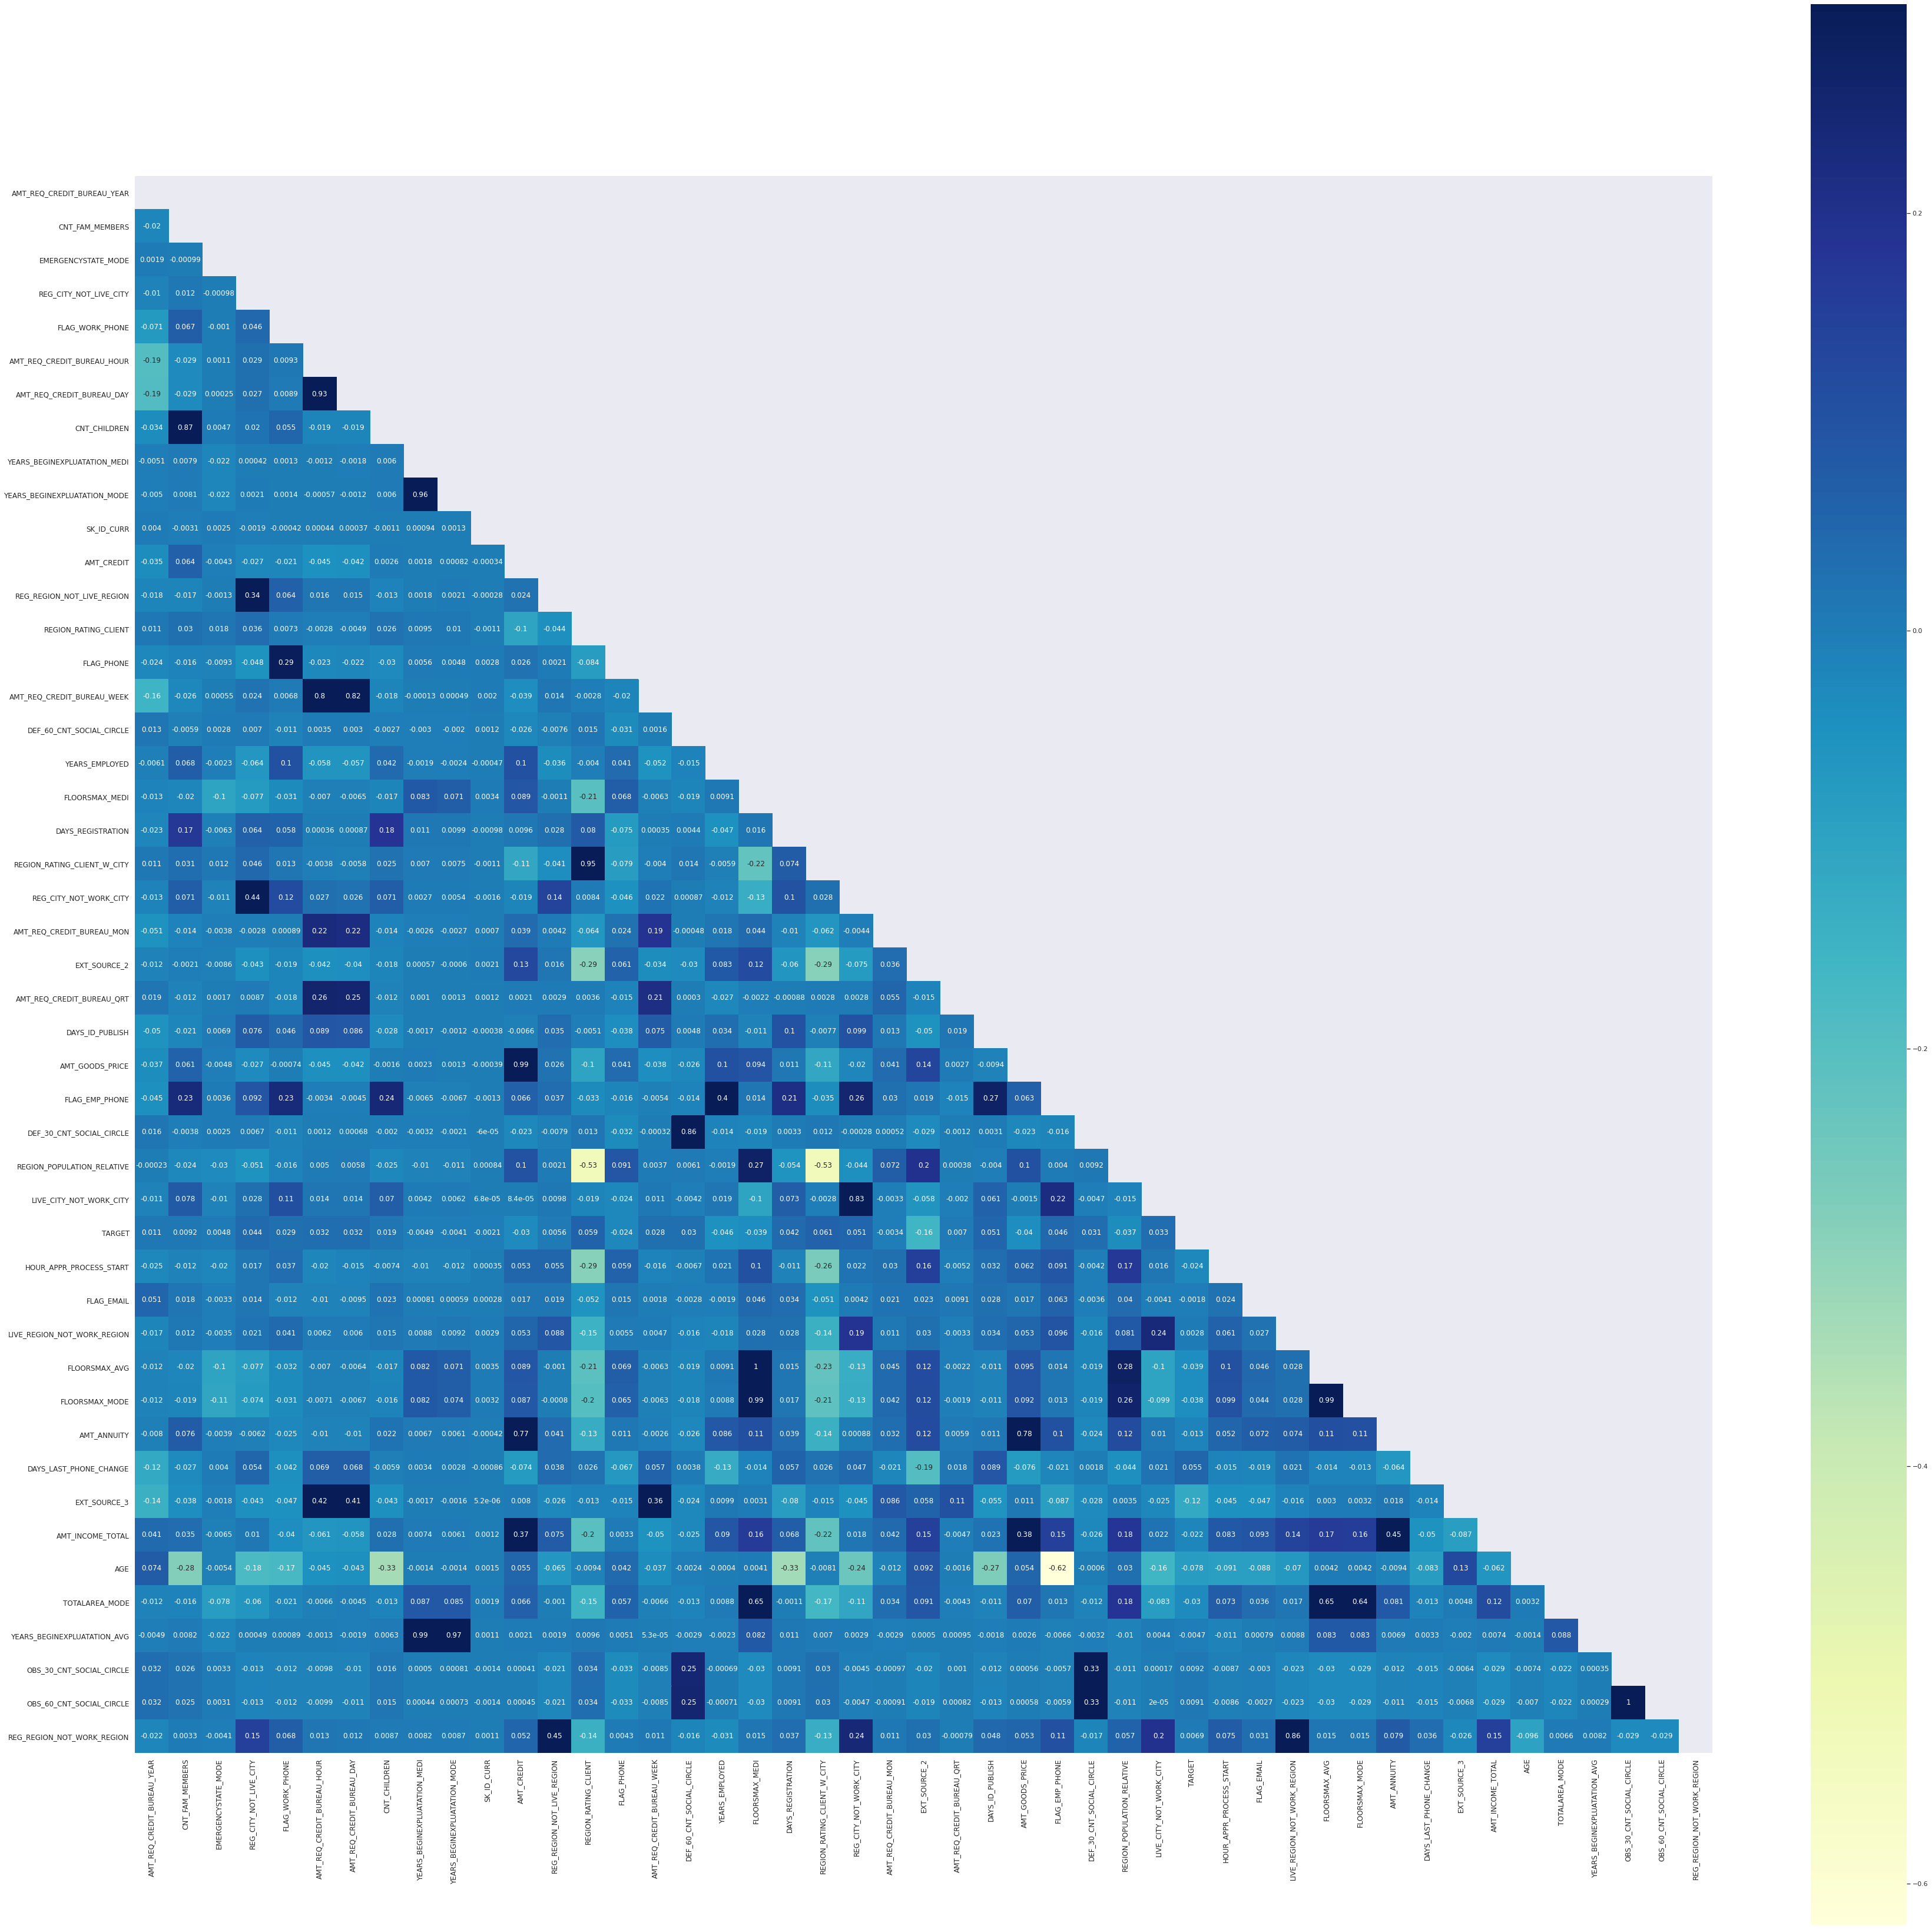

In [147]:

import numpy as np
#corr = train_0.corr()
mask = np.zeros_like(correl_mat)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(60, 60))
for item in ([ ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
with sns.axes_style("white"):    
    ax = sns.heatmap(correl_mat, mask=mask, vmax=.3,annot=True, square=True, cmap="YlGnBu");

In [ ]:
#df4 = df.copy()

In [148]:
independent_col_list = ['AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'DAYS_ID_PUBLISH', 'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_WORK_PHONE', 'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'EMERGENCYSTATE_MODE', 'FLAG_EMP_PHONE']
indep_col_list = set(df.columns) - set(independent_col_list)
indep_col_list = list(indep_col_list)
df = df[indep_col_list] 

In [149]:
df.shape

(307506, 47)

# Univariate Segmented Analysis

In [150]:
df.head()

ORGANIZATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  \
0  Business Entity Type 3                1                  WEDNESDAY   
1                  School                2                     MONDAY   
2              Government                1                     MONDAY   
3  Business Entity Type 3                2                  WEDNESDAY   
4                Religion                1                   THURSDAY   

  NAME_TYPE_SUITE  REG_CITY_NOT_LIVE_CITY  AMT_REQ_CREDIT_BUREAU_HOUR  \
0   Unaccompanied                       0                    0.000000   
1          Family                       0                    0.000000   
2   Unaccompanied                       0                    0.000000   
3   Unaccompanied                       0                    0.864946   
4   Unaccompanied                       0                    0.000000   

   AMT_REQ_CREDIT_BUREAU_DAY  CNT_CHILDREN  YEARS_BEGINEXPLUATATION_MEDI  \
0                   0.000000             0                        0.9722   
1                   0.000000             0                        0.9851   
2                   0.000000             0                        0.9816   
3                   0.865092             0                        0.9816   
4                   0.000000             0                        0.9816   

   YEARS_BEGINEXPLUATATION_MODE  SK_ID_CURR FLAG_OWN_REALTY  AMT_CREDIT  \
0                        0.9722      100002               Y    406597.5   
1                        0.9851      100003               N   1293502.5   
2                        0.9816      100004               Y    135000.0   
3                        0.9816      100006               Y    312682.5   
4                        0.9816      100007               Y    513000.0   

   OBS_60_CNT_SOCIAL_CIRCLE  REG_REGION_NOT_LIVE_REGION FLAG_OWN_CAR  \
0                       2.0                           0            N   
1                       1.0                           0            N   
2                       0.0                           0            Y   
3                       2.0                           0            N   
4                       0.0                           0            N   

   REGION_RATING_CLIENT  AMT_REQ_CREDIT_BUREAU_WEEK  DEF_60_CNT_SOCIAL_CIRCLE  \
0                     2                    0.000000                       2.0   
1                     1                    0.000000                       0.0   
2                     2                    0.000000                       0.0   
3                     2                    0.865986                       0.0   
4                     2                    0.000000                       0.0   

   YEARS_EMPLOYED  FLOORSMAX_MEDI    NAME_FAMILY_STATUS  \
0               2          0.0833  Single / not married   
1               3          0.2917               Married   
2               1          0.1667  Single / not married   
3               8          0.1667        Civil marriage   
4               8          0.1667  Single / not married   

   REGION_RATING_CLIENT_W_CITY NAME_CONTRACT_TYPE  \
0                            2         Cash loans   
1                            1         Cash loans   
2                            2    Revolving loans   
3                            2         Cash loans   
4                            2         Cash loans   

             NAME_EDUCATION_TYPE  REG_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
0  Secondary / secondary special                       0      0.262949   
1               Higher education                       0      0.622246   
2  Secondary / secondary special                       0      0.555912   
3  Secondary / secondary special                       0      0.650442   
4  Secondary / secondary special                       1      0.322738   

  CODE_GENDER  AMT_GOODS_PRICE  DEF_30_CNT_SOCIAL_CIRCLE  \
0           M         351000.0                       2.0   
1           F        1129500.0                       0.0   
2  

In [151]:
df['TARGET'].value_counts()

0    282682
1     24824
Name: TARGET, dtype: int64

In [152]:
# Clients paying on time
(df['TARGET']==0).sum()

282682

In [153]:
# Clients with payment difficulties
(df['TARGET']==1).sum()

24824

# Check imbalance in dataset for TARGET column


In [154]:
# Ratio  for imbalance
(df['TARGET']==0).sum() / (df['TARGET']==1).sum()

11.387447631324525

In [155]:


train_0 = df.loc[df['TARGET'] == 0]
train_1 = df.loc[df['TARGET'] == 1]

#### Inference : 

Since there is a lot of imbalance, we have separated out the Target variables


In [156]:
# categorical columns are:

cat_col = list(set(df.columns) - set(df.describe().columns))
len(cat_col)

12

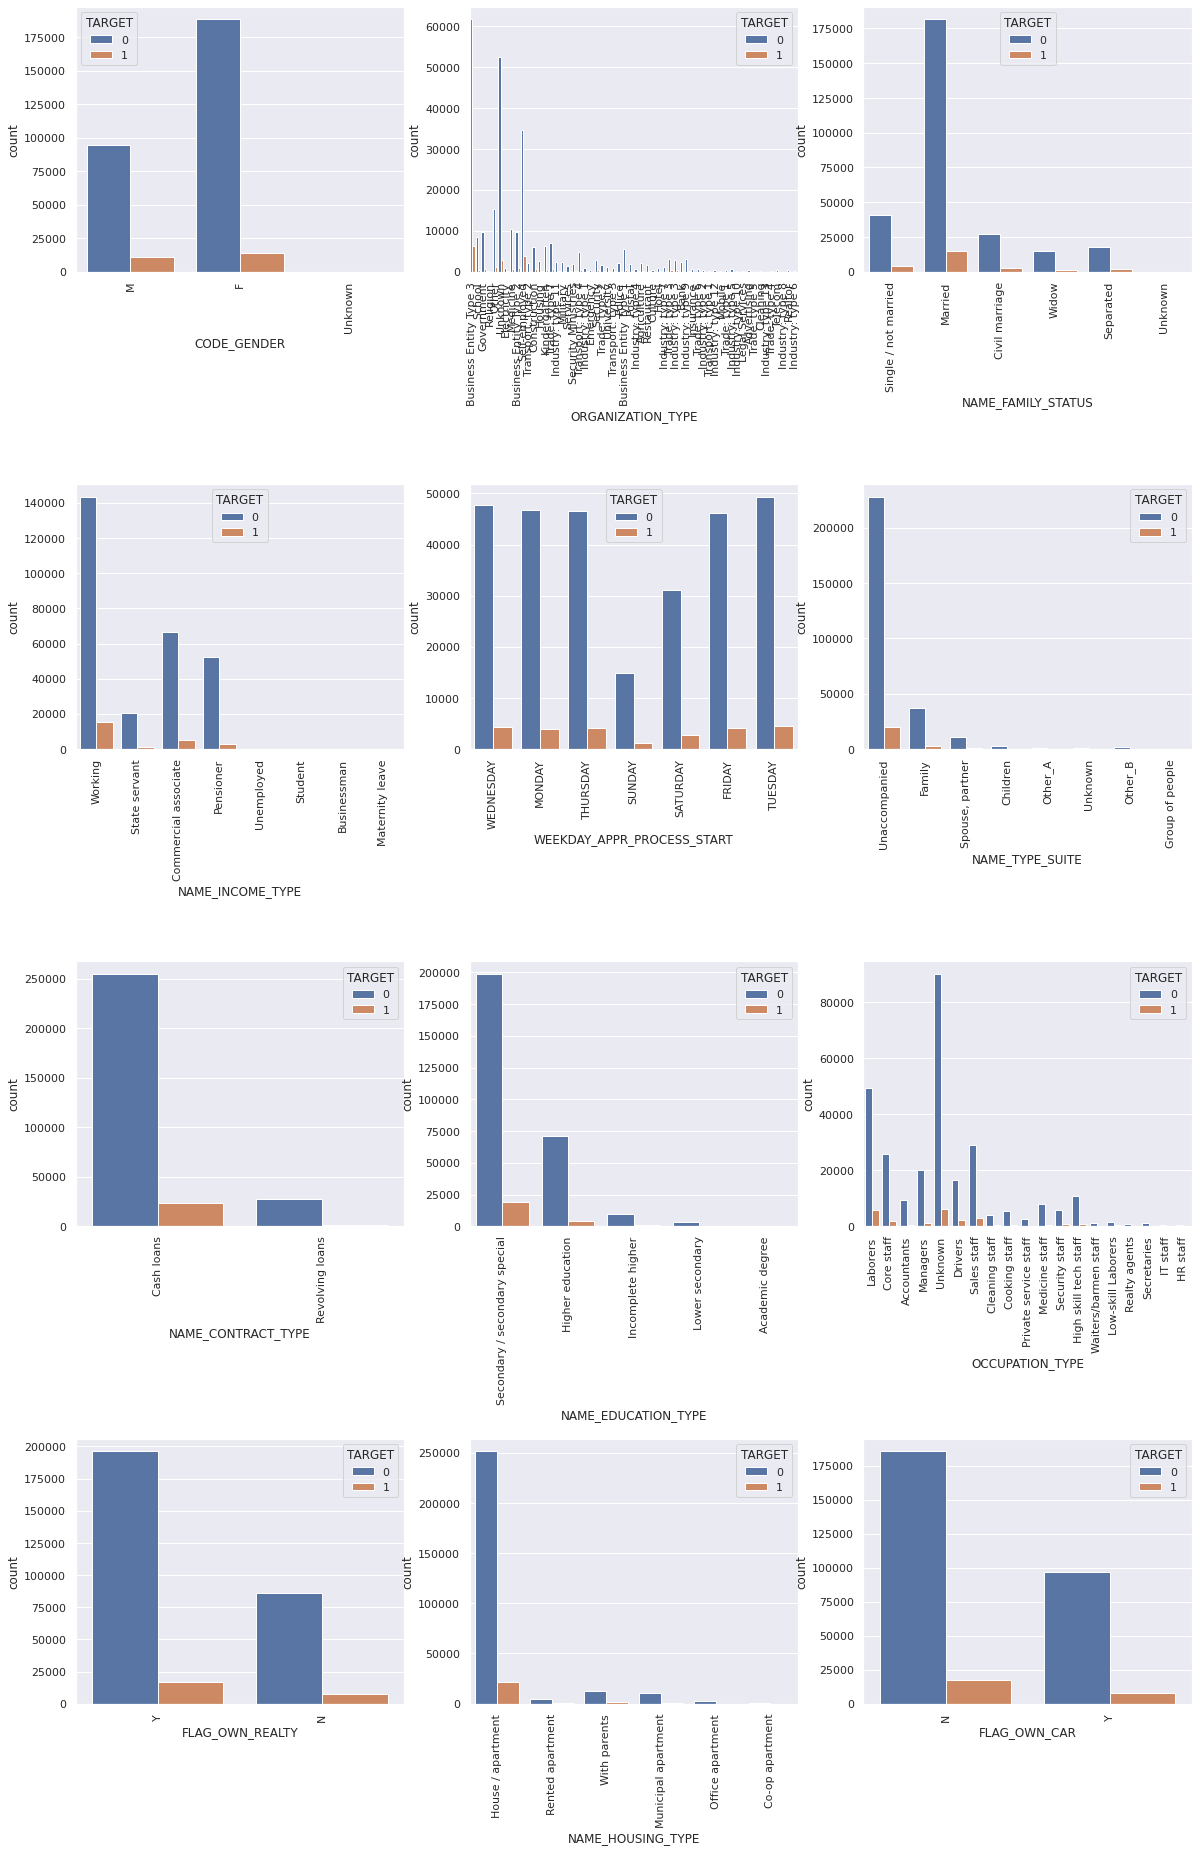

In [157]:
plt.figure(figsize = (20, 40))

plt.subplots_adjust(hspace=0.8)
for i in enumerate(cat_col):
    plt.subplot(5, 3, i[0]+1)
    sns.countplot(x = i[1], hue = 'TARGET', data = df)
    plt.xticks(rotation = 90)
    

In [ ]:
#df_sum = df.groupby("NAME_CONTRACT_TYPE")["AMT_CREDIT"].sum()

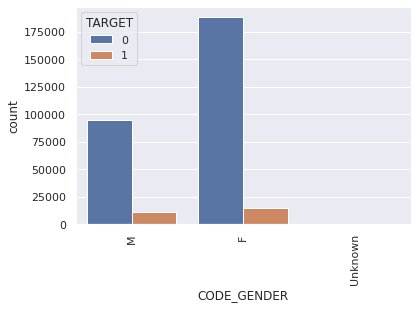

In [159]:
sns.countplot(x = "CODE_GENDER", hue = 'TARGET', data = df)
plt.xticks(rotation = 90)
plt.show()

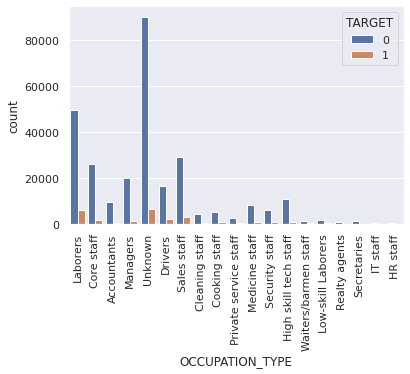

In [160]:
sns.countplot(x = "OCCUPATION_TYPE", hue = 'TARGET', data = df)
plt.xticks(rotation = 90)
plt.show()

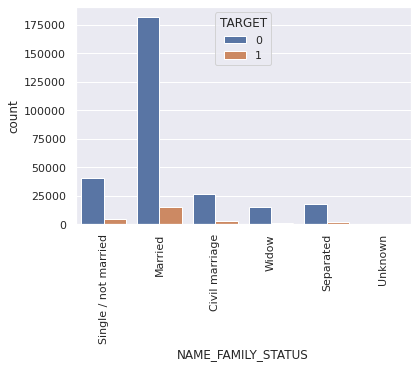

In [161]:
sns.countplot(x = "NAME_FAMILY_STATUS", hue = 'TARGET', data = df)
plt.xticks(rotation = 90)
plt.show()

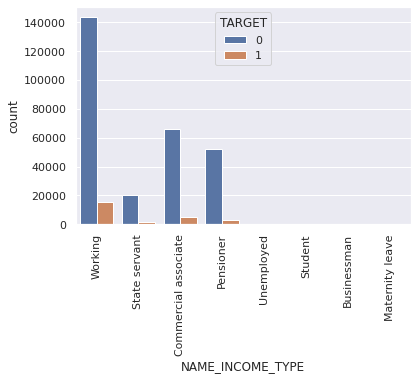

In [162]:
sns.countplot(x = "NAME_INCOME_TYPE", hue = 'TARGET', data = df)
plt.xticks(rotation = 90)
plt.show()

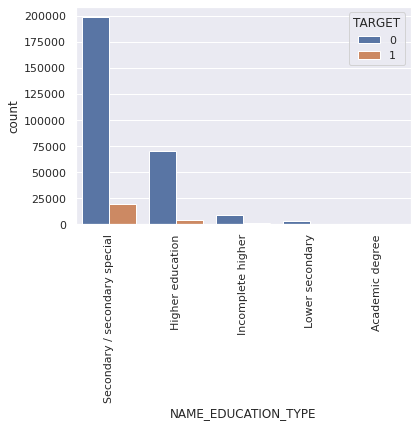

In [163]:
sns.countplot(x = "NAME_EDUCATION_TYPE", hue = 'TARGET', data = df)
plt.xticks(rotation = 90)
plt.show()

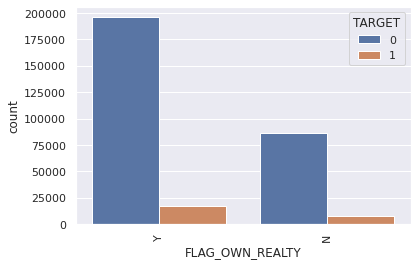

In [164]:

sns.countplot(x = "FLAG_OWN_REALTY", hue = 'TARGET', data = df)
plt.xticks(rotation = 90)
plt.show()

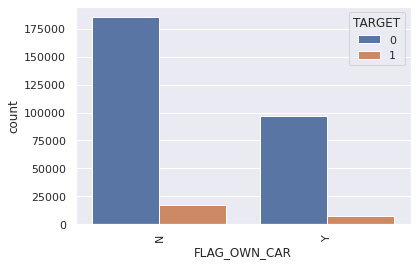

In [167]:
sns.countplot(x = "FLAG_OWN_CAR", hue = 'TARGET', data = df)
plt.xticks(rotation = 90)
plt.show()

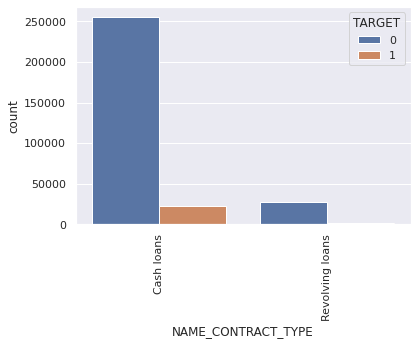

In [168]:
sns.countplot(x = "NAME_CONTRACT_TYPE", hue = 'TARGET', data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference :
1. 'ORGANIZATION_TYPE',
2. 'OCCUPATION_TYPE' - Sales staff face difficulties than Core staff to pay in time. Laborers are able to pay loans in time, may be for lower loan amounts.   
3. 'NAME_HOUSING_TYPE'
4. 'CODE_GENDER' -Female customers pay loan amount on time. This may be since banks target more female customers for lending loan.
5. 'NAME_FAMILY_STATUS' -Widowers/Separated category don't have difficulty to repay loan amount in time.
6. 'NAME_INCOME_TYPE' - Working customers and pensioners tend to repay loans on time compared to businessman
7. 'WEEKDAY_APPR_PROCESS_START' - Irrelevant column
8. 'NAME_EDUCATION_TYPE' - Customers with higher and higher/secondary education are most likely to take loans and make payments in time when compared to customers with academic degree.
9. 'NAME_TYPE_SUITE' - Irrelevant column
10. 'FLAG_OWN_REALTY' - Customers owning House/flat are most likely to make payments on time compared to those who dont a house.
11. 'FLAG_OWN_CAR' - People not owning cars repay in time, so can be targetted.
12. 'NAME_CONTRACT_TYPE'
 


In [169]:
# Numerical Non-conti columns:

# num_col = df.describe().columns
# num_col

num_col = df.select_dtypes(include=['int64','float64']).columns
num_col = list(num_col)

c_cols=[]
for col in num_col:
    vals = len(df[col].value_counts())
    if(vals > 2):
        c_cols.append([col,vals ])
c_cols = pd.DataFrame(c_cols)

c_cols=list(c_cols[0])
len(c_cols)
nc_cols=list(set(num_col)-set(c_cols))
len(nc_cols)


7

In [170]:
nc_cols

['REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'TARGET',
 'LIVE_CITY_NOT_WORK_CITY',
 'REG_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_LIVE_REGION',
 'LIVE_REGION_NOT_WORK_REGION']

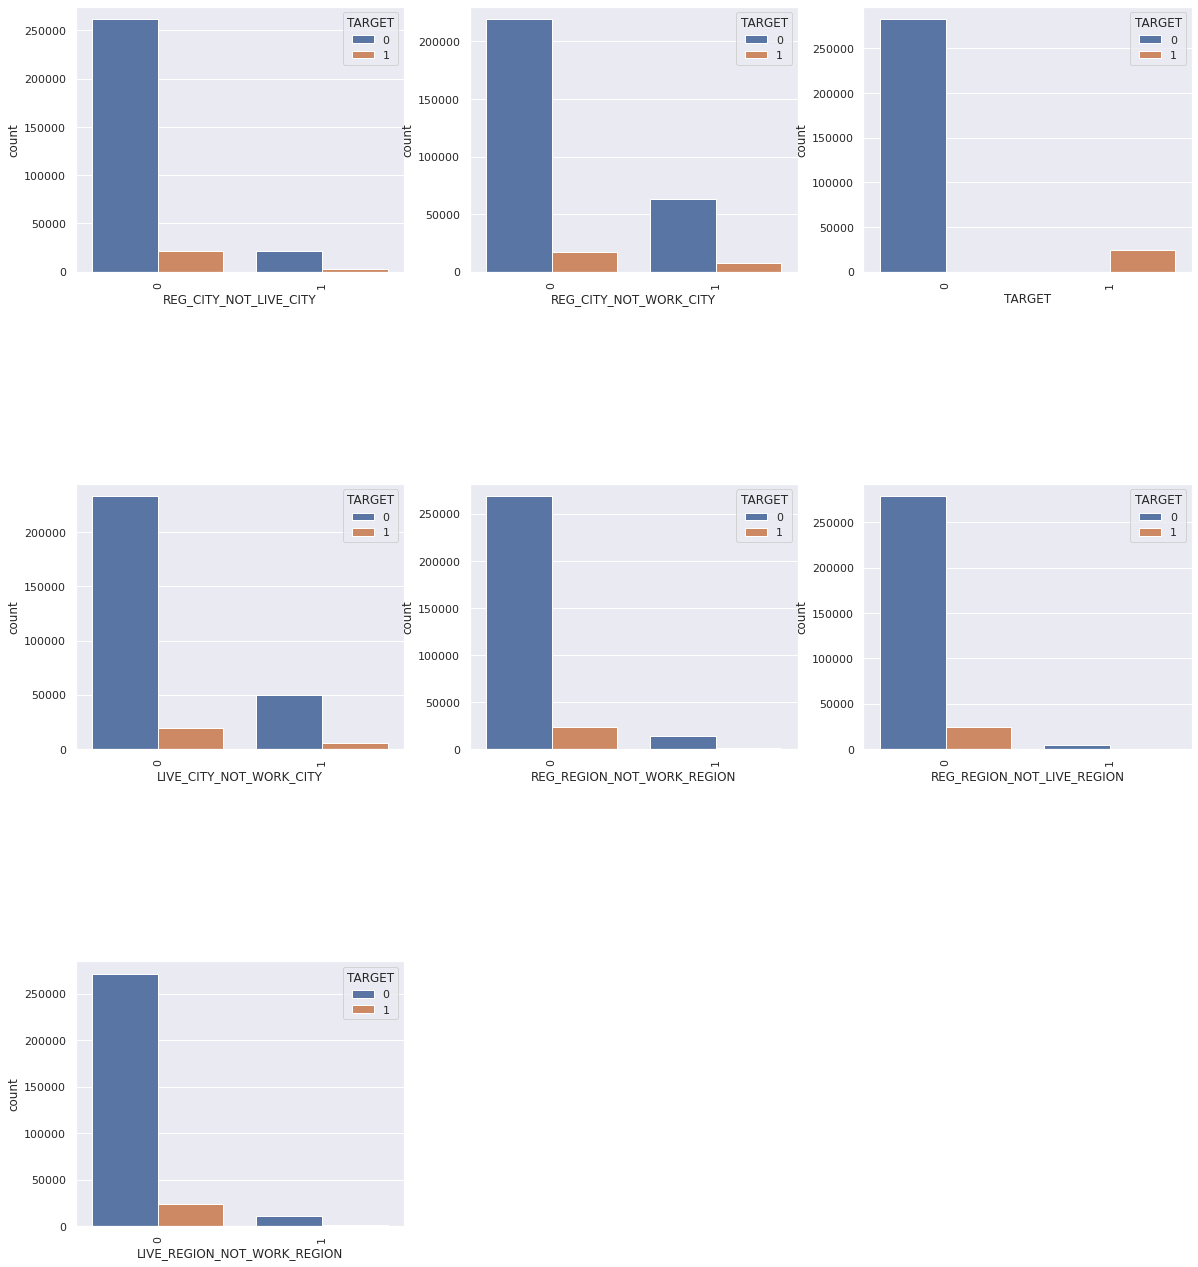

In [171]:
plt.figure(figsize = (20, 40))

plt.subplots_adjust(hspace=0.8)
for i in enumerate(nc_cols):
    plt.subplot(5, 3, i[0]+1)
    sns.countplot(x = i[1], hue = 'TARGET', data = df)
    plt.xticks(rotation = 90)
    

#### Inference 
1. 'REG_REGION_NOT_LIVE_REGION',
2. 'LIVE_CITY_NOT_WORK_CITY',
3. 'TARGET',
4. 'REG_REGION_NOT_WORK_REGION',
5. 'LIVE_REGION_NOT_WORK_REGION',
6. 'REG_CITY_NOT_WORK_CITY',
7. 'REG_CITY_NOT_LIVE_CITY'

In [172]:
def plotting_continuous_cols(train, train0, train1, column,cnum):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(8,10))
    
    plt.subplot(3,3,cnum)
   
    plt.title('Plotting data for the column: '+ column)
    sns.distplot(train_0[col], hist = False,label= "repayers")# Target = 0
    sns.distplot(train_1[col], hist = False, label="defaulters")# Taget = 1
    
    plt.xticks(rotation=90)

    fig.tight_layout() # Or equivalently,


In [ ]:
cnum = 1
for col in nc_cols:
    plotting_continuous_cols(df, train_0,train_1, col,cnum)
    
    

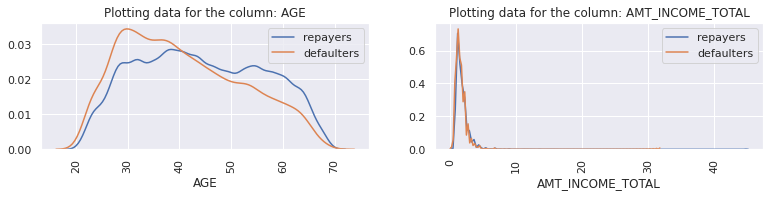

In [173]:
plt.figure(figsize = (20, 40))
c_cols_part = ["AGE","AMT_INCOME_TOTAL"]
plt.subplots_adjust(hspace=0.8)
for i in enumerate(c_cols_part):
    plt.subplot(10, 3, i[0]+1)
    col = i[1]
    plt.title('Plotting data for the column: '+ col)
    sns.distplot(train_0[col], hist = False,label= "repayers")# Target = 0
    sns.distplot(train_1[col], hist = False, label="defaulters")# Taget = 1
    plt.xticks(rotation=90)
    #print(i,i[0])
    

#### Inference
1. Customers within the Age Group 20-40 shows higher number of Defaulters.
It may be because that age group has Single/Unmarried customers who 
does not have any responsibilites and have lower salaries.
Age is inversely proportional to Defaulters Count, as age increases defaulters count start reducing.
2. Income Amount is between the range 0-10 Lacs and the defaulters count is high for people having income 0-5 Lacs. As income increases Defaulter rate seems to reduce.
3. Bank can target customers with age between 40 - 60 years
4. It is clear that bank should target customers with higher income group as they do not face difficulties while repaying loans.

# Bivariate Analysis

### Numerical vs Numerical Bivariate Analysis

1. compare mean/median of the 2 cols - bar/boxplots plots
2. compare relation between the 2 cols - scatter plot

In [ ]:
# df['AMT_CREDIT_LAC']=df['AMT_CREDIT']/100000
# df['AMT_ANNUITY_LAC']=df['AMT_ANNUITY']/100000
# df['AMT_GOODS_PRICE_LAC']=df['AMT_GOODS_PRICE']/100000

In [174]:
df['AMT_INCOME_TOTAL'].value_counts()

1.350000     35750
1.125000     31019
1.575000     26556
1.800000     24719
0.900000     22483
2.250000     20698
2.025000     16341
0.675000     11147
2.700000     10827
0.810000      6001
3.150000      5862
2.475000      5344
1.260000      4668
3.600000      4115
1.215000      3848
0.990000      3633
2.925000      3418
1.035000      3330
0.765000      3146
1.440000      3123
1.710000      2647
4.500000      2435
1.170000      2390
0.540000      2319
0.720000      2187
1.665000      2053
0.450000      2043
1.080000      1946
3.375000      1790
0.945000      1747
1.620000      1702
1.890000      1691
4.050000      1660
0.855000      1514
1.485000      1486
2.160000      1406
1.305000      1256
0.585000      1182
0.630000      1145
1.935000      1061
1.530000      1012
2.115000       985
3.825000       966
1.395000       834
1.755000       800
5.400000       758
0.495000       738
2.340000       666
6.750000       659
2.070000       637
2.520000       581
1.845000       534
2.610000    

In [175]:
#Scatter plot for numeric columns

def plotting_income_credit(train,train0,train1):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(8,10))
    
    ax1 = plt.subplot(221)
    sns.scatterplot(train_0.AMT_INCOME_TOTAL,train_0.AMT_CREDIT, ax=ax1)
    plt.title('Target 0 : AMT_INCOME_TOTAL  vs  AMT_CREDIT ')
    
    ax2 = plt.subplot(222)
    sns.scatterplot(train_1.AMT_INCOME_TOTAL,train_1.AMT_CREDIT,ax=ax2)
    plt.xticks(rotation=90)
    plt.xticks(rotation=90)
    plt.title('TARGET 1 : AMT_INCOME_TOTAL  vs  AMT_CREDIT ')

    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
      


In [ ]:
#df.groupby(["AMT_INCOME_TOTAL","AMT_CREDIT"])["TARGET"].mean()

In [176]:
#Scatter plot for numeric columns

def plotting_scatter_train(train,train0,train1, col1, col2):
    
    train = train
    train_0 = train0
    train_1 = train1
    col1 = col1
    col2 = col2
    
    fig = plt.figure(figsize=(8,10))
    
    ax1 = plt.subplot(221)
    sns.scatterplot(train_0[col1],train_0[col2], ax=ax1)
    plt.title('Target 0 : '+col1+' vs  '+col2)
    
    ax2 = plt.subplot(222)
    sns.scatterplot(train_1[col1],train_1[col2],ax=ax2)
    plt.xticks(rotation=90)
    plt.xticks(rotation=90)
    plt.title('TARGET 1 : '+col1+' vs  '+col2)

    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
      


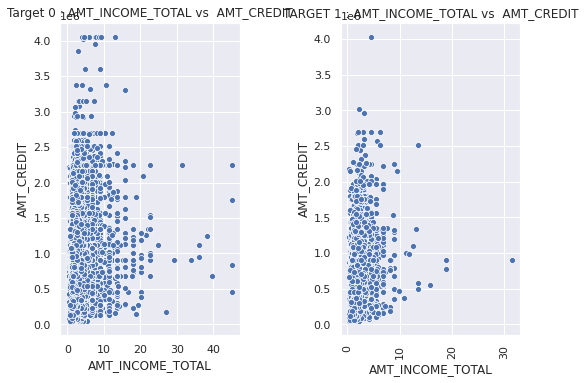

In [177]:
plotting_scatter_train(df,train_0,train_1, "AMT_INCOME_TOTAL",  "AMT_CREDIT")


### Inference : 
1.Those who have repaid the Loan amunt on time have higher Credit Value()than defaulters. 


In [ ]:
# #2. Amount Income group is larger for those who have paid in time
# than defaulters. Individuals who have Income betwen 10 - 20 Lacs have been regularly repaying the Loans.
# #3. There is low risk in giving loans to the individuals having income above 10Lacs

In [ ]:
 #Goods price vs Credit  

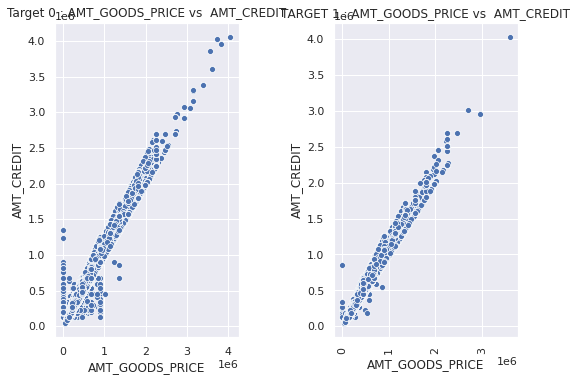

In [178]:
plotting_scatter_train(df,train_0,train_1,"AMT_GOODS_PRICE","AMT_CREDIT" )


#### Inference
People who have made payments on time have higher Credit Amounts 

### Categorical vs Numerical Bivariate Analysis

In [182]:
def plotting_count_train(train,train0,train1, col1, col2):
    
    train = train
    train_0 = train0
    train_1 = train1
    col1 = col1
    col2 = col2
    
    fig = plt.figure(figsize=(10,8))
    
    ax1 = plt.subplot(221)
    sns.countplot(data=train_0,x=col1, hue=col2, ax=ax1)
    plt.title('Target 0 : '+col1+' vs  '+col2)
    
    ax2 = plt.subplot(222)
    sns.countplot(data=train_1,x=col1,hue=col2,ax=ax2)
    plt.xticks(rotation=90)
    plt.title('TARGET 1 : '+col1+' vs  '+col2)

    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
      

In [183]:
bins = [0,2,4,100000]
slot = ['Low','Medium','High']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

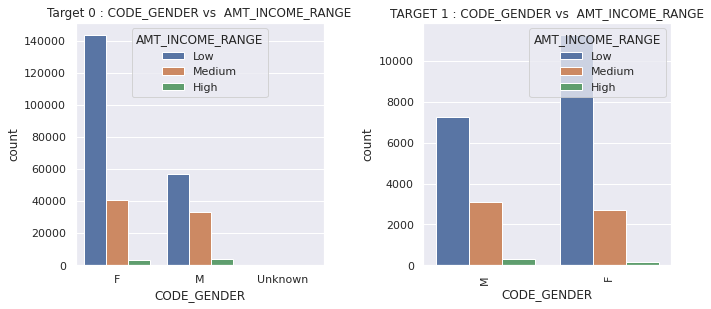

In [184]:
plotting_count_train(df,df[df["TARGET"]==0],df[df["TARGET"]==1],"CODE_GENDER","AMT_INCOME_RANGE" )


#### Inference
1. Females with Lower income group are able to repay the loan in time

## Columns those can be removed : 
AMT_REQ_CREDIT_BUREAU_DAY -  AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_WEEK,  
TOTALAREA_MODE - FLOORSMAX_% 
REG_CITY_NOT_WORK_CITY - REG_REGION_NOT_WORK_REGION , LIVE_REGION_NOT_WORK_REGION ,
REG_REGION_NOT_WORK_REGION 

YEARS_BEGINEXPLUATATION_MEDI - YEARS_BEGINEXPLUATATION_AVG, YEARS_BEGINEXPLUATATION_MODE


In [ ]:
#df5 = df.copy()

In [185]:
df.shape

(307506, 48)

In [186]:
redundant_cols_list = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_WEEK','FLOORSMAX_MODE','FLOORSMAX_AVG','FLOORSMAX_MEDI','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_AVG','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','REGION_RATING_CLIENT']
red_list = set(df.columns)- set(redundant_cols_list)
red_list = list(red_list)
df = df[red_list]
df.shape

(307506, 36)

In [187]:
df.columns

Index(['ORGANIZATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'NAME_TYPE_SUITE', 'REG_CITY_NOT_LIVE_CITY',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'CNT_CHILDREN',
       'YEARS_BEGINEXPLUATATION_MEDI', 'SK_ID_CURR', 'FLAG_OWN_REALTY',
       'AMT_CREDIT', 'REG_REGION_NOT_LIVE_REGION', 'FLAG_OWN_CAR',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'YEARS_EMPLOYED', 'NAME_FAMILY_STATUS',
       'REGION_RATING_CLIENT_W_CITY', 'NAME_CONTRACT_TYPE',
       'NAME_EDUCATION_TYPE', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'CODE_GENDER', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'LIVE_CITY_NOT_WORK_CITY', 'TARGET', 'NAME_HOUSING_TYPE', 'AMT_ANNUITY',
       'NAME_INCOME_TYPE', 'EXT_SOURCE_3', 'OCCUPATION_TYPE',
       'AMT_INCOME_TOTAL', 'AGE', 'TOTALAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'AMT_INCOME_RANGE'],
      dtype='object')

# Multivariate Analysis



In [ ]:
#1.AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE

In [ ]:
#2.REGION_RATING_CLIENT_W_CITY, REGION_RATING_CLIENT, REGION_POPULATION_RELATIVE

In [ ]:
#AMT_INCOME_TOTAL, AMT_CREDIT, CNT_FAM_

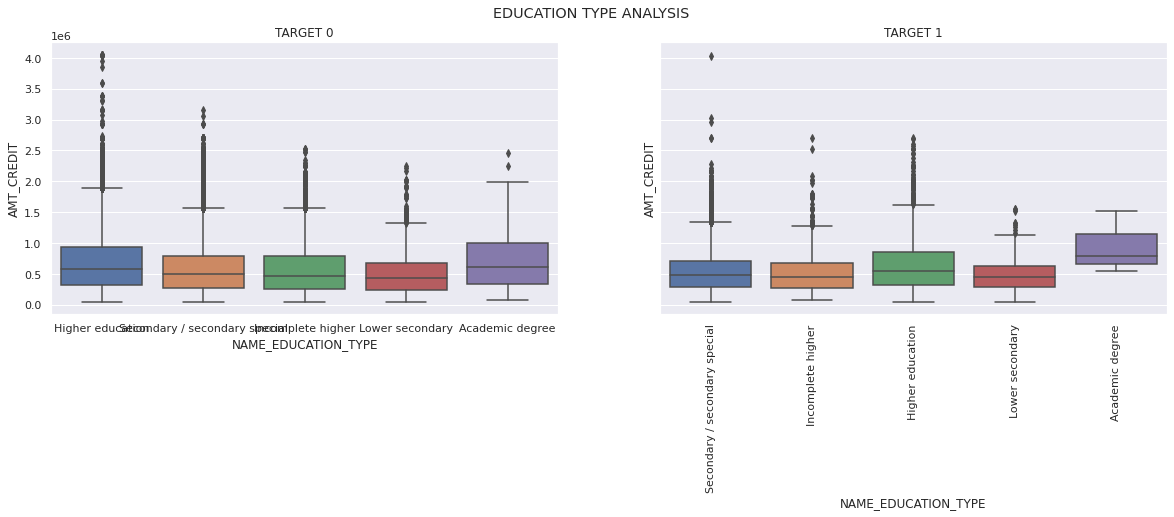

In [188]:
# #Box plot - 1: 
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('EDUCATION TYPE ANALYSIS')
 
sns.boxplot(data =train_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',orient='v', ax=axes[0])
plt.xticks(rotation=90)
sns.boxplot(data =train_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',orient='v', ax=axes[1])
axes[0].set_title("TARGET 0")
plt.xticks(rotation=90);
axes[1].set_title("TARGET 1")
plt.xticks(rotation=90);

plt.show()


#### Inference 
1. Defaulters having Academic Degree Education take higher Credit
Loan Amounts.
Academic Degree Individuals can be considered for lower amounts of credit

# Find the top 10 correlations in current application dataset

In [189]:
# Find the top 10 corelations
correlation_1 = df.corr().abs()
correlation_1 = correlation_1.unstack().sort_values(kind='quicksort')
correlation_1 = correlation_1.dropna()
correlation_1 = correlation_1[correlation_1 != 1.0 ]
correlation_1.drop_duplicates(inplace = True)
correlation_1 = correlation_1.sort_values(ascending=False)
print(correlation_1.head(10))

AMT_CREDIT                  AMT_GOODS_PRICE                0.986687
CNT_FAM_MEMBERS             CNT_CHILDREN                   0.874065
LIVE_CITY_NOT_WORK_CITY     REG_CITY_NOT_WORK_CITY         0.825572
AMT_ANNUITY                 AMT_GOODS_PRICE                0.775111
AMT_CREDIT                  AMT_ANNUITY                    0.770136
REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT_W_CITY    0.531538
AMT_ANNUITY                 AMT_INCOME_TOTAL               0.451250
REG_CITY_NOT_LIVE_CITY      REG_CITY_NOT_WORK_CITY         0.440412
AMT_REQ_CREDIT_BUREAU_DAY   EXT_SOURCE_3                   0.413419
AMT_INCOME_TOTAL            AMT_GOODS_PRICE                0.380728
dtype: float64


In [190]:
df.columns

Index(['ORGANIZATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'NAME_TYPE_SUITE', 'REG_CITY_NOT_LIVE_CITY',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'CNT_CHILDREN',
       'YEARS_BEGINEXPLUATATION_MEDI', 'SK_ID_CURR', 'FLAG_OWN_REALTY',
       'AMT_CREDIT', 'REG_REGION_NOT_LIVE_REGION', 'FLAG_OWN_CAR',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'YEARS_EMPLOYED', 'NAME_FAMILY_STATUS',
       'REGION_RATING_CLIENT_W_CITY', 'NAME_CONTRACT_TYPE',
       'NAME_EDUCATION_TYPE', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'CODE_GENDER', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'LIVE_CITY_NOT_WORK_CITY', 'TARGET', 'NAME_HOUSING_TYPE', 'AMT_ANNUITY',
       'NAME_INCOME_TYPE', 'EXT_SOURCE_3', 'OCCUPATION_TYPE',
       'AMT_INCOME_TOTAL', 'AGE', 'TOTALAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'AMT_INCOME_RANGE'],
      dtype='object')

# Read and cleanup previous applications data


In [ ]:
# Remove columns having high percent of missing values and are not relevant for our analysis

In [191]:

#Reading the data from file previous_application 
df1=pd.read_csv("previous_application.csv")
df1.head()



SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [192]:
df1.shape

(1670214, 37)

In [193]:
df1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [194]:
#Removing columns which are having missing values more than 50%
#top 60 cols sorted by highest no of missing values 
df1.isna().sum().sort_values(ascending=False).head(60)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
RATE_DOWN_PAYMENT               895844
AMT_DOWN_PAYMENT                895844
NAME_TYPE_SUITE                 820405
DAYS_TERMINATION                673065
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_FIRST_DRAWING              673065
DAYS_FIRST_DUE                  673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_LAST_DUE                   673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
AMT_APPLICATION                      0
NAME_PAYMENT_TYPE                    0
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS     

In [195]:
# divide no of rows/2
y = len(df1)/2
y

835107.0

In [196]:
# If a column contains more than 50% of its values not there,
# delete that column
#list all cols having less than 50% missing values.
df1.columns[df1.isnull().sum() < x ]

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION',
       'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [197]:
# no of cols having less than 50% missing values.
len(df1.columns[df1.isnull().sum() < x ])

23

In [198]:
list_final_cols = (df1.columns[df1.isnull().sum() < x ]).to_list()
list_final_cols.append('RATE_INTEREST_PRIMARY')
list_final_cols.append('AMT_DOWN_PAYMENT')
len(list_final_cols)

25

In [199]:
#remove cols with >= 50% missing values and store back in the dataframe

df1 = df1[list_final_cols]
df1.shape

(1670214, 25)

#### Inference 
There are (1670214 rows and 25 cols in merged dataset.

In [200]:
#check first 5 rows in the new dataframe
df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   SATURDAY                       15   
1                   THURSDAY                       11   
2                    TUESDAY                       11   
3                     MONDAY                        7   
4                   THURSDAY                        9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
0                           Y                       1                    XAP   
1                           Y                       1                    XNA   
2                           Y                       1                    XNA   
3                           Y                       1                    XNA   
4                           Y                       1                Repairs   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved            -73  Cash through the bank   
1             Approved           -164                    XNA   
2             Approved           -301  Cash through the bank   
3             Approved           -512  Cash through the bank   
4              Refused           -781  Cash through the bank   

  CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0                XAP         Repeater              Mobile            POS   
1                XAP         Repeater                 XNA           Cash   
2                XAP         Repeater                 XNA           Cash   
3                XAP         Repeater                 XNA           Cash   
4                 HC         Repeater                 XNA           Cash   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0               XNA             Country-wide                35   
1            x-sell           Contact center                -1   
2            x-sell  Credit and cash offices                -1   
3            x-sell  Credit and cash offices                -1   
4           walk-in  Credit and cash offices                -1   

  NAME_SELLER_INDUSTRY NAME_YIELD_GROUP       PRODUCT_COMBINATION  \
0         Connectivity           middle  POS mobile with interest   
1                  XNA       low_action          Cash X-Sell: low   
2                  XNA             high         Cash X-Sell: high   
3                  XNA           middle       Cash X-Sell: middle   
4                  XNA             high         Cash Street: high   

   RATE_INTEREST_PRIMARY  AMT_DOWN_PAYMENT  
0               0.182832               0.0  
1                    NaN               NaN  
2                    NaN               NaN  
3                    NaN               NaN  
4                    NaN               NaN

In [201]:
#start inspecting - remaining cols for missing values
#list all cols having high no of missing values 
df1.isna().sum().sort_values(ascending=False).head(60)

RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_CONTRACT_STATUS                 0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_APPLICATION                      0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
NAME_CASH_LOAN_PURPOSE               0
NAME_PAYMENT_TYPE                    0
DAYS_DECISION                        0
CODE_REJECT_REASON                   0
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE                         0
SELLERPLACE_AREA                     0
NAME_SELLER_INDUSTRY                 0
NAME_YIELD_GROUP                     0
SK_ID_PREV                           0
dtype: int64

In [202]:
# Numerical columns
df1.describe().columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_APPLICATION', 'AMT_CREDIT',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION',
       'SELLERPLACE_AREA', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT'],
      dtype='object')

In [203]:
len(df1.columns)

25

In [ ]:
# Remove columns which we had also removed from current application dataset

In [204]:
del_cols = ['AMT_REQ_CREDIT_BUREAU_WEEK','FLOORSMAX_AVG','EXT_SOURCE_2',
            'FLAG_OWN_CAR','FLOORSMAX_MEDI','REG_CITY_NOT_LIVE_CITY',
            'AMT_REQ_CREDIT_BUREAU_HOUR','YEARS_BEGINEXPLUATATION_AVG',
           'WEEKDAY_APPR_PROCESS_STARTX','HOUR_APPR_PROCESS_START'] 
#new_df = new_df1.copy()

In [205]:
df1.shape

(1670214, 25)

In [206]:
del_list = set(df1.columns)- set(del_cols)
del_list = list(del_list)
df1 = df1[del_list]
df1.shape

(1670214, 24)

In [207]:
df1.columns

Index(['NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'SK_ID_CURR', 'AMT_CREDIT',
       'CODE_REJECT_REASON', 'NAME_GOODS_CATEGORY', 'NAME_CONTRACT_TYPE',
       'SELLERPLACE_AREA', 'CHANNEL_TYPE', 'NAME_CASH_LOAN_PURPOSE',
       'SK_ID_PREV', 'FLAG_LAST_APPL_PER_CONTRACT', 'RATE_INTEREST_PRIMARY',
       'AMT_DOWN_PAYMENT', 'NAME_PRODUCT_TYPE', 'NAME_PAYMENT_TYPE',
       'AMT_APPLICATION', 'NAME_PORTFOLIO', 'DAYS_DECISION',
       'NAME_YIELD_GROUP', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_SELLER_INDUSTRY',
       'PRODUCT_COMBINATION'],
      dtype='object')

#### Inference 
There are 1670214 rows and , 24 cols in merged dataset

# Merge the current and previous application data

In [208]:
#Merge the previous application with the current application data file
new_df= pd.merge(df, df1, how='left',on='SK_ID_CURR',suffixes='_X')
new_df.head()

ORGANIZATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START_  \
0  Business Entity Type 3                1                   WEDNESDAY   
1                  School                2                      MONDAY   
2                  School                2                      MONDAY   
3                  School                2                      MONDAY   
4              Government                1                      MONDAY   

  NAME_TYPE_SUITE  REG_CITY_NOT_LIVE_CITY  AMT_REQ_CREDIT_BUREAU_DAY  \
0   Unaccompanied                       0                        0.0   
1          Family                       0                        0.0   
2          Family                       0                        0.0   
3          Family                       0                        0.0   
4   Unaccompanied                       0                        0.0   

   CNT_CHILDREN  YEARS_BEGINEXPLUATATION_MEDI  SK_ID_CURR FLAG_OWN_REALTY  \
0             0                        0.9722      100002               Y   
1             0                        0.9851      100003               N   
2             0                        0.9851      100003               N   
3             0                        0.9851      100003               N   
4             0                        0.9816      100004               Y   

   AMT_CREDIT_  REG_REGION_NOT_LIVE_REGION FLAG_OWN_CAR  \
0     406597.5                           0            N   
1    1293502.5                           0            N   
2    1293502.5                           0            N   
3    1293502.5                           0            N   
4     135000.0                           0            Y   

   DEF_60_CNT_SOCIAL_CIRCLE  YEARS_EMPLOYED    NAME_FAMILY_STATUS  \
0                       2.0               2  Single / not married   
1                       0.0               3               Married   
2                       0.0               3               Married   
3                       0.0               3               Married   
4                       0.0               1  Single / not married   

   REGION_RATING_CLIENT_W_CITY NAME_CONTRACT_TYPE_  \
0                            2          Cash loans   
1                            1          Cash loans   
2                            1          Cash loans   
3                            1          Cash loans   
4                            2     Revolving loans   

             NAME_EDUCATION_TYPE  REG_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
0  Secondary / secondary special                       0      0.262949   
1               Higher education                       0      0.622246   
2               Higher education                       0      0.622246   
3               Higher education                       0      0.622246   
4  Secondary / secondary special                       0      0.555912   

  CODE_GENDER  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
0           M         351000.0                    0.018801   
1           F        1129500.0                    0.003541   
2           F        1129500.0                    0.003541   
3           F        1129500.0                    0.003541   
4           M         135000.0                    0.010032   

   LIVE_CITY_NOT_WORK_CITY  TARGET  NAME_HOUSING_TYPE  AMT_ANNUITY  \
0                        0       1  House / apartment      24700.5   
1                        0       0  House / apartment      35698.5   
2                        0       0  House / apartment      35698.5   
3                        0       0  House / apartment      35698.5   
4                        0       0  House / apartment       6750.0   

  NAME_INCOME_TYPE  EXT_SOURCE_3 OCCUPATION_TYPE  AMT_INCOME_TOTAL  AGE  \
0          Working      0.139376        Laborers             2.025   26   
1    State servant      0.801758      Core staff             2.700   46   
2    State servant      0.801758      Core staff             2.700   46   
3    State servant      0.801758 

In [209]:
new_df.shape

(1430136, 59)

In [210]:
new_df.columns

Index(['ORGANIZATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START_',
       'NAME_TYPE_SUITE', 'REG_CITY_NOT_LIVE_CITY',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'CNT_CHILDREN',
       'YEARS_BEGINEXPLUATATION_MEDI', 'SK_ID_CURR', 'FLAG_OWN_REALTY',
       'AMT_CREDIT_', 'REG_REGION_NOT_LIVE_REGION', 'FLAG_OWN_CAR',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'YEARS_EMPLOYED', 'NAME_FAMILY_STATUS',
       'REGION_RATING_CLIENT_W_CITY', 'NAME_CONTRACT_TYPE_',
       'NAME_EDUCATION_TYPE', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'CODE_GENDER', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'LIVE_CITY_NOT_WORK_CITY', 'TARGET', 'NAME_HOUSING_TYPE', 'AMT_ANNUITY',
       'NAME_INCOME_TYPE', 'EXT_SOURCE_3', 'OCCUPATION_TYPE',
       'AMT_INCOME_TOTAL', 'AGE', 'TOTALAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'AMT_INCOME_RANGE', 'NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE',
       'WEEKDAY_APPR_PROCESS_STARTX', 'AMT_CREDITX', 'CODE_REJECT_REASON',
       'NAME_GOODS_CATEGORY', '

# Analysis of Previous Historical Data of Applicant

In [ ]:
# Inspect the Purpose of the cash loan 

In [211]:
# Dont do deep copy for now
# df_prev_applications=df1.copy()
df_prev_applications=df1
df_prev_applications['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [212]:
df_prev_applications = df_prev_applications[df_prev_applications['NAME_CASH_LOAN_PURPOSE'] != "XAP"]
df_prev_applications = df_prev_applications[df_prev_applications['NAME_CASH_LOAN_PURPOSE'] != "XNA"]

#### Inference
There is very high count of purpose as XAP and XNA, which we do not know meaning, so we cannot remove.

In [ ]:
# Inspect NAME_CASH_LOAN_PURPOSE in past data

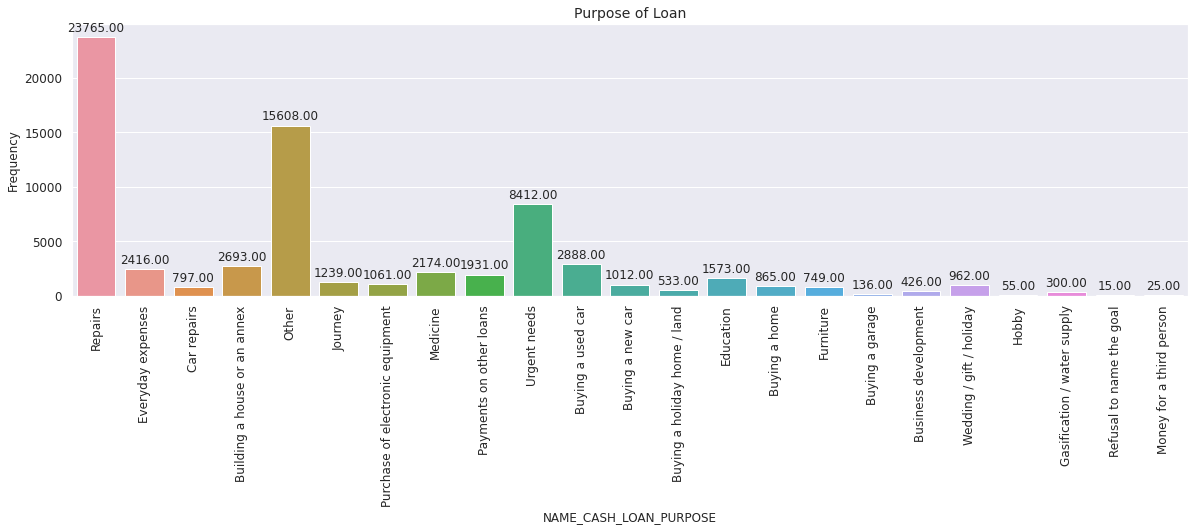

In [213]:

fig, ax = plt.subplots(1,1, figsize=(20,5))
sns.set(font_scale=1.5)
ax = sns.countplot(x="NAME_CASH_LOAN_PURPOSE",data=df_prev_applications)


#Title, Labels : 
ax.set_title('Purpose of Loan', fontsize=14)
ax.set(xlabel='NAME_CASH_LOAN_PURPOSE', ylabel='Frequency')
for item in ([ ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
    
for p in ax.patches:
#     print(p.get_height(),":",p.get_x(),":",p.get_width())

    bar_width=  p.get_width()# which is 0.8
    pt_x = p.get_x() + bar_width / 2.0
    pt_y = p.get_height()
    txt_label = format(pt_y, '.2f')
    
    ax.annotate(txt_label, 
                   xy=(pt_x , pt_y), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 9), 
                    size=12,
                   textcoords = 'offset points')
    plt.xticks(rotation=90)
plt.show(ax)

In [214]:
l = df_prev_applications.shape[0]
(df_prev_applications['NAME_CASH_LOAN_PURPOSE'].value_counts().sort_values(ascending=False)/l)*100

Repairs                             34.127953
Other                               22.414016
Urgent needs                        12.080132
Buying a used car                    4.147340
Building a house or an annex         3.867308
Everyday expenses                    3.469520
Medicine                             3.121993
Payments on other loans              2.773031
Education                            2.258922
Journey                              1.779278
Purchase of electronic equipment     1.523659
Buying a new car                     1.453292
Wedding / gift / holiday             1.381489
Buying a home                        1.242191
Car repairs                          1.144539
Furniture                            1.075609
Buying a holiday home / land         0.765420
Business development                 0.611761
Gasification / water supply          0.430818
Buying a garage                      0.195304
Hobby                                0.078983
Money for a third person          

#### Inference : 
Higest loan applications were for purpose:
    Repairs(34%), Other(22%), Urgent needs(12) , Buying a used car(4%), Building a house or an annex(3.86%).

In [215]:
df_temp_prev = df_prev_applications
df_temp_prev = df_temp_prev[df_temp_prev['NAME_CASH_LOAN_PURPOSE'] != "XAP"]
df_temp_prev = df_temp_prev[df_temp_prev['NAME_CASH_LOAN_PURPOSE'] != "XNA"]

In [ ]:
# Inspect AMT_APPLICATION vs NAME_CASH_LOAN_PURPOSE for NAME_CONTRACT_STATUS 

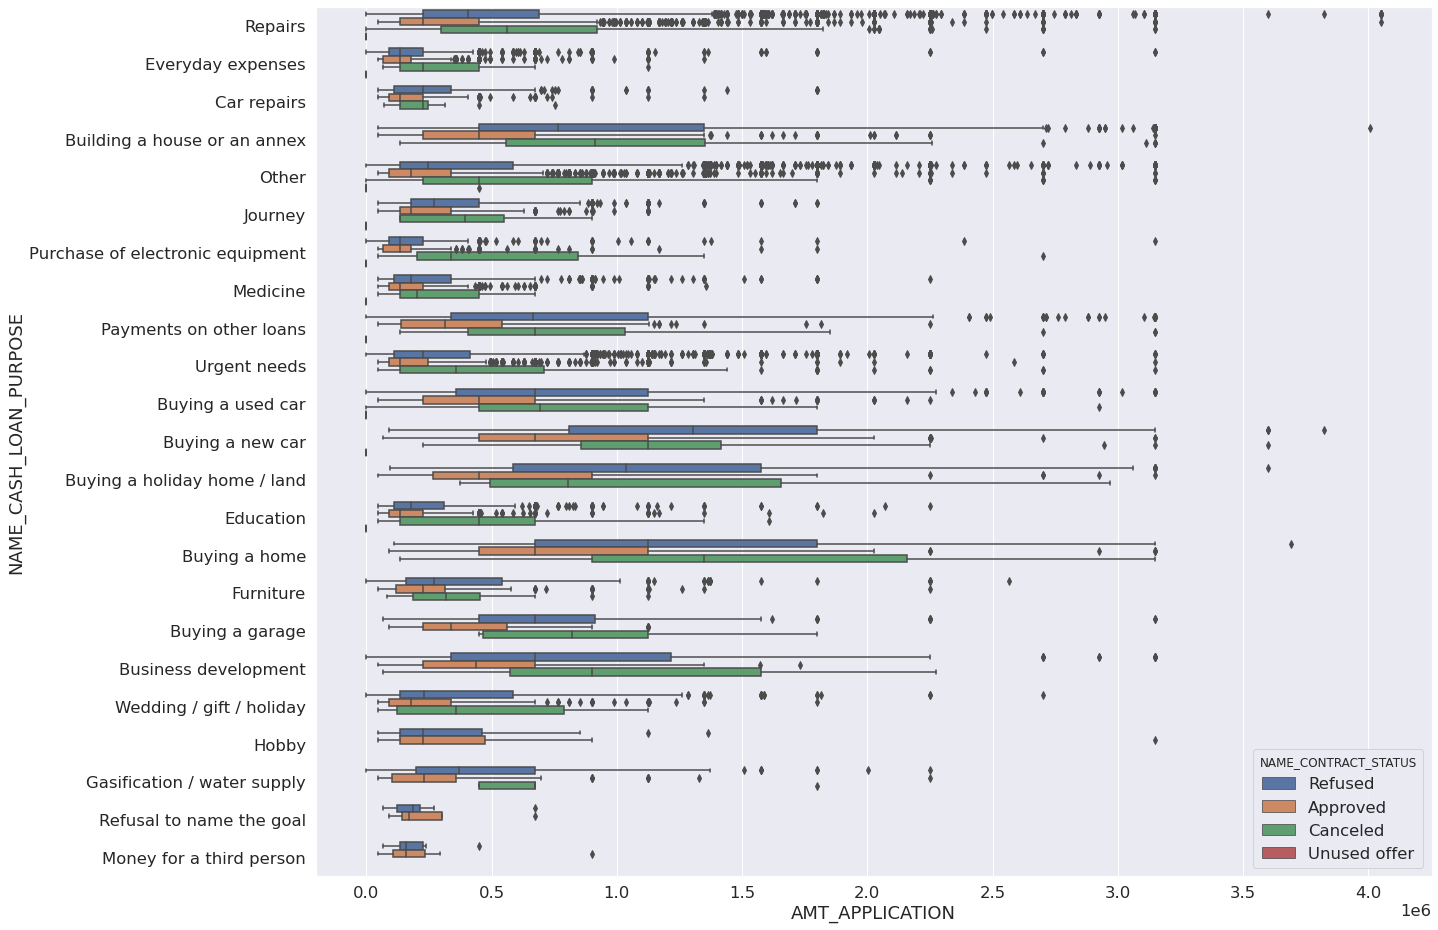

In [216]:

plt.figure(figsize=(20,16))
sns.boxplot(data =df_temp_prev, x='AMT_APPLICATION', y='NAME_CASH_LOAN_PURPOSE', hue ='NAME_CONTRACT_STATUS')

plt.show()

In [217]:
df_refused= df_prev_applications[df_prev_applications['NAME_CONTRACT_STATUS']=='Refused'] 
df_refused = df_refused[df_refused['NAME_CASH_LOAN_PURPOSE']=='Repairs']
df_refused['CODE_REJECT_REASON'].value_counts()

HC        8061
LIMIT     3018
SCO       1697
VERIF      871
SCOFR      553
XNA        220
SYSTEM       1
Name: CODE_REJECT_REASON, dtype: int64

#### Inference:
Loan Amt applied by client in past vs Loan purpose vs Contract status – For eg – Highest loan amounts applications was for Repairs and most of the Refused loans were for HC, LIMIT, SCO status in the past

In [ ]:
# Inspect AMT_CREDIT vs NAME_CASH_LOAN_PURPOSE vs NAME_CONTRACT_STATUS

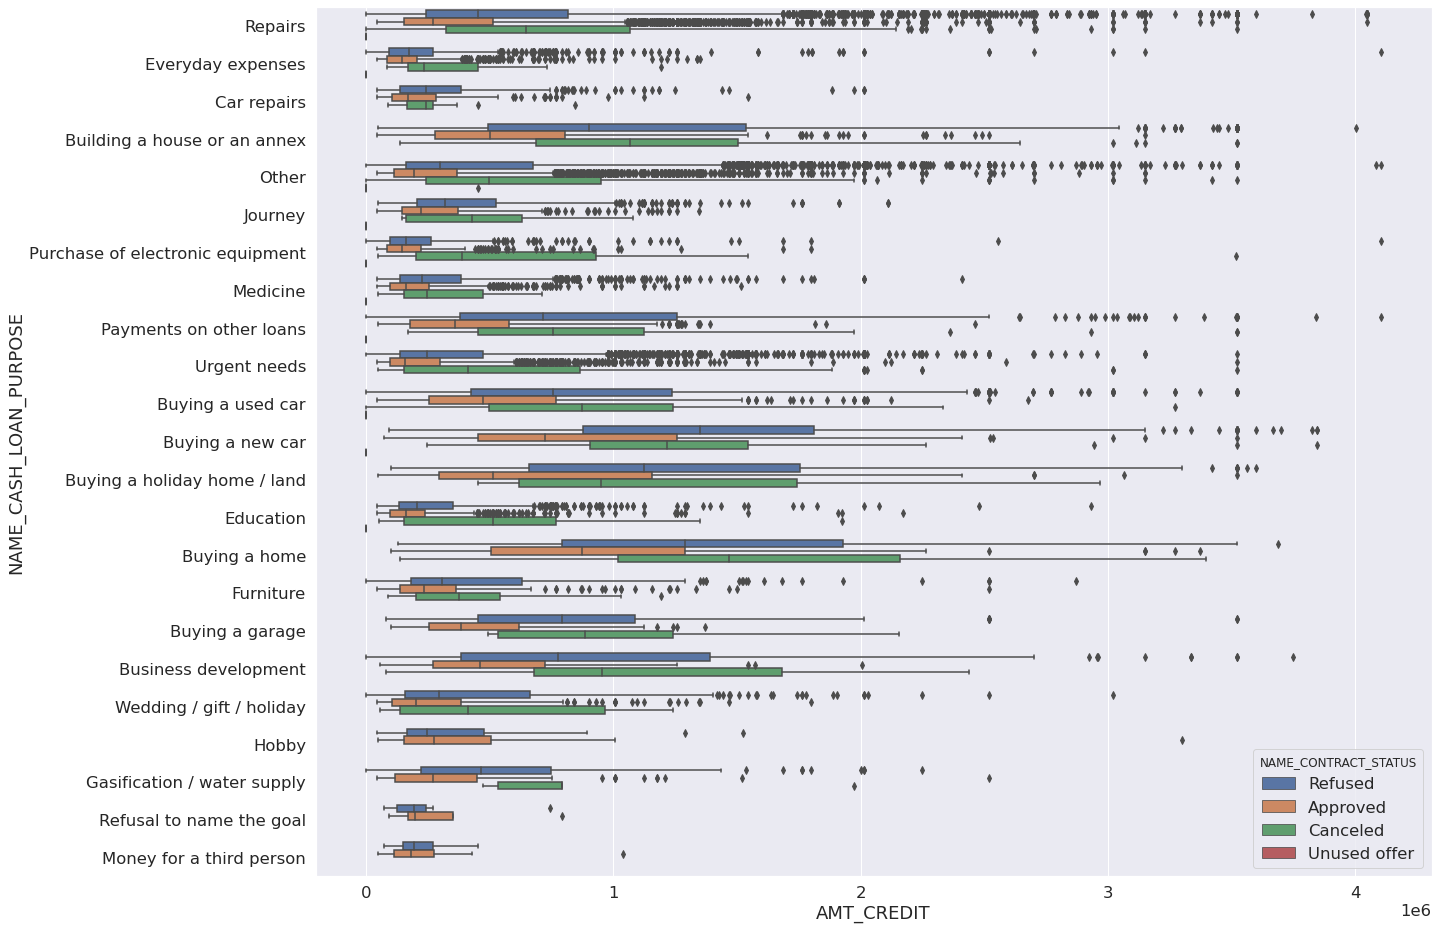

In [218]:
plt.figure(figsize=(20,16))
sns.boxplot(data =df_temp_prev, x='AMT_CREDIT', y='NAME_CASH_LOAN_PURPOSE', hue ='NAME_CONTRACT_STATUS')
plt.show()

#### Inference:
Credit Amt Vs Loan purpose Vs Contract status – High Loan amounts were approved for buying a new car, a home or for buying holiday home/annex. There was high percentage of loan cancellation for purchasing electronic equipment and Business Development purpose.

In [ ]:
# df_prev_applications['NAME_SELLER_INDUSTRY'].value_counts()

In [219]:
# Inspect no of defaulters for each loan purpose
defaulter_loans = new_df
defaulter_loans = defaulter_loans[defaulter_loans['NAME_CASH_LOAN_PURPOSE'] != "XAP"]
defaulter_loans = defaulter_loans[defaulter_loans['NAME_CASH_LOAN_PURPOSE'] != "XNA"]


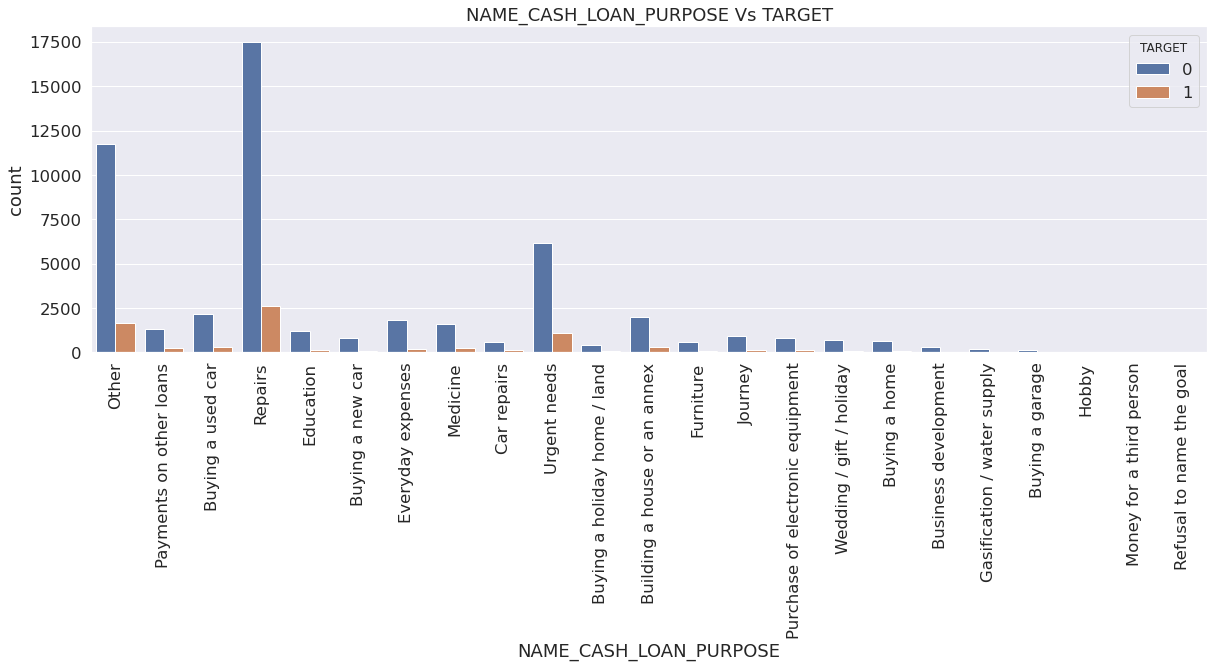

In [221]:
plt.figure(figsize=(20,6))
plt.title('NAME_CASH_LOAN_PURPOSE Vs TARGET')
ax=sns.countplot(data = defaulter_loans, x='NAME_CASH_LOAN_PURPOSE',hue = 'TARGET')
plt.xticks(rotation=90)
plt.show()

#### Inference 
Loan Purpose – There is high count of defaulters for Repairs compared to Others and Urgent needs.

In [222]:
# Inspect no of defaulters for each loan purpose
defaulter_applied = new_df
defaulter_applied = defaulter_applied[defaulter_applied['NAME_CASH_LOAN_PURPOSE'] != "XAP"]
defaulter_applied = defaulter_applied[defaulter_applied['NAME_CASH_LOAN_PURPOSE'] != "XNA"]

In [223]:
corr_appl_income = defaulter_applied['AMT_APPLICATION']. corr(defaulter_applied['AMT_INCOME_TOTAL'])
corr_appl_income < 0.5

True

#### Inference
There is very little correlation(0.31) between the amount applied and income of clients

# Analysis of merged data

In [225]:
new_df['AMT_CREDITX'].describe()

count    1.413682e+06
mean     1.963531e+05
std      3.194800e+05
min      0.000000e+00
25%      2.488050e+04
50%      8.059500e+04
75%      2.156400e+05
max      4.509688e+06
Name: AMT_CREDITX, dtype: float64

In [226]:

new_df['RATE_INTEREST_PRIMARY'].describe()

count    4790.000000
mean        0.189434
std         0.090858
min         0.034781
25%         0.160716
50%         0.189136
75%         0.193330
max         1.000000
Name: RATE_INTEREST_PRIMARY, dtype: float64

In [227]:
new_df['AMT_INCOME_TOTAL'].describe()

count    1.430136e+06
mean     1.732268e+00
std      9.467531e-01
min      2.565000e-01
25%      1.125000e+00
50%      1.575000e+00
75%      2.115000e+00
max      4.500000e+01
Name: AMT_INCOME_TOTAL, dtype: float64

In [228]:
# Create Bins for range of Loan Amount

bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
new_df['AMT_CREDIT_BINS'] = pd.cut(new_df['AMT_CREDITX'], bins, labels=slot)

# Create Bins for range of Annual Income in lacs

bins = [0, 5, 10, 20, 50, 100,1000]
slot = ['0-5', '5-10','10-20', '20-50', '50-100', '100 and above']
new_df['AMT_INCOME_TOTAL_BINS'] = pd.cut(new_df['AMT_INCOME_TOTAL'], bins, labels=slot)

# Create Bins for range of Interest rates

bins = [0, 0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0]
slot = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4','0.4-0.5','0.5-0.6','0.6-0.7','0.7-0.8','0.8-0.9','0.9-1.0', '1.0 and above']
new_df['RATE_INTEREST_PRIMARY_BINS'] = pd.cut(new_df['RATE_INTEREST_PRIMARY'], bins, labels=slot)

new_df.head()

ORGANIZATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START_  \
0  Business Entity Type 3                1                   WEDNESDAY   
1                  School                2                      MONDAY   
2                  School                2                      MONDAY   
3                  School                2                      MONDAY   
4              Government                1                      MONDAY   

  NAME_TYPE_SUITE  REG_CITY_NOT_LIVE_CITY  AMT_REQ_CREDIT_BUREAU_DAY  \
0   Unaccompanied                       0                        0.0   
1          Family                       0                        0.0   
2          Family                       0                        0.0   
3          Family                       0                        0.0   
4   Unaccompanied                       0                        0.0   

   CNT_CHILDREN  YEARS_BEGINEXPLUATATION_MEDI  SK_ID_CURR FLAG_OWN_REALTY  \
0             0                        0.9722      100002               Y   
1             0                        0.9851      100003               N   
2             0                        0.9851      100003               N   
3             0                        0.9851      100003               N   
4             0                        0.9816      100004               Y   

   AMT_CREDIT_  REG_REGION_NOT_LIVE_REGION FLAG_OWN_CAR  \
0     406597.5                           0            N   
1    1293502.5                           0            N   
2    1293502.5                           0            N   
3    1293502.5                           0            N   
4     135000.0                           0            Y   

   DEF_60_CNT_SOCIAL_CIRCLE  YEARS_EMPLOYED    NAME_FAMILY_STATUS  \
0                       2.0               2  Single / not married   
1                       0.0               3               Married   
2                       0.0               3               Married   
3                       0.0               3               Married   
4                       0.0               1  Single / not married   

   REGION_RATING_CLIENT_W_CITY NAME_CONTRACT_TYPE_  \
0                            2          Cash loans   
1                            1          Cash loans   
2                            1          Cash loans   
3                            1          Cash loans   
4                            2     Revolving loans   

             NAME_EDUCATION_TYPE  REG_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
0  Secondary / secondary special                       0      0.262949   
1               Higher education                       0      0.622246   
2               Higher education                       0      0.622246   
3               Higher education                       0      0.622246   
4  Secondary / secondary special                       0      0.555912   

  CODE_GENDER  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
0           M         351000.0                    0.018801   
1           F        1129500.0                    0.003541   
2           F        1129500.0                    0.003541   
3           F        1129500.0                    0.003541   
4           M         135000.0                    0.010032   

   LIVE_CITY_NOT_WORK_CITY  TARGET  NAME_HOUSING_TYPE  AMT_ANNUITY  \
0                        0       1  House / apartment      24700.5   
1                        0       0  House / apartment      35698.5   
2                        0       0  House / apartment      35698.5   
3                        0       0  House / apartment      35698.5   
4                        0       0  House / apartment       6750.0   

  NAME_INCOME_TYPE  EXT_SOURCE_3 OCCUPATION_TYPE  AMT_INCOME_TOTAL  AGE  \
0          Working      0.139376        Laborers             2.025   26   
1    State servant      0.801758      Core staff             2.700   46   
2    State servant      0.801758      Core staff             2.700   46   
3    State servant      0.801758 

In [229]:
new_df['AMT_CREDIT_BINS'].value_counts()

25000 and above    106344
20000-25000         38462
15000-20000         31022
10000-15000          8042
5000-10000            270
0-5000                  5
Name: AMT_CREDIT_BINS, dtype: int64

In [230]:
new_df['AMT_INCOME_TOTAL_BINS'].value_counts()

0-5              1419011
5-10               10366
10-20                638
20-50                121
100 and above          0
50-100                 0
Name: AMT_INCOME_TOTAL_BINS, dtype: int64

In [231]:
new_df['RATE_INTEREST_PRIMARY_BINS'].value_counts()

0.1-0.2          4567
0.6-0.7           115
0-0.1              45
0.2-0.3            36
0.7-0.8            21
0.9-1.0             2
0.8-0.9             2
0.5-0.6             2
1.0 and above       0
0.4-0.5             0
0.3-0.4             0
Name: RATE_INTEREST_PRIMARY_BINS, dtype: int64

#### Inference:
1. Most of the loan amount is Rs. 25000 and above, followed by INR 20000- INR 25000
2. Most of the interest is distributed between 0.1 to 0.2. Few applicants have more than >= 0.5 rate of interest which may be due to risky, bank needs to inspect such applications before approving loans.
3. Most applicants have income below 5 lacs. Bank may think of providing smaller amount loans, or longer terms for such applicants. 


In [ ]:
# Inspect NAME_CASH_LOAN_PURPOSE Vs NAME_CONTRACT_STATUS

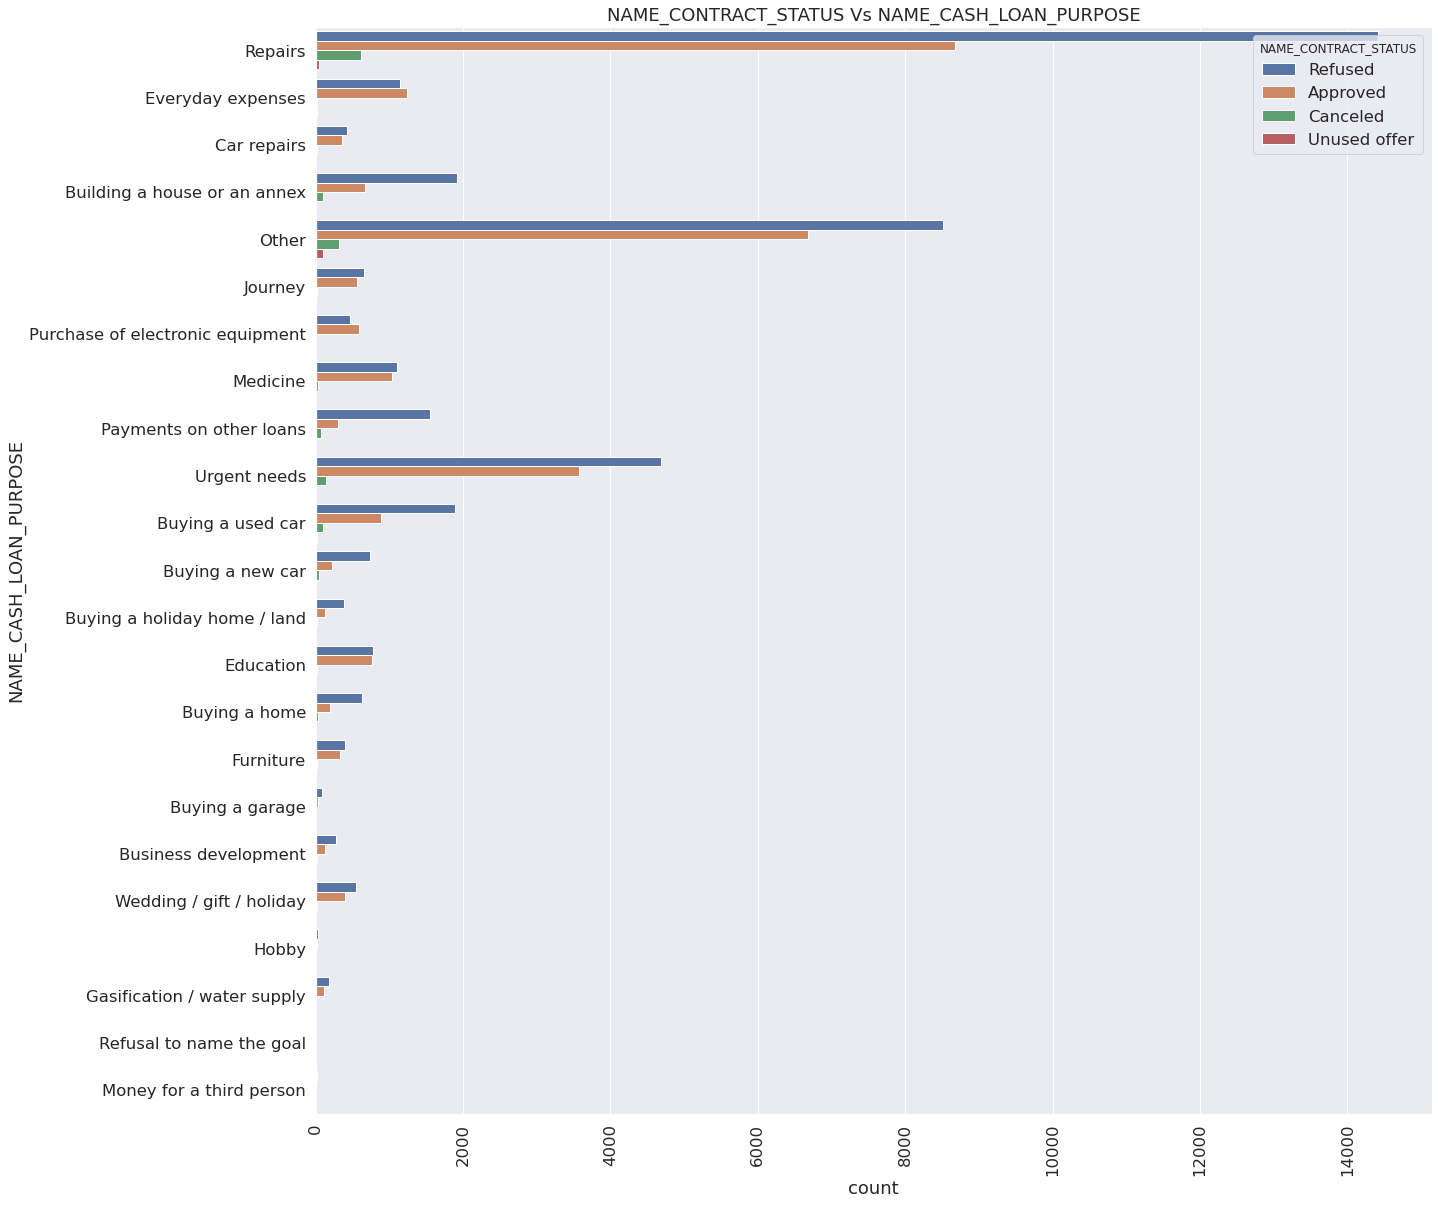

In [232]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.title('NAME_CONTRACT_STATUS Vs NAME_CASH_LOAN_PURPOSE')
ax=sns.countplot(data = df_temp_prev, y='NAME_CASH_LOAN_PURPOSE',hue = 'NAME_CONTRACT_STATUS')

#### Inference 
1.Repairs Loan Requests are rejected more frequently than other purposes.
2.Loans for buying a used car are rejected more frequently.Loans for buying a new car are rejected more than the ones for old car
3.Everyday Expenses & Purchasing an electronic equipment has higher approval rate.
It may be because of lower loan amounts for these items


In [ ]:
# Inspect NAME_CONTRACT_STATUS vs TARGET

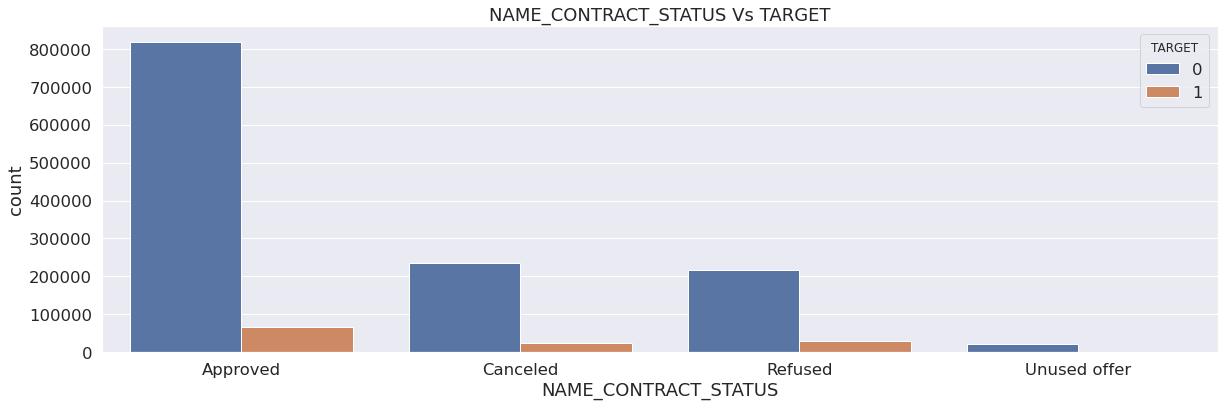

In [233]:
plt.figure(figsize=(20,6))

plt.title('NAME_CONTRACT_STATUS Vs TARGET')
ax=sns.countplot(data = new_df, x='NAME_CONTRACT_STATUS',hue = 'TARGET')

#### Inference
We should offer loans to those customers who have 
contract status was Approved in the past & those who are not defaulters.
Defaulters with Approved Contact Status are customers with highest risk to provide new loans
We can ignore rejected & canceled contract status categories because anyway their loan was rejected/canceled earlier.  

# Top 10 correlations in the merged dataset

In [234]:
new_df.corr()
new_df.corr().abs()
new_df.corr().abs().unstack()
new_df.corr().abs().unstack().sort_values(kind='quicksort')
new_df.corr().abs().unstack().sort_values(kind='quicksort').dropna()
correlation_0 = new_df.corr().abs().unstack().sort_values(kind='quicksort').dropna()

correlation_0 = correlation_0[correlation_0 != 1.0]
correlation_0 = correlation_0.sort_values(ascending=False)
correlation_0.head(10)


# # Find the top 10 correlations
# correlation_1 = new_df.corr().abs()
# correlation_1 = correlation_1.unstack().sort_values(kind='quicksort')
# correlation_1 = correlation_1.dropna()
# correlation_1 = correlation_1[correlation_1 != 1.0 ]
# correlation_1.drop_duplicates(inplace = True)
# correlation_1 = correlation_1.sort_values(ascending=False)

# print(correlation_1.head(10))


AMT_CREDIT_              AMT_GOODS_PRICE            0.986108
AMT_GOODS_PRICE          AMT_CREDIT_                0.986108
AMT_CREDITX              AMT_APPLICATION            0.975684
AMT_APPLICATION          AMT_CREDITX                0.975684
CNT_CHILDREN             CNT_FAM_MEMBERS            0.874517
CNT_FAM_MEMBERS          CNT_CHILDREN               0.874517
LIVE_CITY_NOT_WORK_CITY  REG_CITY_NOT_WORK_CITY     0.831086
REG_CITY_NOT_WORK_CITY   LIVE_CITY_NOT_WORK_CITY    0.831086
AMT_GOODS_PRICE          AMT_ANNUITY                0.763377
AMT_ANNUITY              AMT_GOODS_PRICE            0.763377
dtype: float64